# **Install Module**

In [1]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# **Import library**

In [111]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import plotly.express as px
from operator import attrgetter
import matplotlib.colors as mcolors

from plotnine import *
import plotnine

from kmodes.kprototypes import KPrototypes

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed()

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

print("setup-complete!")

setup-complete!


# **Read-in Data**

In [6]:
# Accomodate raw path to variables
raw_customer, raw_orders = "customers.csv", "orders.csv"
raw_products, raw_sales = "products.csv", "sales.csv"

# Read-in data
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales_data = pd.read_csv(raw_products), pd.read_csv(raw_sales)

# **Cleaning Dataset**

In [7]:
product.rename(columns={"product_ID" : "product_id"}, inplace=True)
product

product_id product_type       product_name size  colour  price  quantity  \
0              0        Shirt       Oxford Cloth   XS     red    114        66   
1              1        Shirt       Oxford Cloth    S     red    114        53   
2              2        Shirt       Oxford Cloth    M     red    114        54   
3              3        Shirt       Oxford Cloth    L     red    114        69   
4              4        Shirt       Oxford Cloth   XL     red    114        47   
...          ...          ...                ...  ...     ...    ...       ...   
1255        1255     Trousers  Tracksuit Bottoms   XS  violet     91        67   
1256        1256     Trousers  Tracksuit Bottoms    S  violet     91        48   
1257        1257     Trousers  Tracksuit Bottoms    M  violet     91        73   
1258        1258     Trousers  Tracksuit Bottoms    L  violet     91        45   
1259        1259     Trousers  Tracksuit Bottoms   XL  violet     91        60   

                                            description  
0          A red coloured, XS sized, Oxford Cloth Shirt  
1           A red coloured, S sized, Oxford Cloth Shirt  
2           A red coloured, M sized, Oxford Cloth Shirt  
3           A red coloured, L sized, Oxford Cloth Shirt  
4          A red coloured, XL sized, Oxford Cloth Shirt  
...                                                 ...  
1255  A violet coloured, XS sized, Tracksuit Bottoms...  
1256  A violet coloured, S sized, Tracksuit Bottoms ...  
1257  A violet coloured, M sized, Tracksuit Bottoms ...  
1258  A violet coloured, L sized, Tracksuit Bottoms ...  
1259  A violet coloured, XL sized, Tracksuit Bottoms...  

[1260 rows x 8 columns]

**Dataset Information**

In [8]:
# check dataset information
data = [{'df':customer,'name':'customer dataset'},
        {'df':sales_data,'name':'sales_data dataset'},
        {'df':product,'name':'product dataset'},
        {'df':order,'name':'order dataset'},]

for item in data:
  print(f"Checking dataset information on {item['name']}")
  print(item['df'].info())
  print('')

Checking dataset information on customer dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB
None

Checking dataset information on sales_data dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-

**Check Null Values**

In [9]:
data = [{'df':customer,'name':'customer dataset'},
        {'df':sales_data,'name':'sales_data dataset'},
        {'df':product,'name':'product dataset'},
        {'df':order,'name':'order dataset'},]

for item in data:
  print(f"Checking Null value on {item['name']}")
  print(item['df'].isnull().any())
  print('')

Checking Null value on customer dataset
customer_id      False
customer_name    False
gender           False
age              False
home_address     False
zip_code         False
city             False
state            False
country          False
dtype: bool

Checking Null value on sales_data dataset
sales_id          False
order_id          False
product_id        False
price_per_unit    False
quantity          False
total_price       False
dtype: bool

Checking Null value on product dataset
product_id      False
product_type    False
product_name    False
size            False
colour          False
price           False
quantity        False
description     False
dtype: bool

Checking Null value on order dataset
order_id         False
customer_id      False
payment          False
order_date       False
delivery_date    False
dtype: bool



**Change Data Type**

In [10]:
def change_datatype(df,list_changes):
  for item in list_changes:
    if item['type'] == 'datetime':
      df[item['column']] = pd.to_datetime(df[item['column']])
    elif item['type'] == 'int':
      df[item['column']] = df[item['column']].astype('int')
    elif item['type'] == 'int64':
      df[item['column']] = df[item['column']].astype(np.int64)
    elif item['type'] == 'float':
      df[item['column']] = df[item['column']].astype(float)

  return df

In [11]:
## change datatype
data = [{'df':order,
         'list_changes': [
             {'column':'order_date','type':'datetime'}
             , {'column':'delivery_date','type':'datetime'}]
         }]
for el in data:
  el['df'] = change_datatype(el['df'],el['list_changes'])

**Remove Extra Whitespaces**

In [12]:
def remove_extra_whitespaces(df):
  for col in df.columns:
    if df[col].dtypes == 'object' :
      df[col] = df[col].str.strip()

  return df

In [13]:
# remove extra whitespace on customers dataset
list_df = [customer,order,sales_data,product]
for df in list_df:
  df = remove_extra_whitespaces(df)

**Checking Unique Value**

In [14]:
def check_nunique(df,name):
  print(f'Checking number of unique value in {name}')
  for col in df.columns:
    nuniq = len(df[col].unique())
    print(f'- {col} : {nuniq} nunique')
  print('')

In [15]:
data = [{'df':customer,'name':'customer dataset'},
        {'df':sales_data,'name':'sales_data dataset'},
        {'df':product,'name':'product dataset'},
        {'df':order,'name':'order dataset'},]

for item in data:
  check_nunique(item['df'],item['name'])

Checking number of unique value in customer dataset
- customer_id : 1000 nunique
- customer_name : 1000 nunique
- gender : 8 nunique
- age : 61 nunique
- home_address : 1000 nunique
- zip_code : 955 nunique
- city : 961 nunique
- state : 8 nunique
- country : 1 nunique

Checking number of unique value in sales_data dataset
- sales_id : 5000 nunique
- order_id : 993 nunique
- product_id : 1233 nunique
- price_per_unit : 23 nunique
- quantity : 3 nunique
- total_price : 69 nunique

Checking number of unique value in product dataset
- product_id : 1260 nunique
- product_type : 3 nunique
- product_name : 35 nunique
- size : 5 nunique
- colour : 7 nunique
- price : 26 nunique
- quantity : 41 nunique
- description : 1260 nunique

Checking number of unique value in order dataset
- order_id : 1000 nunique
- customer_id : 617 nunique
- payment : 995 nunique
- order_date : 291 nunique
- delivery_date : 305 nunique



**Checking Outliers**

In [16]:
def check_outliers(df_col,col_name):
  print(f"checking outliers on {col_name}")

  # Find Q1, Q3, IQR
  Q1 = df_col.quantile(0.25)
  Q3 = df_col.quantile(0.75)
  IQR = Q3 - Q1

  # Find Bottom Fence and Upper Fence
  boxplot_min = Q1 - 1.5 * IQR
  boxplot_max = Q3 + 1.5 * IQR

  #Show the calculation
  print('Q1:',Q1)
  print('Q3:',Q3)
  print('IQR:',IQR)
  print('Min (Lower inner fence):',boxplot_min)
  print('Max (Upper inner fence):',boxplot_max)

  # Filter value that <Bottom fence and >Upper fence
  filter_min = df_col < boxplot_min
  filter_max = df_col > boxplot_max

  # drop outlier using loc. So it will show only value exclude (~) bottom fence and Upper fence
  df_outlier = customer.loc[(filter_min | filter_max)]

  # Check data information
  df_outlier.count()

  print("Result:")
  if df_outlier.shape[0] == 0:
    print("no outliers found")
  else:
    print(f"there are {df_outlier.shape[0]} outliers found")
  print('')

In [17]:
data = [{'df':customer['age'],'name':'customers dataset on field age'},
        {'df':sales_data['total_price'],'name':'sales dataset on field total_price'},
        {'df':sales_data['quantity'],'name':'sales dataset on field quantity'}]

for item in data:
  check_outliers(item['df'],item['name'])

checking outliers on customers dataset on field age
Q1: 34.0
Q3: 65.0
IQR: 31.0
Min (Lower inner fence): -12.5
Max (Upper inner fence): 111.5
Result:
no outliers found

checking outliers on sales dataset on field total_price
Q1: 112.0
Q3: 285.0
IQR: 173.0
Min (Lower inner fence): -147.5
Max (Upper inner fence): 544.5
Result:
no outliers found

checking outliers on sales dataset on field quantity
Q1: 1.0
Q3: 3.0
IQR: 2.0
Min (Lower inner fence): -2.0
Max (Upper inner fence): 6.0
Result:
no outliers found



Checking Outliers using bloxplot

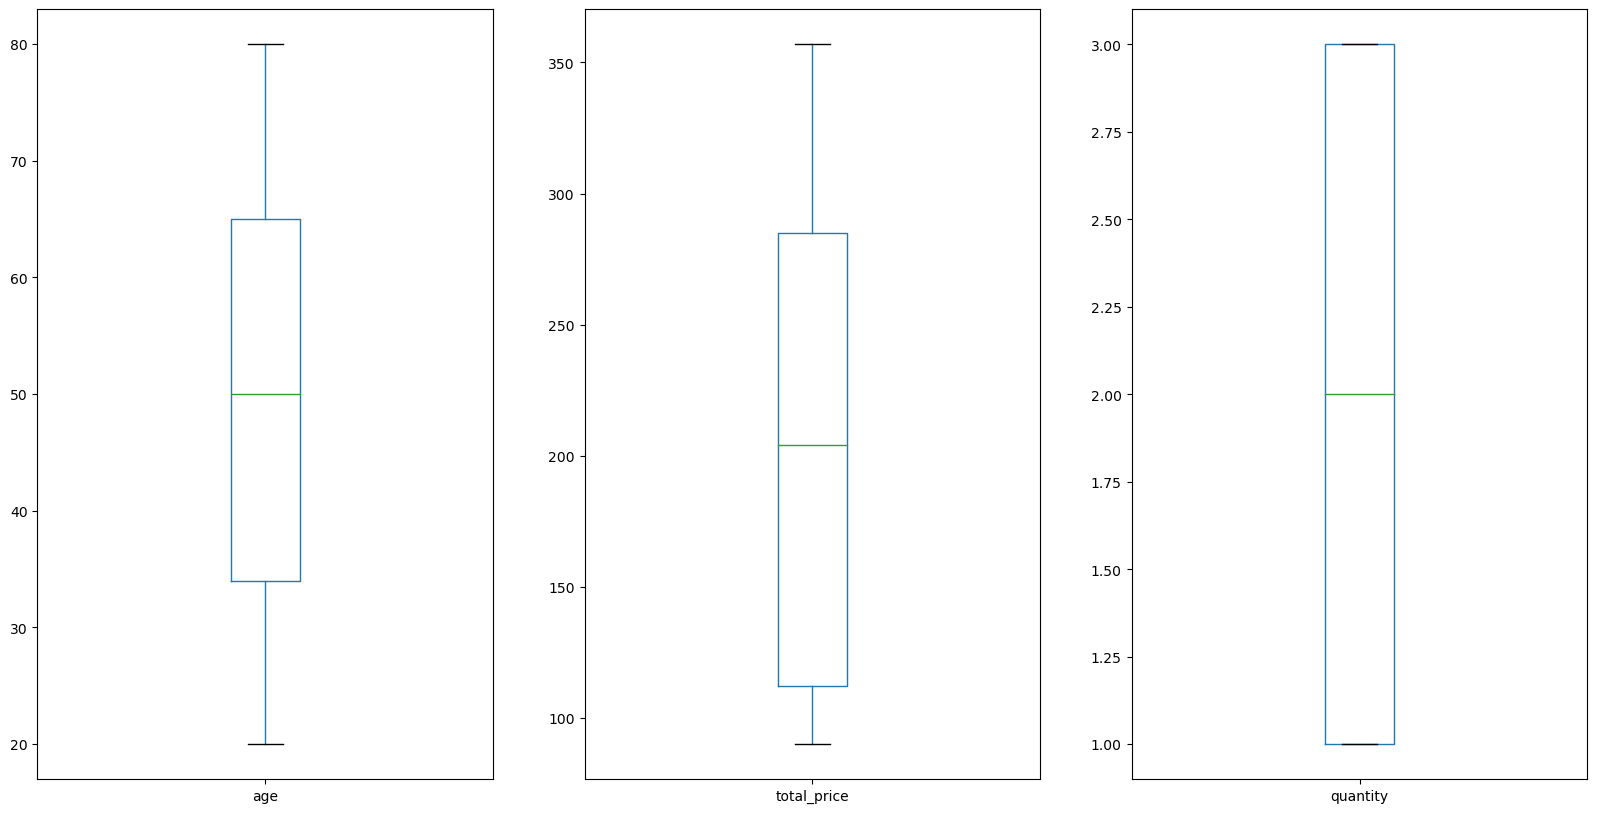

In [18]:
# List Check
list_check = [{'df':customer,'column':'age'},
        {'df':sales_data,'column':'total_price'},
        {'df':sales_data,'column':'quantity'}]

# adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(list_check):
    a = el['df'].boxplot(el['column'], ax=axes.flatten()[i],grid=False)

# Show Chart
plt.show()

# **Merging Dataset**

In [19]:
cust_order = pd.merge(left=customer, right=order, 
                      left_index=True, right_index=True) # merging
cop = pd.merge(left=cust_order, right=product, 
                    left_index=True, right_index=True) # merging

In [20]:
df = customer.merge(order,how='inner',left_on='customer_id',right_on='customer_id')
df = df.merge(sales_data,how='inner',left_on='order_id',right_on='order_id')
df = df.merge(product,how='inner',left_on='product_id',right_on='product_id')

In [21]:
df['order_day'] = df['order_date'].dt.dayofweek
df['order_week'] = df['order_date'].dt.strftime('%U').astype(np.int64)
df['order_month_str'] = df['order_date'].dt.strftime('%Y-%m')
df['order_month'] = df['order_date'].dt.to_period('M')

In [22]:
cop['order_day'] = df['order_date'].dt.dayofweek
cop['order_week'] = df['order_date'].dt.strftime('%U').astype(np.int64)
cop['order_month_str'] = df['order_date'].dt.strftime('%Y-%m')
cop['order_month'] = df['order_date'].dt.to_period('M')

In [23]:
df.to_excel('Clean dataset shopping cart1.xlsx')

In [24]:
cop.to_excel('Clean dataset shopping cart2.xlsx')

**Check Data**

In [25]:
df

customer_id         customer_name       gender  age                    home_address  \
0               1         Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
1               1         Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
2              81         Lanny Wardale       Female   30     4870 Jackson SummitApt. 538   
3             258         Mira Heinonen       Female   62     2719 Dietrich KnollApt. 175   
4             432         Ettie Gonnely     Bigender   34      6172 Andrew AvenueApt. 194   
...           ...                   ...          ...  ...                             ...   
4995          971  Constance Piddington  Genderfluid   27            135 Ella RunApt. 424   
4996          980   Sharleen Langworthy      Agender   35         317 Sophia MewsApt. 328   
4997          986     Theodosia Postins   Polygender   38      1853 Dickens LaneSuite 406   
4998          996        Elvira Sarfati      Agender   59    0433 Armstrong HillSuite 974   
4999          998        Rebecka Fabler   Polygender   32       72 Annabelle PassApt. 446   

      zip_code             city                         state    country  order_id  payment  \
0         5464    Johnstonhaven            Northern Territory  Australia       455    24550   
1         5464    Johnstonhaven            Northern Territory  Australia       455    24550   
2         1915   Spencerborough             Western Australia  Australia       863    33163   
3         1252     South Declan                    Queensland  Australia       793    39635   
4         7029       North Cody                      Victoria  Australia       939    24169   
...        ...              ...                           ...        ...       ...      ...   
4995      4268  East Chasehaven                    Queensland  Australia       907    26863   
4996      5926        Isaacberg               South Australia  Australia       904    40117   
4997      2972     Turcottetown  Australian Capital Territory  Australia       370    53990   
4998      7613  Lake Danielland                      Tasmania  Australia       169    22089   
4999        52       Kohlerberg                    Queensland  Australia       773    21349   

     order_date delivery_date  sales_id  product_id  price_per_unit  quantity_x  total_price  \
0    2021-04-04    2021-04-06      2245         211             106           3          318   
1    2021-04-04    2021-04-06      2246         783              91           2          182   
2    2021-05-10    2021-05-18      4326         783              91           1           91   
3    2021-01-27    2021-02-03      3983         783              91           3          273   
4    2021-04-02    2021-04-21      4687         783              91           2          182   
...         ...           ...       ...         ...             ...         ...          ...   
4995 2021-08-15    2021-08-17      4550         559              98           2          196   
4996 2021-03-24    2021-04-07      4539         150              91           2          182   
4997 2021-01-22    2021-02-11      1833        1125             102           3          306   
4998 2021-03-09    2021-03-12       809         468             118           3          354   
4999 2021-07-19    2021-08-07      3863         261              95           2          190   

     product_type product_name size  colour  price  quantity_y  \
0           Shirt     Chambray    S     red    105          72   
1          Jacket     Pullover    L  yellow    114          43   
2          Jacket     Pullover    L  yellow    114          43   
3          Jacket     Pullover    L  yellow    114          43   
4          Jacket     Pullover    L  yellow    114          43   
...           ...          ...  ...     ...    ...         ...   
4995       Jacket      Leather   XL  violet    113          58   
4996        Shirt        Linen   XS  yellow    116          55   
4

In [26]:
df.rename(columns={"quantity_x" : "quantity","quantity_y" : "stock"}, inplace=True)
df

customer_id         customer_name       gender  age                    home_address  \
0               1         Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
1               1         Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
2              81         Lanny Wardale       Female   30     4870 Jackson SummitApt. 538   
3             258         Mira Heinonen       Female   62     2719 Dietrich KnollApt. 175   
4             432         Ettie Gonnely     Bigender   34      6172 Andrew AvenueApt. 194   
...           ...                   ...          ...  ...                             ...   
4995          971  Constance Piddington  Genderfluid   27            135 Ella RunApt. 424   
4996          980   Sharleen Langworthy      Agender   35         317 Sophia MewsApt. 328   
4997          986     Theodosia Postins   Polygender   38      1853 Dickens LaneSuite 406   
4998          996        Elvira Sarfati      Agender   59    0433 Armstrong HillSuite 974   
4999          998        Rebecka Fabler   Polygender   32       72 Annabelle PassApt. 446   

      zip_code             city                         state    country  order_id  payment  \
0         5464    Johnstonhaven            Northern Territory  Australia       455    24550   
1         5464    Johnstonhaven            Northern Territory  Australia       455    24550   
2         1915   Spencerborough             Western Australia  Australia       863    33163   
3         1252     South Declan                    Queensland  Australia       793    39635   
4         7029       North Cody                      Victoria  Australia       939    24169   
...        ...              ...                           ...        ...       ...      ...   
4995      4268  East Chasehaven                    Queensland  Australia       907    26863   
4996      5926        Isaacberg               South Australia  Australia       904    40117   
4997      2972     Turcottetown  Australian Capital Territory  Australia       370    53990   
4998      7613  Lake Danielland                      Tasmania  Australia       169    22089   
4999        52       Kohlerberg                    Queensland  Australia       773    21349   

     order_date delivery_date  sales_id  product_id  price_per_unit  quantity  total_price  \
0    2021-04-04    2021-04-06      2245         211             106         3          318   
1    2021-04-04    2021-04-06      2246         783              91         2          182   
2    2021-05-10    2021-05-18      4326         783              91         1           91   
3    2021-01-27    2021-02-03      3983         783              91         3          273   
4    2021-04-02    2021-04-21      4687         783              91         2          182   
...         ...           ...       ...         ...             ...       ...          ...   
4995 2021-08-15    2021-08-17      4550         559              98         2          196   
4996 2021-03-24    2021-04-07      4539         150              91         2          182   
4997 2021-01-22    2021-02-11      1833        1125             102         3          306   
4998 2021-03-09    2021-03-12       809         468             118         3          354   
4999 2021-07-19    2021-08-07      3863         261              95         2          190   

     product_type product_name size  colour  price  stock  \
0           Shirt     Chambray    S     red    105     72   
1          Jacket     Pullover    L  yellow    114     43   
2          Jacket     Pullover    L  yellow    114     43   
3          Jacket     Pullover    L  yellow    114     43   
4          Jacket     Pullover    L  yellow    114     43   
...           ...          ...  ...     ...    ...    ...   
4995       Jacket      Leather   XL  violet    113     58   
4996        Shirt        Linen   XS  yellow    116     55   
4997     Trousers  Cargo Pants   XS  orange    106     43   
4998     

In [27]:
cop

customer_id_x        customer_name       gender  age                    home_address  \
0                1        Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
1                2  Zabrina Harrowsmith  Genderfluid   69      8327 Kirlin SummitApt. 461   
2                3      Shina Dullaghan   Polygender   59       269 Gemma SummitSuite 109   
3                4        Hewet McVitie     Bigender   67       743 Bailey GroveSuite 141   
4                5       Rubia Ashleigh   Polygender   30         48 Hyatt ManorSuite 375   
..             ...                  ...          ...  ...                             ...   
995            996       Elvira Sarfati      Agender   59    0433 Armstrong HillSuite 974   
996            997       Dickie Grushin   Non-binary   30         04 Howell PassSuite 209   
997            998       Rebecka Fabler   Polygender   32       72 Annabelle PassApt. 446   
998            999       Carita Vynarde   Polygender   30       170 Wilson AvenueApt. 577   
999           1000     Mandel Fairbanks         Male   71      1671 Lauren KnollSuite 945   

     zip_code                city                         state    country  order_id  \
0        5464       Johnstonhaven            Northern Territory  Australia         1   
1        8223     New Zacharyfort               South Australia  Australia         2   
2        5661            Aliburgh  Australian Capital Territory  Australia         3   
3        1729   South Justinhaven                    Queensland  Australia         4   
4        4032      Griffithsshire                    Queensland  Australia         5   
..        ...                 ...                           ...        ...       ...   
995      7613     Lake Danielland                      Tasmania  Australia       996   
996      6950         Ellaborough                      Tasmania  Australia       997   
997        52          Kohlerberg                    Queensland  Australia       998   
998      7849      East Oscarfurt             Western Australia  Australia       999   
999      9012  Lake Audreyborough                      Tasmania  Australia      1000   

     customer_id_y  payment order_date delivery_date  product_id product_type  product_name size  \
0               64    30811 2021-08-30    2021-09-24           0        Shirt  Oxford Cloth   XS   
1              473    50490 2021-02-03    2021-02-13           1        Shirt  Oxford Cloth    S   
2              774    46763 2021-10-08    2021-11-03           2        Shirt  Oxford Cloth    M   
3              433    39782 2021-05-06    2021-05-19           3        Shirt  Oxford Cloth    L   
4              441    14719 2021-03-23    2021-03-24           4        Shirt  Oxford Cloth   XL   
..             ...      ...        ...           ...         ...          ...           ...  ...   
995            345    37843 2021-01-13    2021-02-02         995     Trousers          Wool   XS   
996            346    53831 2021-01-18    2021-01-31         996     Trousers          Wool    S   
997            407    53308 2021-05-05    2021-05-21         997     Trousers          Wool    M   
998            428    31643 2021-06-15    2021-07-12         998     Trousers          Wool    L   
999            896    27836 2021-04-07    2021-04-24         999     Trousers          Wool   XL   

    colour  price  quantity                                   description  order_day  order_week  \
0      red    114        66  A red coloured, XS sized, Oxford Cloth Shirt          6          14   
1      red    114        53   A red coloured, S sized, Oxford Cloth Shirt          6          14   
2      red    114        54   A red coloured, M sized, Oxford Cloth Shirt          0          19   
3      red    114        69   A red coloured, L sized, Oxford Cloth Shirt          2           4   
4      red    114        47  A red coloured, XL sized, Oxford Cloth Shirt          4          13   
..     ...    ...       ...   

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      5000 non-null   int64         
 1   customer_name    5000 non-null   object        
 2   gender           5000 non-null   object        
 3   age              5000 non-null   int64         
 4   home_address     5000 non-null   object        
 5   zip_code         5000 non-null   int64         
 6   city             5000 non-null   object        
 7   state            5000 non-null   object        
 8   country          5000 non-null   object        
 9   order_id         5000 non-null   int64         
 10  payment          5000 non-null   int64         
 11  order_date       5000 non-null   datetime64[ns]
 12  delivery_date    5000 non-null   datetime64[ns]
 13  sales_id         5000 non-null   int64         
 14  product_id       5000 non-null   int64  

In [29]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id_x    1000 non-null   int64         
 1   customer_name    1000 non-null   object        
 2   gender           1000 non-null   object        
 3   age              1000 non-null   int64         
 4   home_address     1000 non-null   object        
 5   zip_code         1000 non-null   int64         
 6   city             1000 non-null   object        
 7   state            1000 non-null   object        
 8   country          1000 non-null   object        
 9   order_id         1000 non-null   int64         
 10  customer_id_y    1000 non-null   int64         
 11  payment          1000 non-null   int64         
 12  order_date       1000 non-null   datetime64[ns]
 13  delivery_date    1000 non-null   datetime64[ns]
 14  product_id       1000 non-null   int64   

In [30]:
df.isnull().sum().sum()

0

In [31]:
cop.isnull().sum().sum()

0

In [32]:
df[df.duplicated()]

Empty DataFrame
Columns: [customer_id, customer_name, gender, age, home_address, zip_code, city, state, country, order_id, payment, order_date, delivery_date, sales_id, product_id, price_per_unit, quantity, total_price, product_type, product_name, size, colour, price, stock, description, order_day, order_week, order_month_str, order_month]
Index: []

In [33]:
cop[cop.duplicated()]

Empty DataFrame
Columns: [customer_id_x, customer_name, gender, age, home_address, zip_code, city, state, country, order_id, customer_id_y, payment, order_date, delivery_date, product_id, product_type, product_name, size, colour, price, quantity, description, order_day, order_week, order_month_str, order_month]
Index: []

**Sorting data based on age**

In [34]:
df.sort_values(by=["age"],
axis=0, ascending=True,
inplace=True)
df["age"]
df.head()

458     20
428     20
4585    20
4581    20
3760    20
        ..
4942    80
430     80
4045    80
587     80
3250    80
Name: age, Length: 5000, dtype: int64

customer_id    customer_name       gender  age                home_address  zip_code  \
458            22  Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
428            22  Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
4585          876   Glynda Dodshon         Male   20  2352 Kutch ParkwayApt. 436      6148   
4581          479     Dunc Swynley  Genderqueer   20     621 Eve View RdApt. 900       789   
3760          956  Camile Haveline  Genderfluid   20   408 Logan View RdApt. 841      6905   

                 city               state    country  order_id  payment order_date delivery_date  \
458           Maxberg            Victoria  Australia       668    40483 2021-03-15    2021-03-30   
428           Maxberg            Victoria  Australia       668    40483 2021-03-15    2021-03-30   
4585    New Aidenfurt  Northern Territory  Australia       317    18204 2021-04-23    2021-04-26   
4581       Mullerberg   Western Australia  Australia       657    31922 2021-07-22    2021-07-28   
3760  New Alexchester     New South Wales  Australia       843    17717 2021-07-03    2021-07-09   

      sales_id  product_id  price_per_unit  quantity  total_price product_type     product_name  \
458       3320          77             118         3          354        Shirt          Flannel   
428       3315         481             118         1          118       Jacket           Puffer   
4585      1550         414             119         2          238        Shirt  Casual Slim Fit   
4581      3261        1185              99         3          297     Trousers     High-Waisted   
3760      4234         285             105         1          105        Shirt     Cuban Collar   

     size  colour  price  stock                                        description  order_day  \
458     M  orange     96     68          A orange coloured, M sized, Flannel Shirt          0   
428     S  indigo    110     62          A indigo coloured, S sized, Puffer Jacket          0   
4585   XL  indigo    113     40  A indigo coloured, XL sized, Casual Slim Fit S...          4   
4581   XS  violet     98     72  A violet coloured, XS sized, High-Waisted Trou...          3   
3760   XS  orange     93     62    A orange coloured, XS sized, Cuban Collar Shirt          5   

      order_week order_month_str order_month  
458           11         2021-03     2021-03  
428           11         2021-03     2021-03  
4585          16         2021-04     2021-04  
4581          29         2021-07     2021-07  
3760          26         2021-07     2021-07

In [35]:
cop.sort_values(by=["age"],
axis=0, ascending=True,
inplace=True)
cop["age"]
cop.head()

674    20
28     20
346    20
716    20
228    20
       ..
437    80
235    80
154    80
423    80
38     80
Name: age, Length: 1000, dtype: int64

customer_id_x     customer_name      gender  age               home_address  zip_code  \
674            675  Elsi Strawbridge  Non-binary   20      56 Joel TrailApt. 139      2435   
28              29  Tyrus Pitkaithly        Male   20  52 Kayla CircuitSuite 332      5308   
346            347         Lyn Bouts      Female   20  16 Maddison MewsSuite 093      1435   
716            717  Mellisent Druhan     Agender   20     970 Braun MewsApt. 629      1564   
228            229    Codie Escalero      Female   20   434 Gibson MewsSuite 619      1344   

                   city                         state    country  order_id  customer_id_y  \
674          Port Jacob               South Australia  Australia       675            896   
28   North Matildamouth                    Queensland  Australia        29            993   
346           Levihaven                      Victoria  Australia       347            209   
716         Haydenhaven                      Victoria  Australia       717            696   
228      West Abbeyland  Australian Capital Territory  Australia       229            107   

     payment order_date delivery_date  product_id product_type     product_name size  colour  \
674    43080 2021-06-05    2021-06-13         674       Jacket            Parka   XL  orange   
28     57645 2021-03-22    2021-03-28          28        Shirt     Oxford Cloth    L  indigo   
346    18829 2021-05-29    2021-06-14         346        Shirt  Mandarin Collar    S  violet   
716    52327 2021-03-11    2021-04-05         716       Jacket      Trench Coat    S   green   
228    15827 2021-10-08    2021-10-20         228        Shirt         Chambray    L   green   

     price  quantity                                        description  order_day  order_week  \
674    119        68          A orange coloured, XL sized, Parka Jacket          6          30   
28     114        70     A indigo coloured, L sized, Oxford Cloth Shirt          2          15   
346    108        73  A violet coloured, S sized, Mandarin Collar Shirt          4          28   
716    112        53      A green coloured, S sized, Trench Coat Jacket          5           1   
228    105        56          A green coloured, L sized, Chambray Shirt          4           3   

    order_month_str order_month  
674         2021-07     2021-07  
28          2021-04     2021-04  
346         2021-07     2021-07  
716         2021-01     2021-01  
228         2021-01     2021-01

# **EDA**

In [36]:
monthly_sales = df.groupby('order_month_str',as_index=False)['total_price'].sum()

fig = px.line(monthly_sales
              , x='order_month_str'
              , y=['total_price']
              , title='Monthly Sales Trend')

fig.update_layout(
    yaxis_title="Total Sales"
    , xaxis_title="Month")

fig.show()

# **Clustering**

**Using K-Means**

In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

In [39]:
def elbow_method(df_clus_main):
  # For each n_clusters between 1 and 11, we calculate the distortion value
  print('Finding best n_cluster using elbow method')
  distortions = []
  K = range(2,11)
  for n_clusters in K:
    print('n_clusters =',n_clusters,end=' ~ ')
    kmeanModel = KMeans(n_clusters, random_state = 42)
    kmeanModel.fit(df_clus_main)
    distortions.append(kmeanModel.inertia_)
    print('kmeanModel.inertia_ =', kmeanModel.inertia_)
    
  plt.figure(figsize=(16,8))
  plt.figure()
  plt.plot(K, distortions, 'b*-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

In [40]:
def silhoutte_method(df_clus_main):
  # Silhouette score plot
  K = range(2,11)
  max_K = max(K)
  fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

  for n_clusters in K:
    kmeanModel = KMeans(n_clusters)

    q, mod = divmod(n_clusters,2)
    sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
    sil.fit(df_clus_main)
    sil.finalize()
    print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [41]:
# df_clus = df.groupby(['customer_id','age','quantity','price_per_unit'],as_index=False)['total_price','quantity'].agg([''])
df_clus1 = df.groupby(['customer_id'],as_index=False)['order_id'].nunique()
df_clus1 = df_clus1.rename(columns={'order_id':'order'})
df_clus2 = df.groupby(['customer_id'],as_index=False)['quantity','total_price'].sum()
df_clus = df_clus1.merge(df_clus2,how='inner',left_on='customer_id',right_on='customer_id')
df_clus = df_clus.set_index('customer_id')
df_clus

order  quantity  total_price
customer_id                              
1                3        17         1641
7                1         9         1017
10               1         3          270
11               1         4          382
12               1        15         1551
...            ...       ...          ...
994              1        17         1716
995              1        21         2140
996              2        29         3045
998              4        42         4415
1000             1        15         1483

[616 rows x 3 columns]

In [42]:
scaler = MinMaxScaler()

# df_clus2
df_scaled = scaler.fit_transform(df_clus.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['order','quantity','total_price'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled
# df_clus2

Scaled Dataset Using MinMaxScaler


order  quantity  total_price
0      0.4  0.219178     0.204594
1      0.0  0.109589     0.121747
2      0.0  0.027397     0.022570
3      0.0  0.041096     0.037440
4      0.0  0.191781     0.192645
..     ...       ...          ...
611    0.0  0.219178     0.214551
612    0.0  0.273973     0.270844
613    0.2  0.383562     0.390998
614    0.6  0.561644     0.572889
615    0.0  0.191781     0.183617

[616 rows x 3 columns]

In [43]:
def kmeans_clus(df_clus,df_ori,n):
    # Let's get the label for k = 3

    # Initialize KMeans for 3 clusters
    cluster_model = KMeans(n_clusters = n, random_state = 42)

    # Fit the data into model
    cluster_model.fit(df_clus)

    # 
    df_clus_r = df_ori.copy()
    df_clus_r['cluster'] = cluster_model.labels_

    df_clus_r.groupby('cluster',as_index=False).agg(['mean','median']).T.to_excel(f'kmeans-{n}-cluster-pivot.xlsx')

    df_clus_r.to_excel(f'kmeans-{n}-cluster.xlsx')
    return df_clus_r

In [44]:
# kmeans_clus(df_scaled,df_clus,3)
# kmeans_clus(df_scaled,df_clus,4)
# kmeans_clus(df_scaled,df_clus,5)
kmeans_clus(df_scaled,df_clus,6)

order  quantity  total_price  cluster
customer_id                                       
1                3        17         1641        0
7                1         9         1017        4
10               1         3          270        4
11               1         4          382        4
12               1        15         1551        2
...            ...       ...          ...      ...
994              1        17         1716        2
995              1        21         2140        2
996              2        29         3045        5
998              4        42         4415        1
1000             1        15         1483        2

[616 rows x 4 columns]

In [45]:
cluster_list = []
for dirname, _, filenames in os.walk('http://localhost:8890/tree/Documents/belajar%20python/Capstone%20Project%20KM-RevoU%20DA#notebooks'):
    for filename in filenames:
        cluster_list.append(os.path.join(dirname, filename))

df_cluster = pd.read_excel('kmeans-6-cluster.xlsx')

In [46]:
df_cluster.groupby('cluster',as_index=False)['order','quantity','total_price'].mean().sort_values(by='total_price',ascending=True)

cluster     order   quantity  total_price
4        4  1.005000   6.670000   688.705000
2        2  1.000000  14.616352  1514.591195
0        0  2.099099  16.135135  1667.612613
5        5  2.000000  26.682540  2767.047619
3        3  3.114286  30.914286  3202.300000
1        1  4.307692  51.384615  5357.615385

In [47]:
def clusname(x):
    if x == 0 :
        return 'Anak Juragan'
    elif x == 1 :
        return 'Warga'
    elif x == 2 :
        return 'Sultan'
    elif x == 3 :
        return 'Anak Sultan'
    elif x == 4 :
        return 'Juragan'
    elif x == 5 :
        return 'Bos'
    elif x == 10 :
        return 'Anak Baru'
    else : 
        return ''

In [48]:
df_cluster['clus_name'] = df_cluster['cluster'].apply(clusname)
df_all = df.merge(df_cluster[['customer_id','cluster','clus_name']], how='inner', left_on='customer_id', right_on='customer_id')
df_all

customer_id        customer_name       gender  age                home_address  zip_code  \
0              22      Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
1              22      Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
2              22      Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
3              22      Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
4              22      Blayne Sabatier   Non-binary   20  292 Casper IslandSuite 778      6624   
...           ...                  ...          ...  ...                         ...       ...   
4995          171  Mariellen Medendorp      Agender   80       16 Boyer WaySuite 018      6226   
4996          171  Mariellen Medendorp      Agender   80       16 Boyer WaySuite 018      6226   
4997          171  Mariellen Medendorp      Agender   80       16 Boyer WaySuite 018      6226   
4998          597           Hi Simenel  Genderfluid   80   78 O'hara CircuitApt. 096      1966   
4999          597           Hi Simenel  Genderfluid   80   78 O'hara CircuitApt. 096      1966   

                  city              state    country  order_id  payment order_date delivery_date  \
0              Maxberg           Victoria  Australia       668    40483 2021-03-15    2021-03-30   
1              Maxberg           Victoria  Australia       668    40483 2021-03-15    2021-03-30   
2              Maxberg           Victoria  Australia       668    40483 2021-03-15    2021-03-30   
3              Maxberg           Victoria  Australia       668    40483 2021-03-15    2021-03-30   
4              Maxberg           Victoria  Australia       668    40483 2021-03-15    2021-03-30   
...                ...                ...        ...       ...      ...        ...           ...   
4995     South Gabriel  Western Australia  Australia       580    26947 2021-04-30    2021-05-09   
4996     South Gabriel  Western Australia  Australia       580    26947 2021-04-30    2021-05-09   
4997     South Gabriel  Western Australia  Australia       580    26947 2021-04-30    2021-05-09   
4998  Lake Michaelbury    South Australia  Australia       913    16265 2021-04-03    2021-04-19   
4999  Lake Michaelbury    South Australia  Australia       913    16265 2021-04-03    2021-04-19   

      sales_id  product_id  price_per_unit  quantity  total_price product_type product_name size  \
0         3320          77             118         3          354        Shirt      Flannel    M   
1         3315         481             118         1          118       Jacket       Puffer    S   
2         3314          48             104         3          312        Shirt        Dress    L   
3         3319         214             106         1          106        Shirt     Chambray   XL   
4         3318         903              94         1           94     Trousers        Cords    L   
...        ...         ...             ...       ...          ...          ...          ...  ...   
4995      2902         159              91         2          182        Shirt        Linen   XL   
4996      2900         433             107         2          214       Jacket        Denim    L   
4997      2901          37             104         2          208        Shirt        Dress    M   
4998      4577         761             109         1          109       Jacket      Peacoat    S   
4999      4578         222             106         3          318        Shirt     Chambray    M   

      colour  price  stock                                 description  order_day  order_week  \
0     orange     96     68   A orange coloured, M sized, Flannel Shirt          0          11   
1     indigo    110     62   A indigo coloured, S sized, Puffer Jacket          0          11   
2     yellow    119     56     A yellow coloured, L sized, Dress Shirt          0          11   
3        red    105     42    A red col

In [49]:
clus1 = df_all.groupby(['customer_id','cluster','clus_name'],as_index=False)['order_id'].nunique()
clus1.rename(columns={'order_id':'order'},inplace=True)
clus2 = df_all.groupby(['customer_id','age'],as_index=False)['quantity','total_price'].sum()
# clus2 = clus2.reset_index()
clus = clus1.merge(clus2, how='inner',left_on='customer_id', right_on='customer_id')
clus1 = clus.groupby('clus_name',as_index=False)['age','order','quantity','total_price'].mean()
clus2 = clus.groupby('clus_name',as_index=False)['customer_id'].nunique()
clusr = clus1.merge(clus2, how='inner',left_on='clus_name', right_on='clus_name')
clusr.rename(columns={'customer_id':'customer'},inplace=True)
clusr.sort_values(by='quantity',ascending=True)

clus_name        age     order   quantity  total_price  customer
3       Juragan  49.820000  1.005000   6.670000   688.705000       200
4        Sultan  49.603774  1.000000  14.616352  1514.591195       159
0  Anak Juragan  49.360360  2.099099  16.135135  1667.612613       111
2           Bos  47.825397  2.000000  26.682540  2767.047619        63
1   Anak Sultan  49.371429  3.114286  30.914286  3202.300000        70
5         Warga  45.846154  4.307692  51.384615  5357.615385        13

In [50]:
clus.groupby('clus_name',as_index=False)['age','quantity','total_price'].agg(pd.Series.median).sort_values(by='quantity',ascending=True)

clus_name   age  quantity  total_price
3       Juragan  51.0       7.0        709.0
4        Sultan  48.0      14.0       1437.0
0  Anak Juragan  51.0      17.0       1715.0
2           Bos  46.0      25.0       2669.0
1   Anak Sultan  49.5      31.5       3281.5
5         Warga  38.0      50.0       5119.0

In [51]:
clus.groupby('clus_name',as_index=False)['order','quantity','total_price'].agg(pd.Series.sum).sort_values(by='quantity',ascending=True)

clus_name  order  quantity  total_price
5         Warga     56       668        69649
3       Juragan    201      1334       137741
2           Bos    126      1681       174324
0  Anak Juragan    233      1791       185105
1   Anak Sultan    218      2164       224161
4        Sultan    159      2324       240820

In [52]:
df_all.to_excel('Clean dataset shopping cart with cluster.xlsx')

In [53]:
df_all.groupby(['customer_id','cluster','clus_name'])['customer_id'].nunique().to_excel('customer_cluster.xlsx')

**Using KPrototype**

In [54]:
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [55]:
# Creating copies of our datasets
df_clus_kmodes = df_clus.merge(customer[['customer_id','age','gender','state']],how='inner',left_on='customer_id',right_on='customer_id')

# drop if all row of columns is null
df_clus_kmodes.dropna(axis=1, how='all', inplace=True)

df_clus_kmodest = pd.get_dummies(df_clus_kmodes, dummy_na=True)
df_clus_kmodest.set_index('customer_id',inplace=True)
df_clus_kmodest

order  quantity  total_price  age  gender_Agender  gender_Bigender  gender_Female  \
customer_id                                                                                      
1                3        17         1641   30               0                0              1   
7                1         9         1017   76               0                1              0   
10               1         3          270   70               0                1              0   
11               1         4          382   39               1                0              0   
12               1        15         1551   78               0                1              0   
...            ...       ...          ...  ...             ...              ...            ...   
994              1        17         1716   53               0                0              1   
995              1        21         2140   63               0                0              0   
996              2        29         3045   59               1                0              0   
998              4        42         4415   32               0                0              0   
1000             1        15         1483   71               0                0              0   

             gender_Genderfluid  gender_Genderqueer  gender_Male  gender_Non-binary  \
customer_id                                                                           
1                             0                   0            0                  0   
7                             0                   0            0                  0   
10                            0                   0            0                  0   
11                            0                   0            0                  0   
12                            0                   0            0                  0   
...                         ...                 ...          ...                ...   
994                           0                   0            0                  0   
995                           0                   0            0                  0   
996                           0                   0            0                  0   
998                           0                   0            0                  0   
1000                          0                   0            1                  0   

             gender_Polygender  gender_nan  state_Australian Capital Territory  \
customer_id                                                                      
1                            0           0                                   0   
7                            0           0                                   0   
10                           0           0                                   0   
11                           0           0                                   0   
12                           0           0                                   0   
...                        ...         ...                                 ...   
994                          0           0                                   0   
995                          1           0                                   0   
996                          0           0                                   0   
998                          1           0                                   0   
1000                         0           0                                   0   

             state_New South Wales  state_Northern Territory  state_Queensland  \
customer_id                                                                      
1                                0                         1                 0   
7                                0                         0                 1   
10                               0                         0                 0   
11                               0                         1                 0   
12                               0             

<Axes: xlabel='quantity', ylabel='Count'>

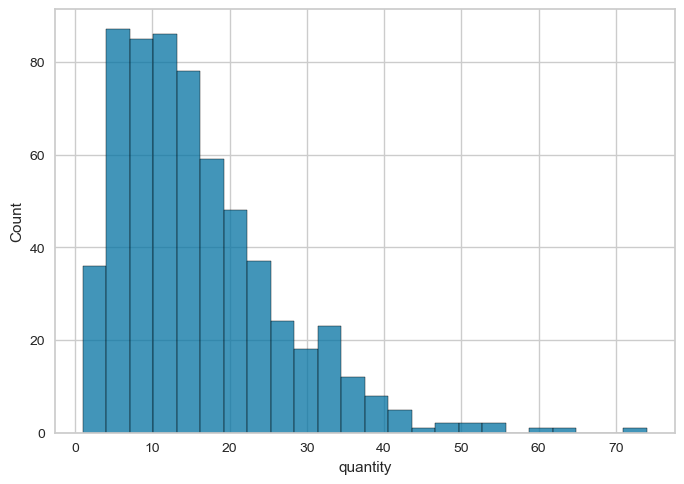

In [56]:
import plotly.io as pio
pio.renderers.default = "notebook"

sns.histplot(data=df_clus_kmodest, x="quantity")

In [57]:
from sklearn.preprocessing import StandardScaler

X = df_clus_kmodest.copy()
scaled_X = StandardScaler().fit_transform(X[['order','total_price', 'quantity','age']])
X[['order','total_price', 'quantity','age']] = scaled_X

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 1 to 1000
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   order                               616 non-null    float64
 1   quantity                            616 non-null    float64
 2   total_price                         616 non-null    float64
 3   age                                 616 non-null    float64
 4   gender_Agender                      616 non-null    uint8  
 5   gender_Bigender                     616 non-null    uint8  
 6   gender_Female                       616 non-null    uint8  
 7   gender_Genderfluid                  616 non-null    uint8  
 8   gender_Genderqueer                  616 non-null    uint8  
 9   gender_Male                         616 non-null    uint8  
 10  gender_Non-binary                   616 non-null    uint8  
 11  gender_Polygender                   616 non-

In [59]:
from kmodes.kprototypes import KPrototypes
#dataframe to an array

smart_array = X.values

#index of categorical columns
categorical_index = list(range(4,22))
categorical_index

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [60]:
# Function for plotting elbow curve
def plot_elbow_curve(start, end, data,categorical_index):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot()

In [61]:
# Plotting elbow curve for k=2 to k=10
# plot_elbow_curve(2,10,smart_array,categorical_index)

In [62]:
def kproto_clustering(df_clus_kmodes,smart_array,categorical_index, n):
    model_3 = KPrototypes(n_clusters=n, init='Huang', random_state=42, n_jobs=-1)
    model_3.fit_predict(smart_array, categorical=categorical_index)
    print(model_3.cost_)
    #new column for cluster labels associated with each subject
    df_clus_kmodes_r = df_clus_kmodes.copy()
    df_clus_kmodes_r['cluster'] = model_3.labels_

    df_clus_kmodes_fin = df_clus_kmodes_r.merge(df_clus_kmodest.iloc[:, 4:],how='inner', left_on='customer_id', right_on='customer_id')
    df_clus_kmodes_fin.drop(columns=['gender_nan','state_nan'],axis=1,inplace=True)

    df_clus_kmodes_fin.groupby('cluster',as_index=False).agg(['mean','median']).T.to_excel(f'kproto-{n}-cluster-pivot.xlsx')
    df_clus_kmodes_fin.to_excel(f'kproto-{n}-cluster.xlsx')
    return df_clus_kmodes_fin

In [63]:
kproto_clustering(df_clus_kmodes,smart_array,categorical_index,6)
# kproto_clustering(df_clus_kmodes,smart_array,categorical_index,5)
# kproto_clustering(df_clus_kmodes,smart_array,categorical_index,4)
# kproto_clustering(df_clus_kmodes,smart_array,categorical_index,3)

1152.2820838059665


customer_id  order  quantity  total_price  age      gender               state  cluster  \
0              1      3        17         1641   30      Female  Northern Territory        5   
1              7      1         9         1017   76    Bigender          Queensland        1   
2             10      1         3          270   70    Bigender   Western Australia        1   
3             11      1         4          382   39     Agender  Northern Territory        4   
4             12      1        15         1551   78    Bigender     South Australia        1   
..           ...    ...       ...          ...  ...         ...                 ...      ...   
611          994      1        17         1716   53      Female   Western Australia        0   
612          995      1        21         2140   63  Polygender   Western Australia        0   
613          996      2        29         3045   59     Agender            Tasmania        3   
614          998      4        42         4415   32  Polygender          Queensland        2   
615         1000      1        15         1483   71        Male            Tasmania        1   

     gender_Agender  gender_Bigender  gender_Female  gender_Genderfluid  gender_Genderqueer  \
0                 0                0              1                   0                   0   
1                 0                1              0                   0                   0   
2                 0                1              0                   0                   0   
3                 1                0              0                   0                   0   
4                 0                1              0                   0                   0   
..              ...              ...            ...                 ...                 ...   
611               0                0              1                   0                   0   
612               0                0              0                   0                   0   
613               1                0              0                   0                   0   
614               0                0              0                   0                   0   
615               0                0              0                   0                   0   

     gender_Male  gender_Non-binary  gender_Polygender  state_Australian Capital Territory  \
0              0                  0                  0                                   0   
1              0                  0                  0                                   0   
2              0                  0                  0                                   0   
3              0                  0                  0                                   0   
4              0                  0                  0                                   0   
..           ...                ...                ...                                 ...   
611            0                  0                  0                                   0   
612            0                  0                  1                                   0   
613            0                  0                  0                                   0   
614            0                  0                  1                                   0   
615            1                  0                  0                                   0   

     state_New South Wales  state_Northern Territory  state_Queensland  state_South Australia  \
0                        0                         1                 0                      0   
1                        0                         0                 1                      0   
2                        0                         0                 0                      0   
3                        0                         1                 0                      0   
4                        0                         0                 0                      1   


In [64]:
Z = df.copy()
N = customer[~(customer['customer_id'].isin(Z['customer_id']))]
N

customer_id        customer_name       gender  age                     home_address  \
1              2  Zabrina Harrowsmith  Genderfluid   69       8327 Kirlin SummitApt. 461   
2              3      Shina Dullaghan   Polygender   59        269 Gemma SummitSuite 109   
3              4        Hewet McVitie     Bigender   67        743 Bailey GroveSuite 141   
4              5       Rubia Ashleigh   Polygender   30          48 Hyatt ManorSuite 375   
5              6       Cordey Tolcher  Genderfluid   40  7118 Mccullough SquareSuite 639   
..           ...                  ...          ...  ...                              ...   
984          985        Porter Gueste         Male   72      997 Harrison KnollSuite 735   
989          990        Sasha Stanman      Agender   38       4199 Glover CircleApt. 446   
991          992  Meredith Stansfield       Female   39      12 Daugherty ParadeApt. 846   
996          997       Dickie Grushin   Non-binary   30          04 Howell PassSuite 209   
998          999       Carita Vynarde   Polygender   30        170 Wilson AvenueApt. 577   

     zip_code               city                         state    country  
1        8223    New Zacharyfort               South Australia  Australia  
2        5661           Aliburgh  Australian Capital Territory  Australia  
3        1729  South Justinhaven                    Queensland  Australia  
4        4032     Griffithsshire                    Queensland  Australia  
5        9996         Blakehaven               New South Wales  Australia  
..        ...                ...                           ...        ...  
984      6621         Boscoville                      Victoria  Australia  
989      2430        Glovershire               South Australia  Australia  
991      2358    Lake Oliviatown                    Queensland  Australia  
996      6950        Ellaborough                      Tasmania  Australia  
998      7849     East Oscarfurt             Western Australia  Australia  

[384 rows x 9 columns]

In [65]:
N['age'].agg([pd.Series.mean,pd.Series.median])

mean     50.690
median   50.500
Name: age, dtype: float64

In [66]:
N['gender'].unique()

array(['Genderfluid', 'Polygender', 'Bigender', 'Agender', 'Male',
       'Female', 'Non-binary', 'Genderqueer'], dtype=object)

# **Cohort Analysis**

In [67]:
n_orders = df.groupby(['customer_id'])['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['customer_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

41.88% of customers ordered more than once.


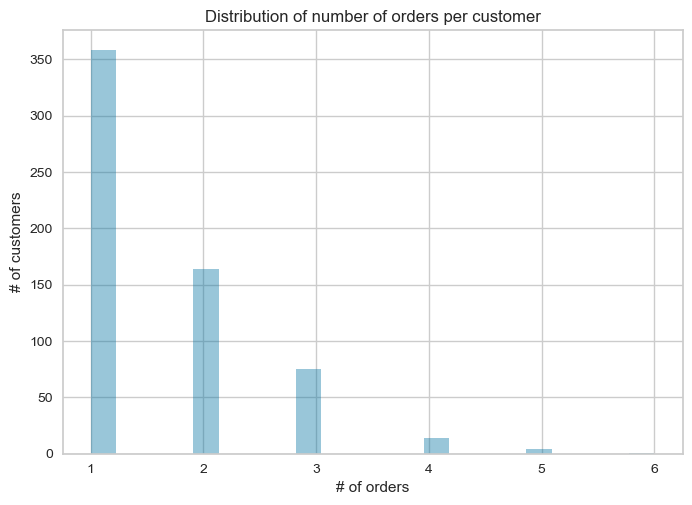

In [68]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [69]:
dfca = df.groupby(['customer_id', 'order_id', 'order_date', 'order_month'],as_index=False)['total_price','quantity'].sum()
dfca

customer_id  order_id order_date order_month  total_price  quantity
0              1       455 2021-04-04     2021-04          500         5
1              1       670 2021-03-06     2021-03          749         8
2              1       729 2021-02-18     2021-02          392         4
3              7       465 2021-05-21     2021-05         1017         9
4             10       595 2021-03-09     2021-03          270         3
..           ...       ...        ...         ...          ...       ...
988          998       286 2021-01-05     2021-01         1390        13
989          998       404 2021-03-03     2021-03          198         2
990          998       586 2021-02-27     2021-02         1822        17
991          998       773 2021-07-19     2021-07         1005        10
992         1000       894 2021-10-11     2021-10         1483        15

[993 rows x 6 columns]

In [70]:
df['cohort'] = df.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_id', 'nunique')) \
              .reset_index(drop=False)

df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [71]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [72]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})

<Axes: xlabel='period_number', ylabel='cohort'>

Text(0.5, 1.0, 'Monthly Cohorts: User Retention')

[Text(0.5, 60.7222222222222, '# of periods'),
 Text(299.44444444444446, 0.5, '')]

<Axes: ylabel='cohort'>

sans


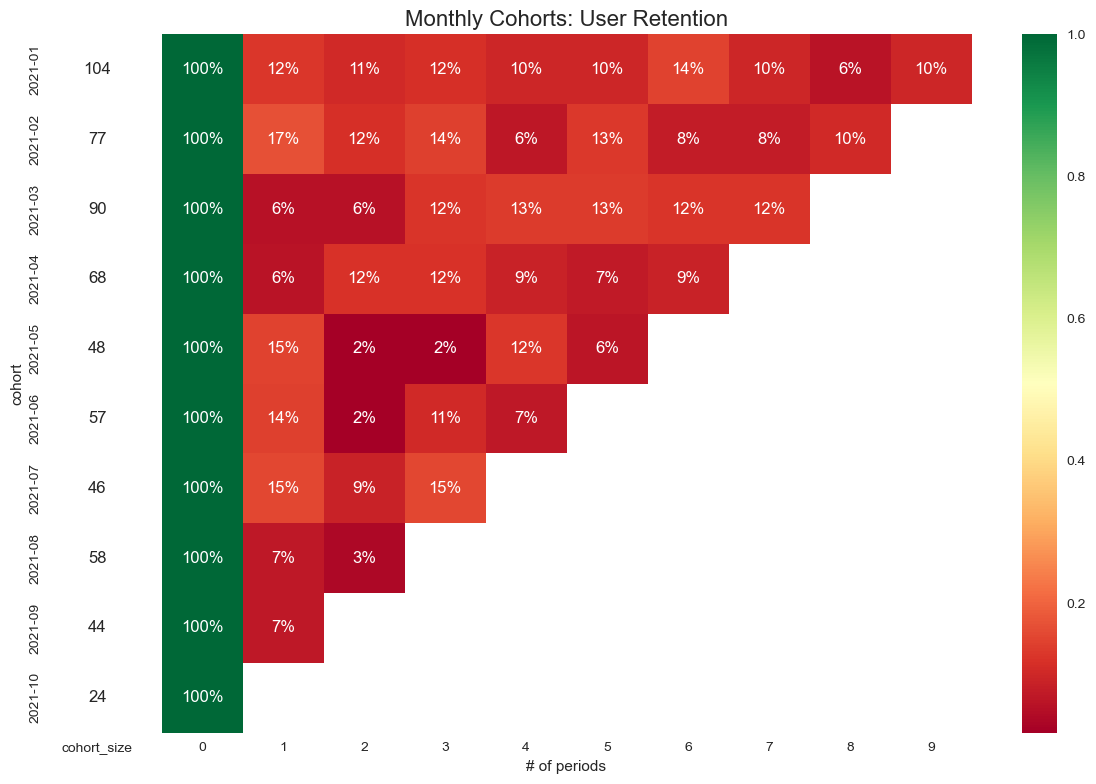

In [73]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])
    print("sans")
    fig.tight_layout()

In [74]:
cohort_size_df2 = cohort_size_df.reset_index()
retention_matrix2 = retention_matrix.reset_index()
cust_ret = cohort_size_df2.merge(retention_matrix2,how='inner',left_on='cohort',right_on='cohort')
cust_ret.to_excel('customer_retention.xlsx')

# **Market Basket Analysis**

In [75]:
# df
my_basket = []
order_id_list = []

list_orderid = df.order_id.unique().tolist()
list_orderid.sort()
list_orderid
for order_id in list_orderid:
  new_df = df[df['order_id']==order_id]['product_name']
  new_basket = []
  for item in new_df:
    new_basket.append(item)

  my_basket.append(new_basket)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

**Manual Checking**

In [76]:
def frequency_items (x,y):
    fx_=sum([x in i for i in my_basket])
    fy_=sum([y in i for i in my_basket])
    
    fxy_=sum([all(z in i for z in [x,y]) for i in my_basket])
    
    support=fxy_/len(my_basket)
    confidence = support/(fx_/len(my_basket))
    lift =confidence /(fy_/len(my_basket))
    if confidence ==1:
        conviction = 0
    else:
        conviction=(1-(fy_/len(my_basket)))/(1-confidence)
    
    print("Support = {}".format(round(support,2)))
    print("Confidence = {}".format(round(confidence,2)))
    print("Lift= {}".format(round(lift,2)))
    print("Conviction={}".format(round(conviction,2)))

In [77]:
pd.pivot_table(df,index='product_name',values='order_id', aggfunc='count')

order_id
product_name               
Bomber                  150
Camp Collared           139
Cardigan                134
Cargo Pants             134
Casual Slim Fit         154
...                     ...
Slim-Fit                154
Tracksuit Bottoms       130
Trench Coat             146
Windbreaker             143
Wool                    125

[35 rows x 1 columns]

In [78]:
frequency_items('Bomber','Cardigan')

Support = 0.02
Confidence = 0.13
Lift= 1.02
Conviction=1.0


**Using Apriori Algorithm**

In [79]:
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(my_basket)

print(encode_arr)

[[False False False ... False False  True]
 [False False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False  True]]


In [80]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

Bomber  Camp Collared  Cardigan  Cargo Pants  Casual Slim Fit  Chambray  Chinos  Coach  \
0     False          False     False        False            False      True   False  False   
1     False          False     False        False            False     False   False  False   
2     False          False     False        False            False     False   False  False   
3     False          False     False        False            False     False   False  False   
4     False          False     False        False            False     False   False   True   
..      ...            ...       ...          ...              ...       ...     ...    ...   
988    True          False     False        False            False      True   False  False   
989   False          False     False         True            False     False   False  False   
990   False          False     False        False            False     False   False  False   
991   False          False     False        False            False     False   False  False   
992   False          False     False        False            False     False    True  False   

     Cords  Cropped  Cuban Collar  Denim  Drawstring  Dress  Flannel  Henley  High-Waisted  \
0    False    False         False  False       False  False    False   False         False   
1    False     True         False  False        True  False    False   False          True   
2    False    False         False  False       False   True    False   False         False   
3    False    False         False  False        True  False    False   False          True   
4    False    False         False  False       False  False    False   False         False   
..     ...      ...           ...    ...         ...    ...      ...     ...           ...   
988  False    False         False  False       False  False    False   False         False   
989  False    False         False  False       False   True    False    True         False   
990  False    False         False  False       False  False    False   False         False   
991  False    False         False  False       False   True    False   False         False   
992  False     True         False  False       False  False    False   False         False   

     Joggers  Leather  Linen  Mandarin Collar  Oxford Cloth  Parka  Peacoat  Pleated   Polo  \
0      False    False  False            False          True   True    False    False  False   
1      False    False   True            False         False   True    False     True  False   
2      False    False  False            False          True  False    False    False  False   
3      False    False  False            False          True  False     True    False  False   
4      False    False   True            False          True   True    False     True  False   
..       ...      ...    ...              ...           ...    ...      ...      ...    ...   
988    False     True  False            False          True  False     True    False  False   
989     True    False  False            False         False  False    False    False  False   
990    False    False  False            False         False  False    False    False  False   
991    False     True  False             True         False  False    False    False   True   
992    False    False  False            False         False  False    False    False  False   

     Puffer  Pullover  Relaxed Leg  Shearling  Slim-Fit  Tracksuit Bottoms  Trench Coat  \
0      True     False        False      False     False              False        False   
1     False     False        False      False     False              False        False   
2     False     False        False      False     False              False        False   
3     False     False         True      False     False              False        False   
4      True     False        False       True     False              False        False   
..      ...       ...          ...        ...   

In [81]:
len(df['order_id'].unique())

993

**Calculating Support**

In [82]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df, min_support=0.01, use_colnames=True)
md_minsup.head(20)

support           itemsets
0     0.145           (Bomber)
1     0.137    (Camp Collared)
2     0.130         (Cardigan)
3     0.129      (Cargo Pants)
4     0.148  (Casual Slim Fit)
5     0.133         (Chambray)
6     0.124           (Chinos)
7     0.129            (Coach)
8     0.120            (Cords)
9     0.125          (Cropped)
10    0.117     (Cuban Collar)
11    0.239            (Denim)
12    0.139       (Drawstring)
13    0.119            (Dress)
14    0.136          (Flannel)
15    0.144           (Henley)
16    0.131     (High-Waisted)
17    0.151          (Joggers)
18    0.122          (Leather)
19    0.122            (Linen)

**Creating rules (Metric: Confidence) Antecedents ⇒ Consequents**

In [83]:
rules = mlxtend.frequent_patterns.association_rules(md_minsup, metric="confidence",min_threshold=0.125000,support_only=False)

rules.head(20)

antecedents        consequents  antecedent support  consequent support  support  \
0     (Camp Collared)           (Bomber)               0.137               0.145    0.017   
1            (Bomber)         (Cardigan)               0.145               0.130    0.019   
2          (Cardigan)           (Bomber)               0.130               0.145    0.019   
3            (Bomber)  (Casual Slim Fit)               0.145               0.148    0.026   
4   (Casual Slim Fit)           (Bomber)               0.148               0.145    0.026   
5            (Bomber)         (Chambray)               0.145               0.133    0.019   
6          (Chambray)           (Bomber)               0.133               0.145    0.019   
7             (Coach)           (Bomber)               0.129               0.145    0.016   
8      (Cuban Collar)           (Bomber)               0.117               0.145    0.016   
9            (Bomber)            (Denim)               0.145               0.239    0.033   
10            (Denim)           (Bomber)               0.239               0.145    0.033   
11           (Bomber)       (Drawstring)               0.145               0.139    0.022   
12       (Drawstring)           (Bomber)               0.139               0.145    0.022   
13            (Dress)           (Bomber)               0.119               0.145    0.016   
14           (Bomber)          (Flannel)               0.145               0.136    0.021   
15          (Flannel)           (Bomber)               0.136               0.145    0.021   
16           (Henley)           (Bomber)               0.144               0.145    0.025   
17           (Bomber)           (Henley)               0.145               0.144    0.025   
18           (Bomber)          (Joggers)               0.145               0.151    0.020   
19          (Joggers)           (Bomber)               0.151               0.145    0.020   

    confidence  lift  leverage  conviction  zhangs_metric  
0        0.125 0.862    -0.003       0.977         -0.156  
1        0.132 1.016     0.000       1.002          0.018  
2        0.147 1.016     0.000       1.003          0.018  
3        0.181 1.220     0.005       1.040          0.211  
4        0.177 1.220     0.005       1.039          0.211  
5        0.132 0.993    -0.000       0.999         -0.009  
6        0.144 0.993    -0.000       0.999         -0.009  
7        0.125 0.862    -0.003       0.977         -0.155  
8        0.138 0.951    -0.001       0.992         -0.055  
9        0.229 0.960    -0.001       0.988         -0.046  
10       0.139 0.960    -0.001       0.993         -0.052  
11       0.153 1.099     0.002       1.016          0.106  
12       0.159 1.099     0.002       1.017          0.105  
13       0.136 0.935    -0.001       0.989         -0.073  
14       0.146 1.073     0.001       1.012          0.079  
15       0.156 1.073     0.001       1.012          0.078  
16       0.175 1.206     0.004       1.036          0.199  
17       0.174 1.206     0.004       1.036          0.199  
18       0.139 0.919    -0.002       0.986         -0.093  
19       0.133 0.919    -0.002       0.987         -0.094

**Creating rules (Metric: Lift) Antecedents ⇒ Consequents**

In [84]:
rules2=mlxtend.frequent_patterns.association_rules(md_minsup, metric="lift",min_threshold=0.06,support_only=False)

rules2.head(20)

antecedents        consequents  antecedent support  consequent support  support  \
0            (Bomber)    (Camp Collared)               0.145               0.137    0.017   
1     (Camp Collared)           (Bomber)               0.137               0.145    0.017   
2            (Bomber)         (Cardigan)               0.145               0.130    0.019   
3          (Cardigan)           (Bomber)               0.130               0.145    0.019   
4            (Bomber)      (Cargo Pants)               0.145               0.129    0.015   
5       (Cargo Pants)           (Bomber)               0.129               0.145    0.015   
6            (Bomber)  (Casual Slim Fit)               0.145               0.148    0.026   
7   (Casual Slim Fit)           (Bomber)               0.148               0.145    0.026   
8            (Bomber)         (Chambray)               0.145               0.133    0.019   
9          (Chambray)           (Bomber)               0.133               0.145    0.019   
10           (Chinos)           (Bomber)               0.124               0.145    0.014   
11           (Bomber)           (Chinos)               0.145               0.124    0.014   
12           (Bomber)            (Coach)               0.145               0.129    0.016   
13            (Coach)           (Bomber)               0.129               0.145    0.016   
14           (Bomber)            (Cords)               0.145               0.120    0.012   
15            (Cords)           (Bomber)               0.120               0.145    0.012   
16           (Bomber)          (Cropped)               0.145               0.125    0.015   
17          (Cropped)           (Bomber)               0.125               0.145    0.015   
18           (Bomber)     (Cuban Collar)               0.145               0.117    0.016   
19     (Cuban Collar)           (Bomber)               0.117               0.145    0.016   

    confidence  lift  leverage  conviction  zhangs_metric  
0        0.118 0.862    -0.003       0.979         -0.158  
1        0.125 0.862    -0.003       0.977         -0.156  
2        0.132 1.016     0.000       1.002          0.018  
3        0.147 1.016     0.000       1.003          0.018  
4        0.104 0.808    -0.004       0.972         -0.217  
5        0.117 0.808    -0.004       0.968         -0.214  
6        0.181 1.220     0.005       1.040          0.211  
7        0.177 1.220     0.005       1.039          0.211  
8        0.132 0.993    -0.000       0.999         -0.009  
9        0.144 0.993    -0.000       0.999         -0.009  
10       0.114 0.785    -0.004       0.965         -0.238  
11       0.097 0.785    -0.004       0.970         -0.243  
12       0.111 0.862    -0.003       0.980         -0.158  
13       0.125 0.862    -0.003       0.977         -0.155  
14       0.083 0.695    -0.005       0.960         -0.339  
15       0.101 0.695    -0.005       0.951         -0.332  
16       0.104 0.834    -0.003       0.977         -0.189  
17       0.121 0.834    -0.003       0.973         -0.185  
18       0.111 0.951    -0.001       0.994         -0.057  
19       0.138 0.951    -0.001       0.992         -0.055

**Export Output**

In [85]:
associate_items = rules2
associate_items.to_excel('associate_items2.xlsx')

**Scatter plots help us to evaluate general tendencies of rules between antecedents and consequents**

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='support', ylabel='confidence'>

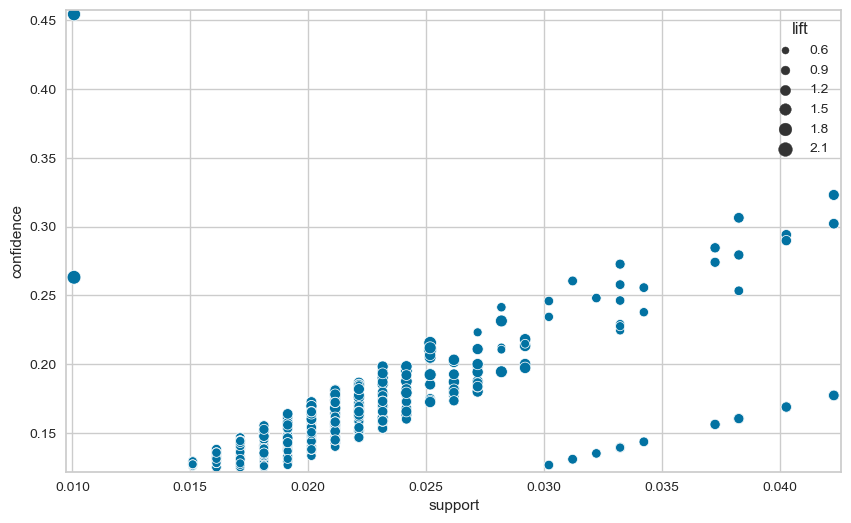

In [86]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='support', ylabel='lift'>

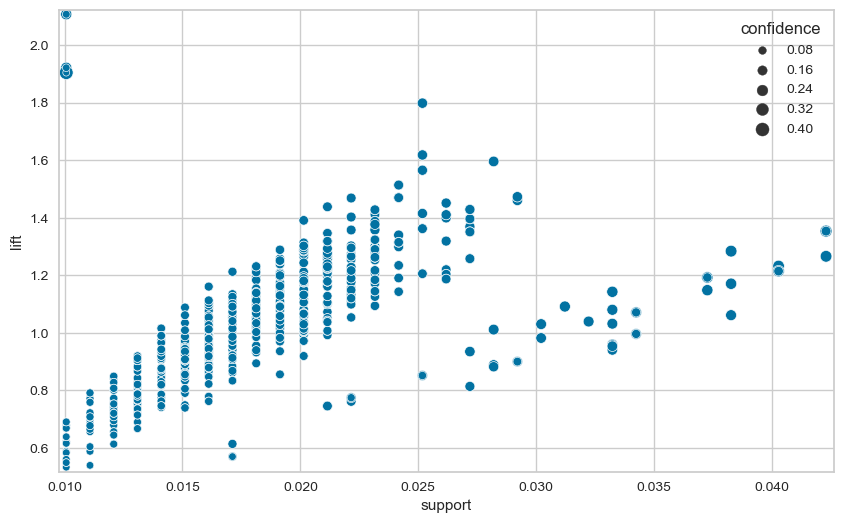

In [87]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "lift", 
                size = "confidence", data = rules2)
plt.margins(0.01,0.01)
plt.show()

# **Forecasting**

In [88]:
df_fc = df_all.groupby(['order_date'],as_index=False)['order_id'].nunique()
df_fc2 = df_all.groupby(['order_date'],as_index=False)['quantity','total_price'].sum()
df_fc = df_fc.merge(df_fc2,how='inner',left_on='order_date',right_on='order_date')
df_fc.rename(columns={'order_id':'order'},inplace=True)
# df_fc.info()
df_fc['dayname'] = df_fc['order_date'].dt.day_name()
df_fc2 = pd.get_dummies(df_fc,drop_first=True)
df_fc2.set_index('order_date',inplace=True)
df_fc2

order  quantity  total_price  dayname_Monday  dayname_Saturday  dayname_Sunday  \
order_date                                                                                   
2021-01-01      3        31         3196               0                 0               0   
2021-01-02      7        52         5374               0                 1               0   
2021-01-03      3        25         2631               0                 0               1   
2021-01-04      3        41         4223               1                 0               0   
2021-01-05      5        56         5906               0                 0               0   
...           ...       ...          ...             ...               ...             ...   
2021-10-20      3        25         2570               0                 0               0   
2021-10-21      5        61         6423               0                 0               0   
2021-10-22      6        45         4788               0                 0               0   
2021-10-23      2        20         2068               0                 1               0   
2021-10-24      3        39         4015               0                 0               1   

            dayname_Thursday  dayname_Tuesday  dayname_Wednesday  
order_date                                                        
2021-01-01                 0                0                  0  
2021-01-02                 0                0                  0  
2021-01-03                 0                0                  0  
2021-01-04                 0                0                  0  
2021-01-05                 0                1                  0  
...                      ...              ...                ...  
2021-10-20                 0                0                  1  
2021-10-21                 1                0                  0  
2021-10-22                 0                0                  0  
2021-10-23                 0                0                  0  
2021-10-24                 0                0                  0  

[291 rows x 9 columns]

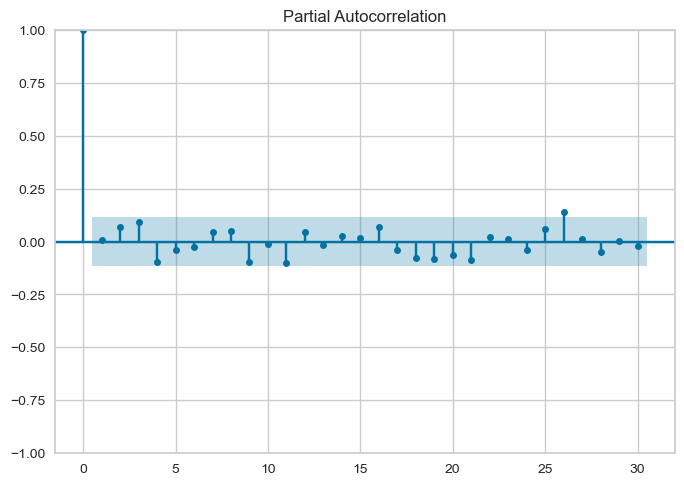

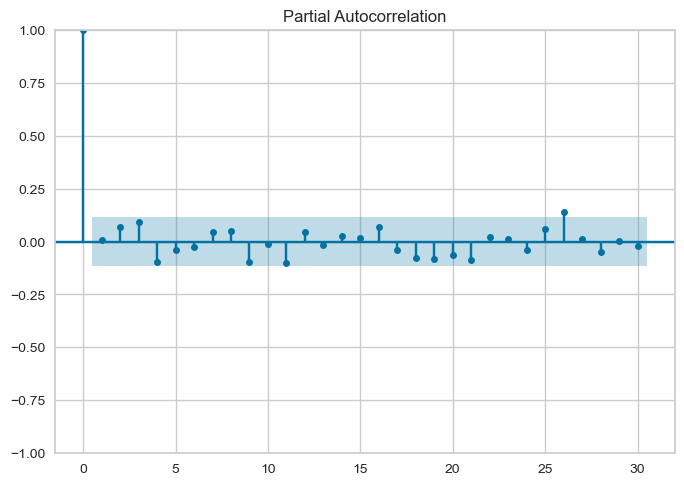

In [89]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df_fc['order'], lags = 30)
plt.show()

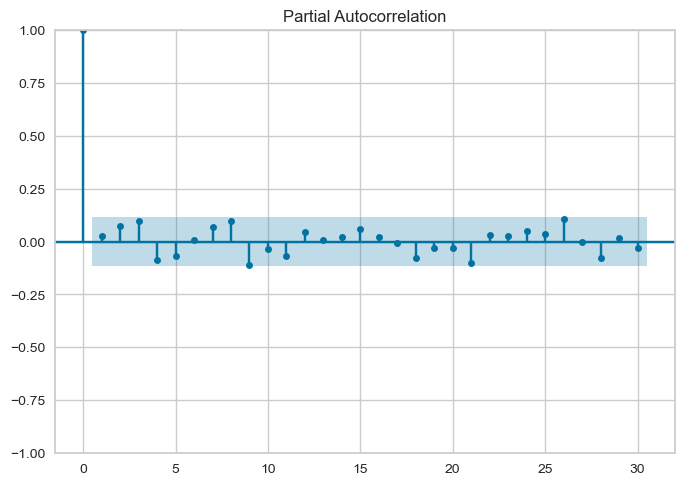

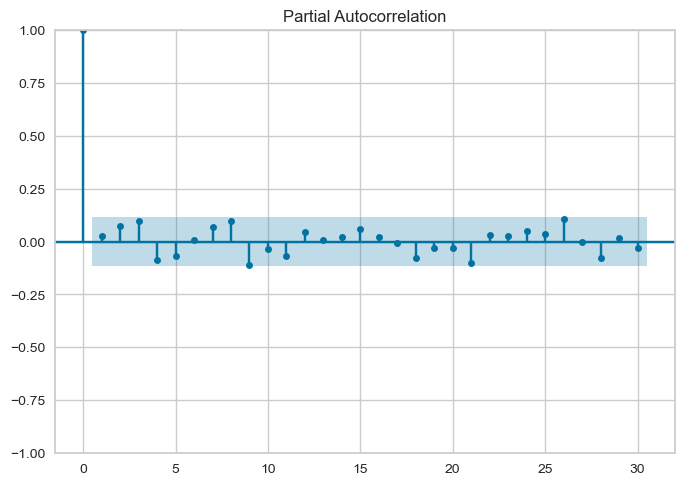

In [90]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df_fc['quantity'], lags = 30)
plt.show()

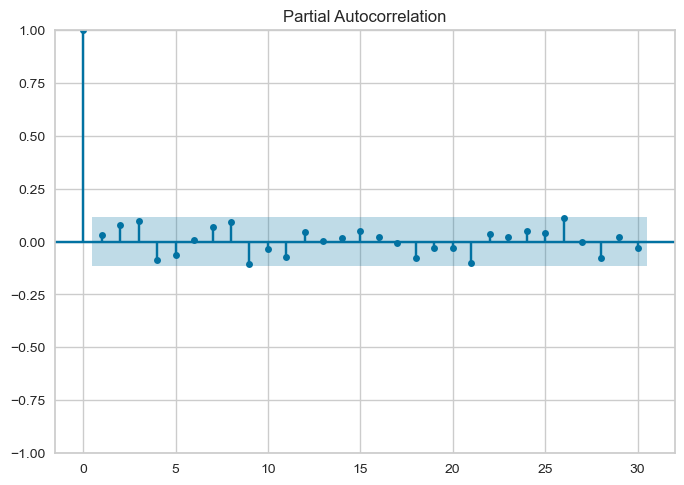

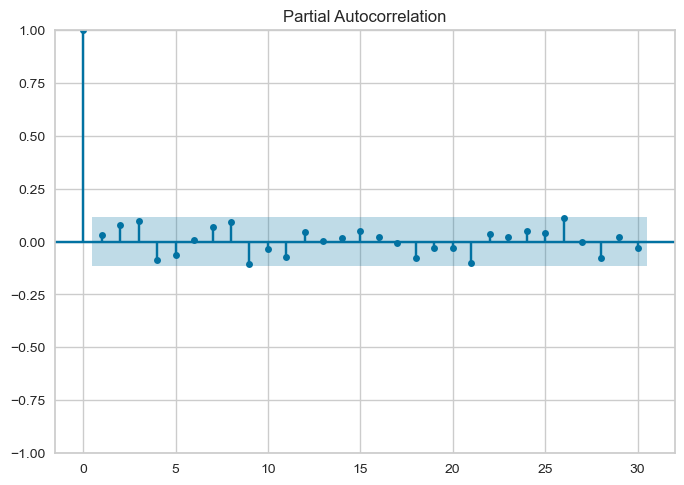

In [91]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df_fc['total_price'], lags = 30)
plt.show()

In [92]:
df_fc2['lag_order'] = df_fc2['order'].shift(1)
df_fc2['lag2_order'] = df_fc2['order'].shift(2)
df_fc2['lag3_order'] = df_fc2['order'].shift(3)
df_fc2['lag4_order'] = df_fc2['order'].shift(4)
df_fc2['lag5_order'] = df_fc2['order'].shift(5)

In [93]:
# Data for forecasting
df_forecast = df_fc2.copy()

# Remove NA
df_forecast = df_forecast[~df_forecast.isna().any(axis=1)]

df_forecast.columns

Index(['order', 'quantity', 'total_price', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday', 'lag_order', 'lag2_order',
       'lag3_order', 'lag4_order', 'lag5_order'],
      dtype='object')

In [94]:
# Define predictor and 
X = df_forecast[['quantity', 'total_price',
        'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
        'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
        'lag_order', 'lag2_order', 'lag3_order',
        'lag4_order', 'lag5_order']]

y = df_forecast[['order']]

# To test the accuracy of our forecast, let's only train the model until June 2012 and see forecast from it forward
X_train = X[X.index < '2021-10-01']
y_train = y[y.index < '2021-10-01']



X_test = X[X.index >= '2021-10-01']
y_test = y[y.index >= '2021-10-01']

In [95]:
from sklearn.linear_model import LinearRegression # model lin. reg

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
model.score(X_train,y_train)

0.8110399921941858

In [97]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(X)

# Combine result to original data
df_fc_pred = df_fc2.merge(df_prediction, how='left', left_index = True, right_index = True)
df_fc_pred

order_x  quantity  total_price  dayname_Monday  dayname_Saturday  dayname_Sunday  \
order_date                                                                                     
2021-01-01        3        31         3196               0                 0               0   
2021-01-02        7        52         5374               0                 1               0   
2021-01-03        3        25         2631               0                 0               1   
2021-01-04        3        41         4223               1                 0               0   
2021-01-05        5        56         5906               0                 0               0   
...             ...       ...          ...             ...               ...             ...   
2021-10-20        3        25         2570               0                 0               0   
2021-10-21        5        61         6423               0                 0               0   
2021-10-22        6        45         4788               0                 0               0   
2021-10-23        2        20         2068               0                 1               0   
2021-10-24        3        39         4015               0                 0               1   

            dayname_Thursday  dayname_Tuesday  dayname_Wednesday  lag_order  lag2_order  \
order_date                                                                                
2021-01-01                 0                0                  0        NaN         NaN   
2021-01-02                 0                0                  0      3.000         NaN   
2021-01-03                 0                0                  0      7.000       3.000   
2021-01-04                 0                0                  0      3.000       7.000   
2021-01-05                 0                1                  0      3.000       3.000   
...                      ...              ...                ...        ...         ...   
2021-10-20                 0                0                  1      6.000       3.000   
2021-10-21                 1                0                  0      3.000       6.000   
2021-10-22                 0                0                  0      5.000       3.000   
2021-10-23                 0                0                  0      6.000       5.000   
2021-10-24                 0                0                  0      2.000       6.000   

            lag3_order  lag4_order  lag5_order  order_y  Predicted  
order_date                                                          
2021-01-01         NaN         NaN         NaN      NaN        NaN  
2021-01-02         NaN         NaN         NaN      NaN        NaN  
2021-01-03         NaN         NaN         NaN      NaN        NaN  
2021-01-04       3.000         NaN         NaN      NaN        NaN  
2021-01-05       7.000       3.000         NaN      NaN        NaN  
...                ...         ...         ...      ...        ...  
2021-10-20       2.000       2.000       4.000    3.000      2.826  
2021-10-21       3.000       2.000       2.000    5.000      5.417  
2021-10-22       6.000       3.000       2.000    6.000      4.316  
2021-10-23       3.000       6.000       3.000    2.000      2.146  
2021-10-24       5.000       3.000       6.000    3.000      3.851  

[291 rows x 16 columns]

In [98]:
df_fc_pred[~df_fc_pred['Predicted'].isna()]['order_x']

order_date
2021-01-06    2
2021-01-07    5
2021-01-08    2
2021-01-09    5
2021-01-10    6
             ..
2021-10-20    3
2021-10-21    5
2021-10-22    6
2021-10-23    2
2021-10-24    3
Name: order_x, Length: 286, dtype: int64

<Axes: xlabel='order_month'>

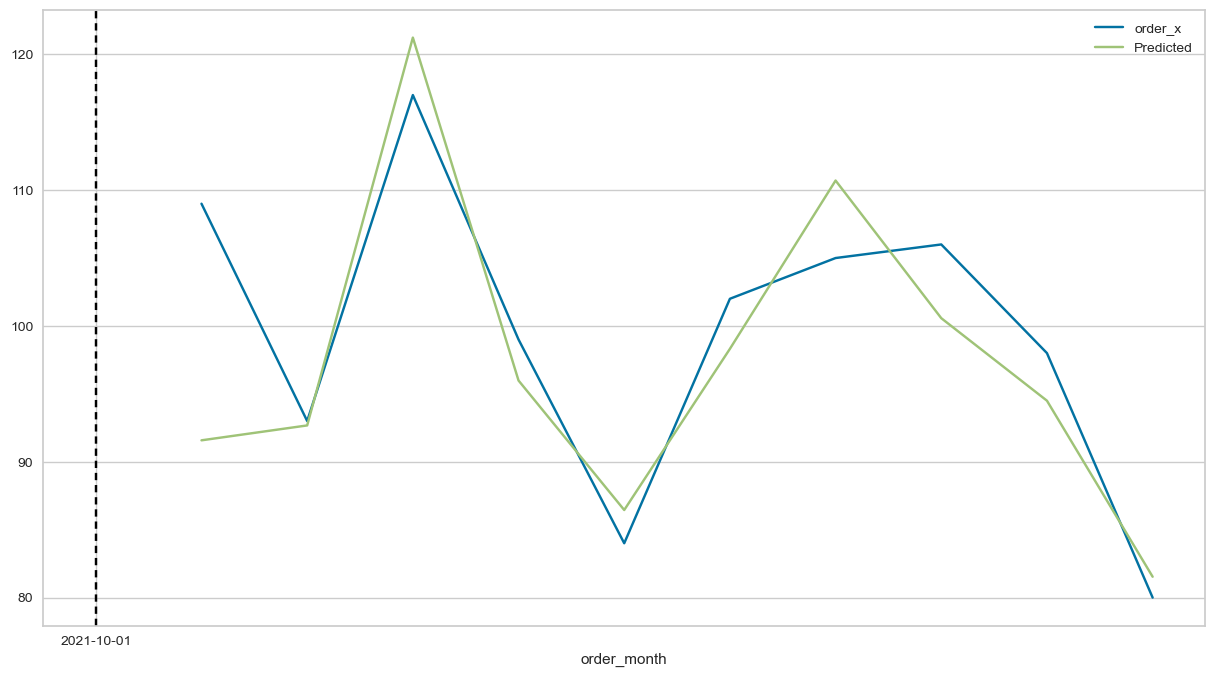

In [99]:
df_fc_pred['order_month'] = df_fc_pred.index.month
df_fig = df_fc_pred.groupby('order_month')['order_x','Predicted'].sum()
# df_fig
fig = df_fig[['order_x','Predicted']].plot(kind = 'line', figsize = (15,8))
fig.axvline(x = '2021-10-01',color = 'black', dashes = (3,2))
fig

In [100]:
#how to check RMSE score(this usually used in kaggle)

from sklearn.metrics import mean_squared_error
import math


#we filter check the testing data (not used in training)
test = df_fc_pred[df_fc_pred.index >= '2021-10-01']
y_actual = test['order_x']
y_predicted = test['Predicted']
 
MSE = mean_squared_error(y_actual, y_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
#your prediction off around 50k from actual data

Root Mean Square Error:

0.6527718784954463


In [101]:
test

order_x  quantity  total_price  dayname_Monday  dayname_Saturday  dayname_Sunday  \
order_date                                                                                     
2021-10-01        1        11         1101               0                 0               0   
2021-10-02        2        28         2817               0                 1               0   
2021-10-03        5        54         5654               0                 0               1   
2021-10-04        1        13         1383               1                 0               0   
2021-10-05        2        10         1053               0                 0               0   
2021-10-06        2        25         2627               0                 0               0   
2021-10-07        3        36         3838               0                 0               0   
2021-10-08        6        60         6036               0                 0               0   
2021-10-09        2        14         1360               0                 1               0   
2021-10-10        4        33         3413               0                 0               1   
2021-10-11        6        52         5128               1                 0               0   
2021-10-12        2         6          648               0                 0               0   
2021-10-13        6        75         7895               0                 0               0   
2021-10-14        2        25         2610               0                 0               0   
2021-10-15        4        45         4725               0                 0               0   
2021-10-16        2        12         1185               0                 1               0   
2021-10-17        2        21         2186               0                 0               1   
2021-10-18        3        33         3424               1                 0               0   
2021-10-19        6        71         7319               0                 0               0   
2021-10-20        3        25         2570               0                 0               0   
2021-10-21        5        61         6423               0                 0               0   
2021-10-22        6        45         4788               0                 0               0   
2021-10-23        2        20         2068               0                 1               0   
2021-10-24        3        39         4015               0                 0               1   

            dayname_Thursday  dayname_Tuesday  dayname_Wednesday  lag_order  lag2_order  \
order_date                                                                                
2021-10-01                 0                0                  0      8.000       3.000   
2021-10-02                 0                0                  0      1.000       8.000   
2021-10-03                 0                0                  0      2.000       1.000   
2021-10-04                 0                0                  0      5.000       2.000   
2021-10-05                 0                1                  0      1.000       5.000   
2021-10-06                 0                0                  1      2.000       1.000   
2021-10-07                 1                0                  0      2.000       2.000   
2021-10-08                 0                0                  0      3.000       2.000   
2021-10-09                 0                0                  0      6.000       3.000   
2021-10-10                 0                0                  0      2.000       6.000   
2021-10-11                 0                0                  0      4.000       2.000   
2021-10-12                 0                1                  0      6.000       4.000   
2021-10-13                 0                0                  1      2.000       6.000   
2021-10-14                 1                0                  0      6.000       2.000   
2021-10-15                 0                0              

**Forecasting using Arima**

Note: this section is unfinished, will be continue

In [102]:
from statsmodels.tsa.arima.model import ARIMA

In [103]:
ARIMAmodel = ARIMA(y, order = (2, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

# y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred = ARIMAmodel.get_forecast(90)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df
# y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"] 
# plt.plot(y_actual, color='Blue', label = 'Order')
# plt.plot(y_pred_out, color='Orange', label = 'ARIMA Predictions')
# plt.legend()

lower order  upper order
286       -0.169        7.636
287       -1.211        6.900
288       -1.180        7.612
289       -1.683        8.227
290       -2.124        8.319
..           ...          ...
371      -14.501       20.858
372      -14.600       20.957
373      -14.699       21.056
374      -14.797       21.154
375      -14.895       21.251

[90 rows x 2 columns]

# **Data Preparation 1**

<Axes: >

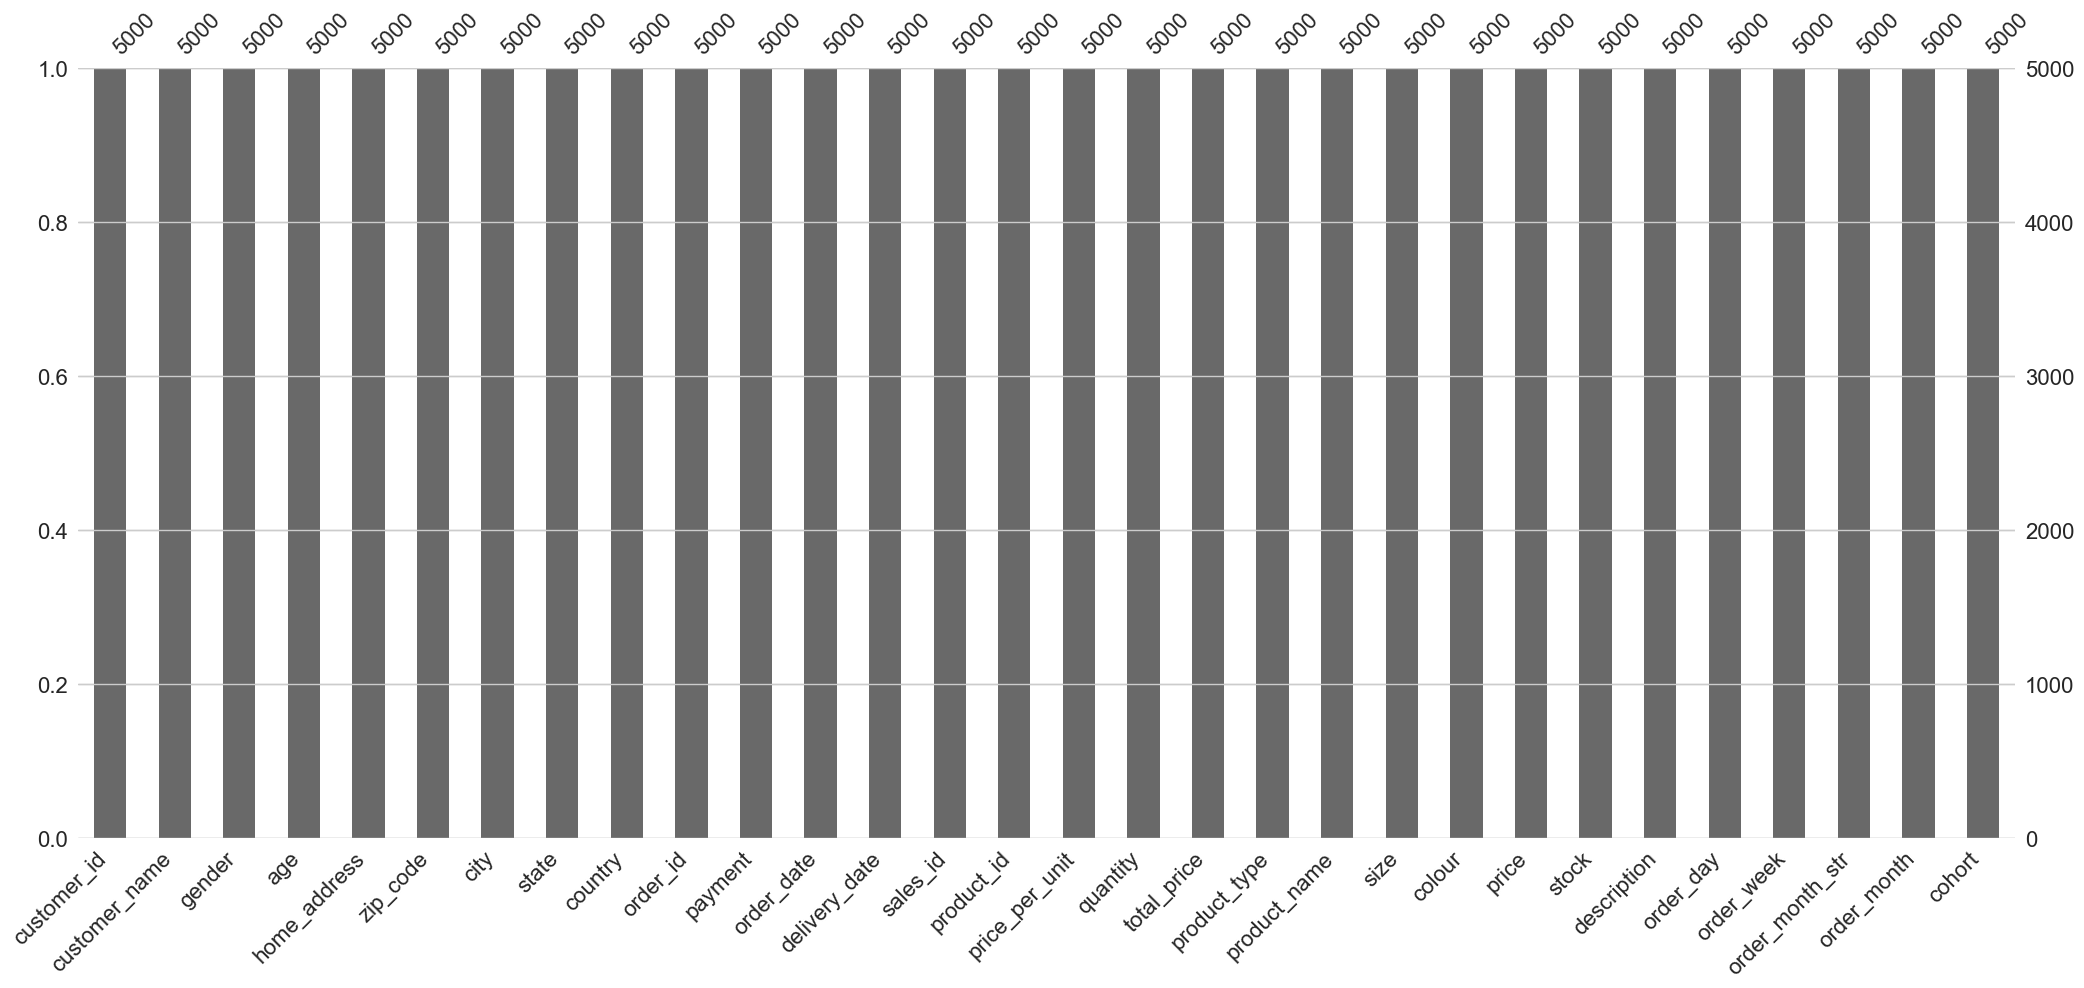

In [104]:
import missingno as msno
msno.bar(df)

In [105]:
df.duplicated().sum()

0

**What is the overall distribution of customer ages in the dataset?**

In [106]:
# Count of the each age value
df['age'].value_counts()

57    168
32    144
38    140
75    135
34    134
     ... 
29     45
77     37
72     35
33     33
65     26
Name: age, Length: 61, dtype: int64

In [107]:
# mean or average value of age 
df['age'].mean()

48.7604

In [108]:
# unique function shows the unique values of any columns
df['gender'].unique()

array(['Non-binary', 'Male', 'Genderqueer', 'Genderfluid', 'Agender',
       'Bigender', 'Female', 'Polygender'], dtype=object)

In [109]:
# we are cutting the age into some category and storing in the different column
df['age_category'] = pd.cut(df['age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [112]:
# we use plotly library to use plots
fig = px.histogram(df , y = 'age' , x = 'age_category')
fig.show()

**How does the average purchase amount vary across different product categories?**

In [113]:
df['product_type'].unique()

array(['Shirt', 'Jacket', 'Trousers'], dtype=object)

In [114]:
df.groupby('product_type')['quantity'].mean()

product_type
Jacket     1.995
Shirt      1.986
Trousers   1.996
Name: quantity, dtype: float64

**Which gender has the highest number of purchases?**

<Axes: xlabel='gender', ylabel='quantity'>

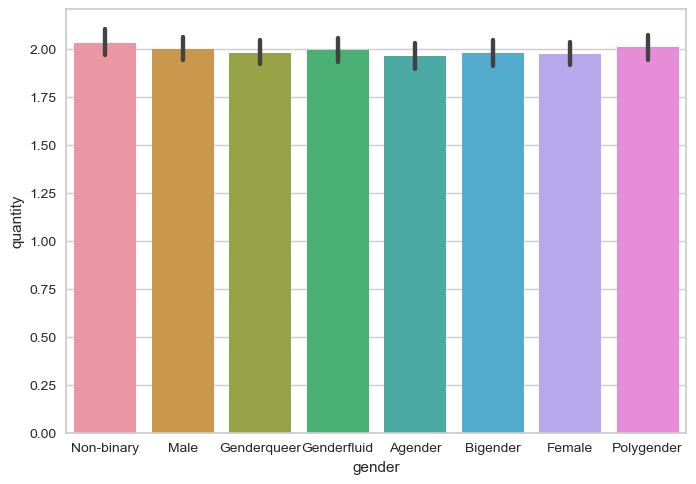

In [115]:
# this is the seaborn plot
sns.barplot(df , x = 'gender' , y = 'quantity')

In [116]:
df_group = df.groupby('gender')['quantity'].sum().reset_index()

In [117]:
fig = px.bar(df_group , x = 'gender' , y = 'quantity')
fig.show()

<Figure size 2000x2500 with 0 Axes>

<Axes: xlabel='product_type', ylabel='count'>

Text(0.5, 0, 'product_type')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution Category by Gender')

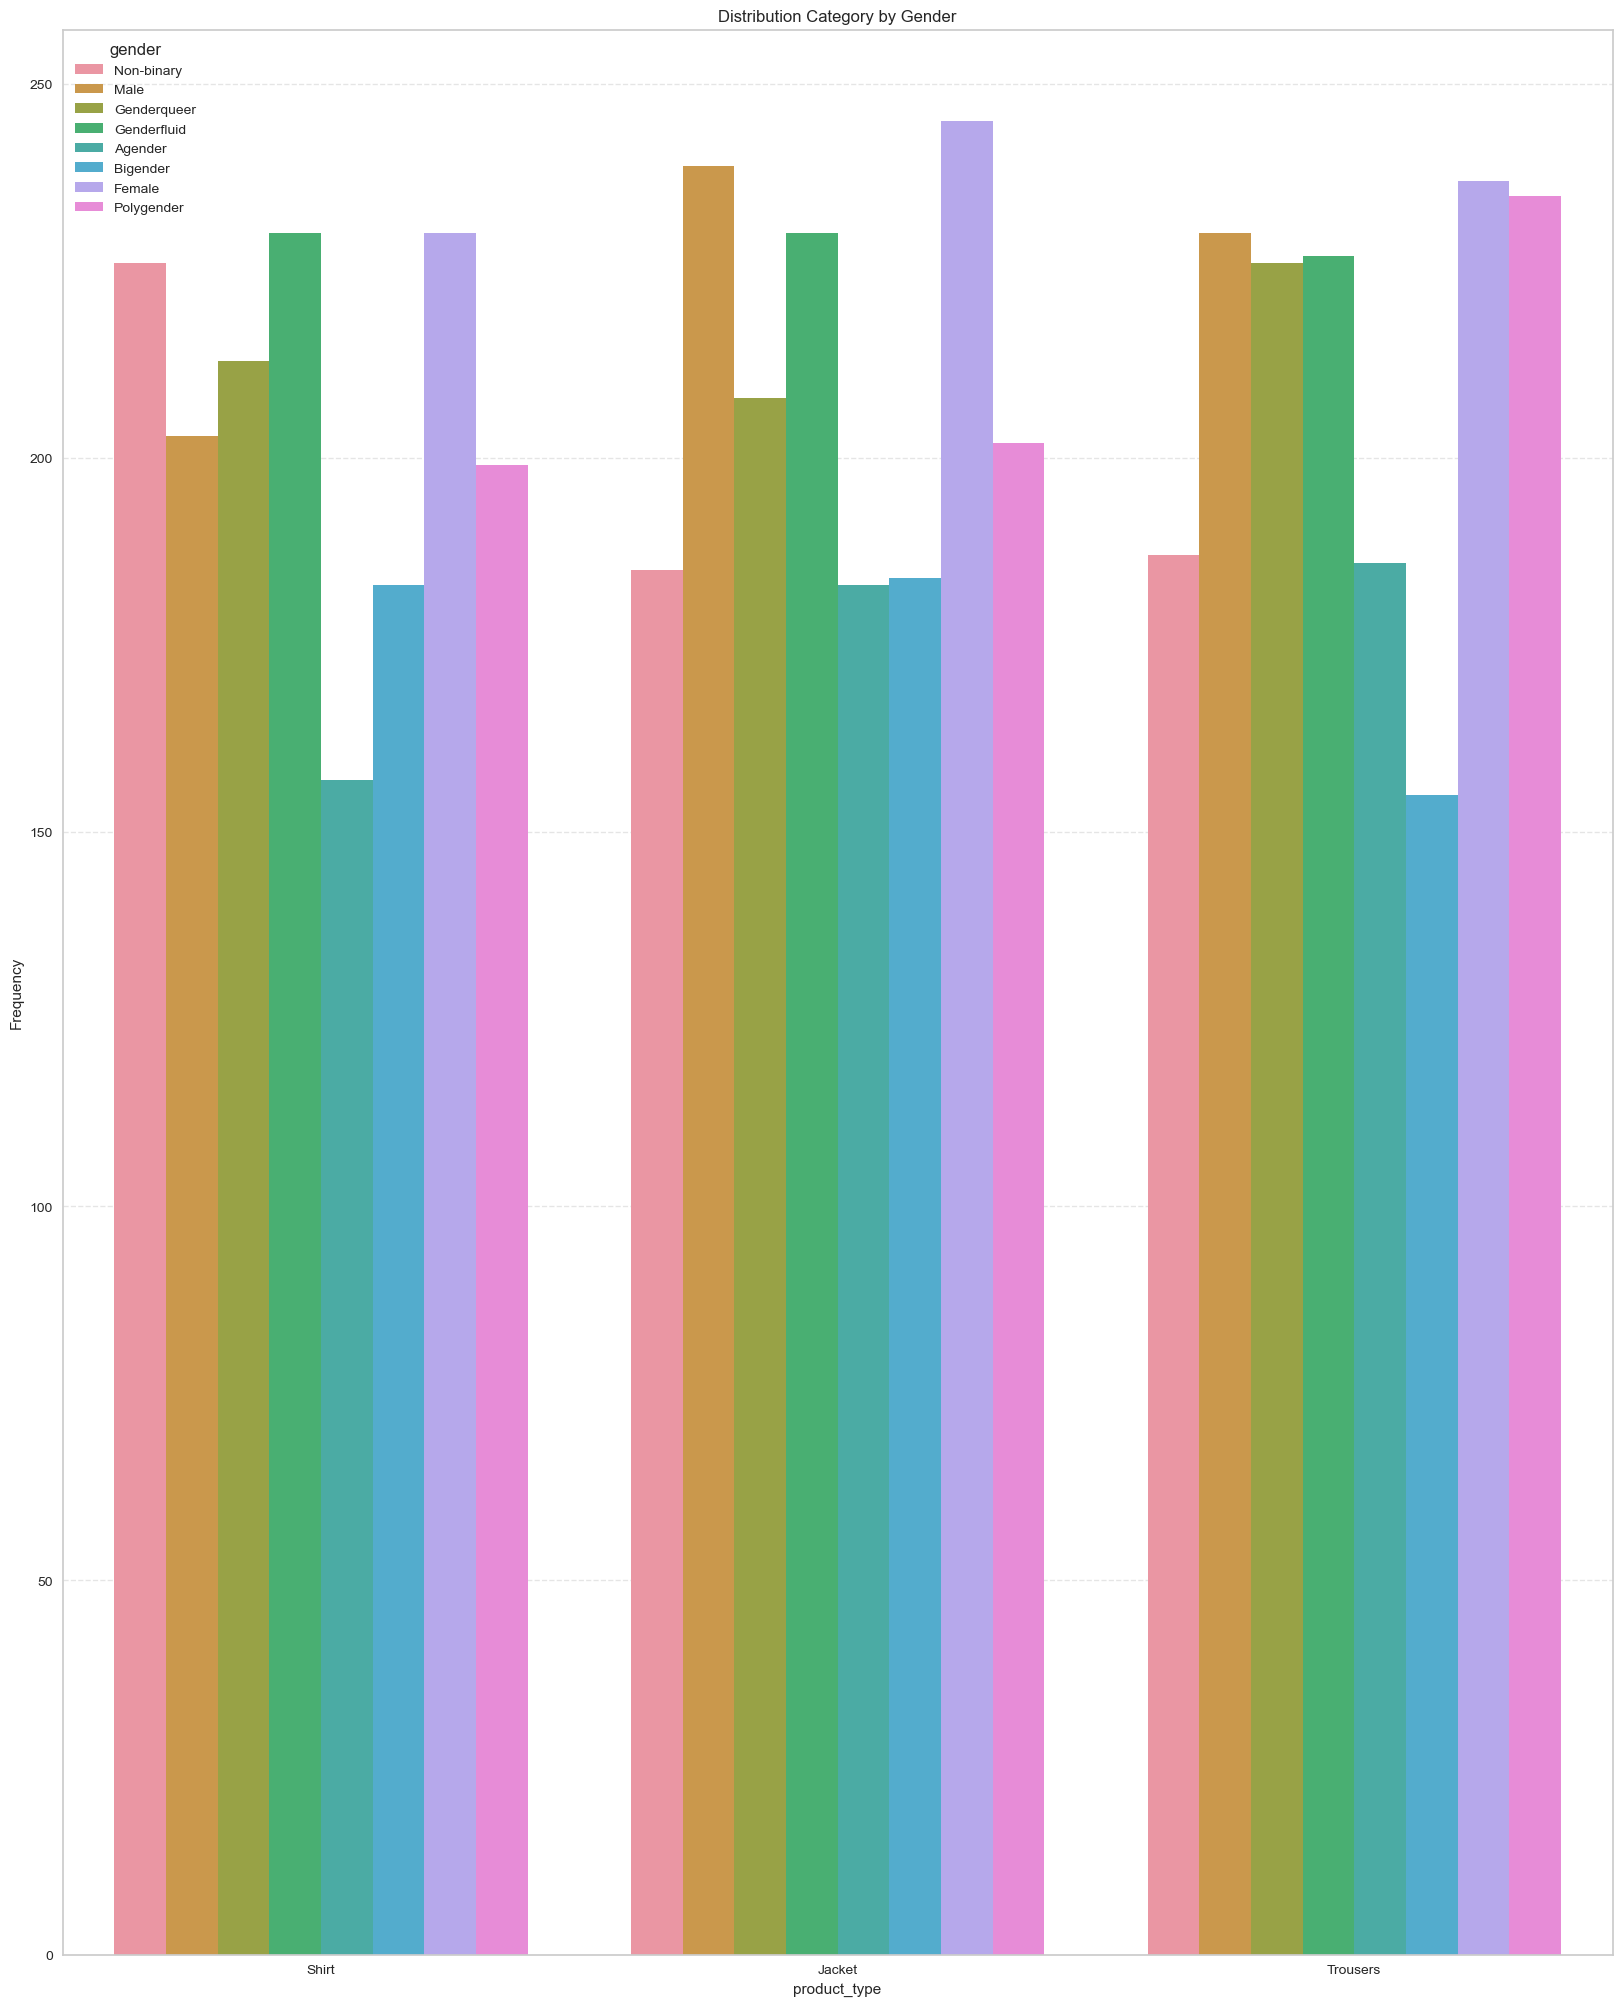

In [118]:
plt.figure(figsize=(20,25))
sns.countplot(data=df, x='product_type',hue='gender')
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.xlabel('product_type')
plt.ylabel('Frequency')
plt.title('Distribution Category by Gender')

**What are the most commonly purchased items in each category?**

In [119]:
# we are seeking Item purchased based on Category
df.groupby('product_type')['product_name'].value_counts()

product_type  product_name     
Jacket        Bomber               150
              Shearling            150
              Trench Coat          146
              Pullover             143
              Windbreaker          143
                                  ... 
Trousers      Cropped              135
              Cargo Pants          134
              Tracksuit Bottoms    130
              Cords                126
              Wool                 125
Name: product_name, Length: 36, dtype: int64

In [120]:
fig = px.histogram(df , x = 'product_name' , color = 'product_type')
fig.show()

<Axes: ylabel='product_type'>

Text(0.5, 1.0, 'Distribution of Category')

Text(0, 0.5, ' ')

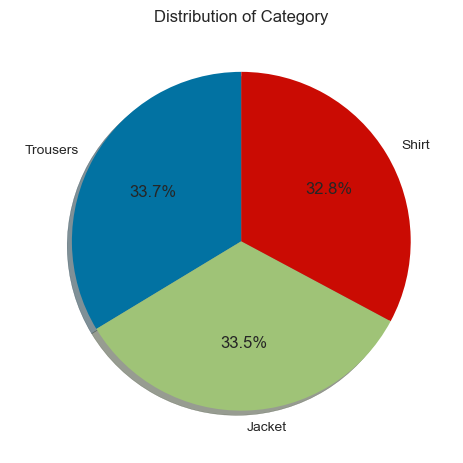

In [121]:
df['product_type'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True, startangle=90)
plt.title('Distribution of Category')
plt.ylabel(' ')

**How does the frequency of purchases vary across different age groups?**

In [122]:
# we are cutting the age into some category and storing in the different column
# df['age_category'] = pd.cut(df['age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
#                                                                                              , 'old'] )

df[['age' , 'age_category']]

age  age_category
458    20  Young Adults
428    20  Young Adults
4585   20  Young Adults
4581   20  Young Adults
3760   20  Young Adults
...   ...           ...
4942   80           NaN
430    80           NaN
4045   80           NaN
587    80           NaN
3250   80           NaN

[5000 rows x 2 columns]

In [123]:
df['age_category'].unique()

['Young Adults', 'Middle-Aged Adults', 'old', NaN]
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='product_type', ylabel='count'>

Text(0.5, 0, 'product_type')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution Product Type by age category')

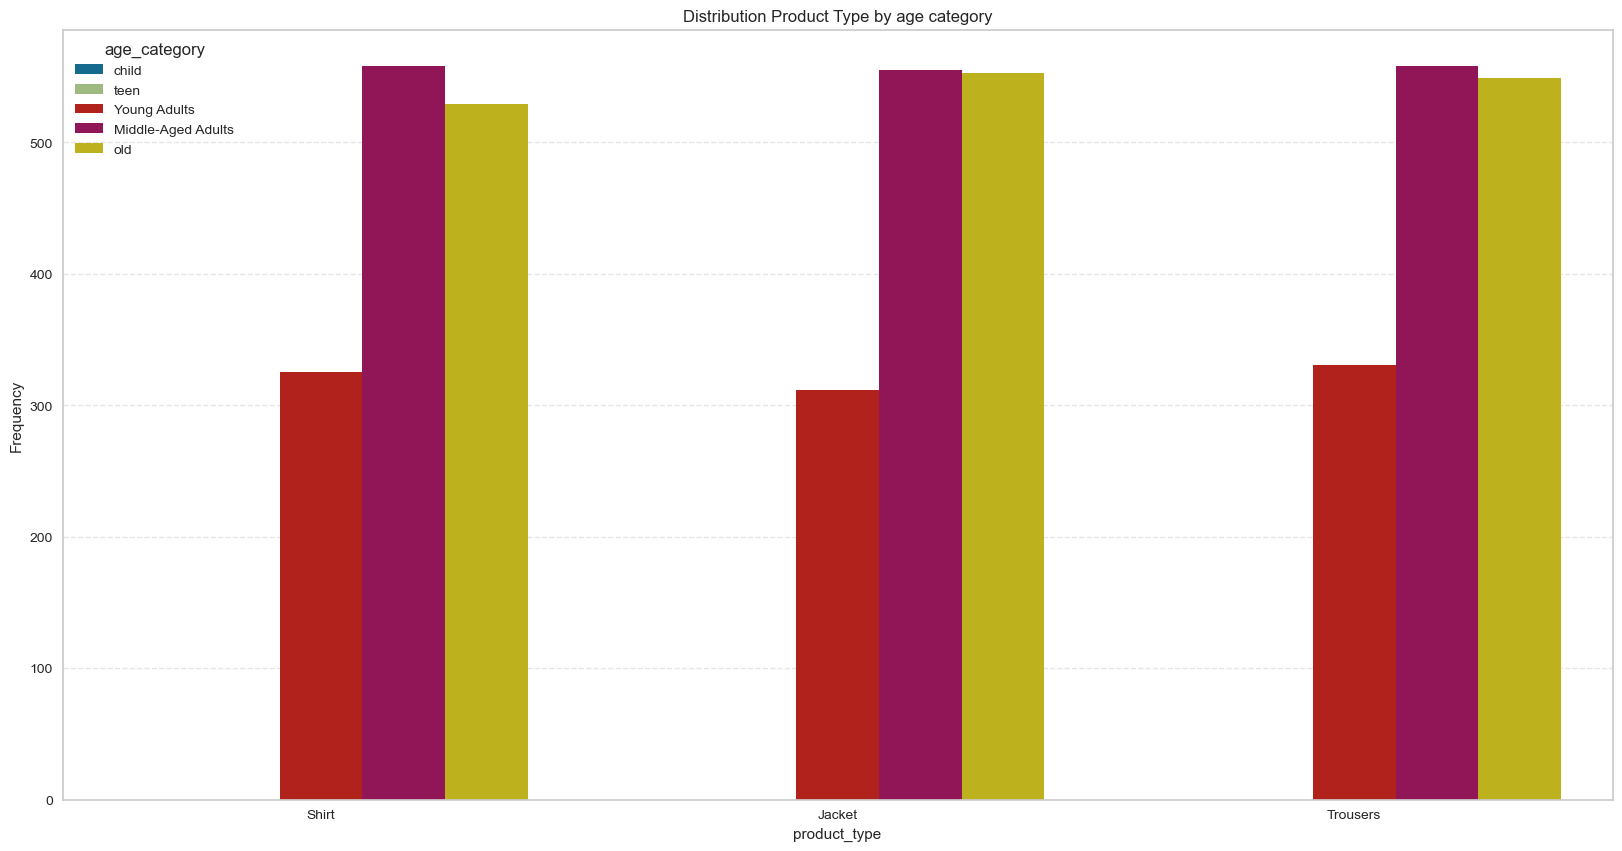

In [124]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='product_type',hue='age_category')
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.xlabel('product_type')
plt.ylabel('Frequency')
plt.title('Distribution Product Type by age category')

<Figure size 4000x2000 with 0 Axes>

<Axes: xlabel='product_name', ylabel='count'>

Text(0.5, 0, 'product_name')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution Products by age category')

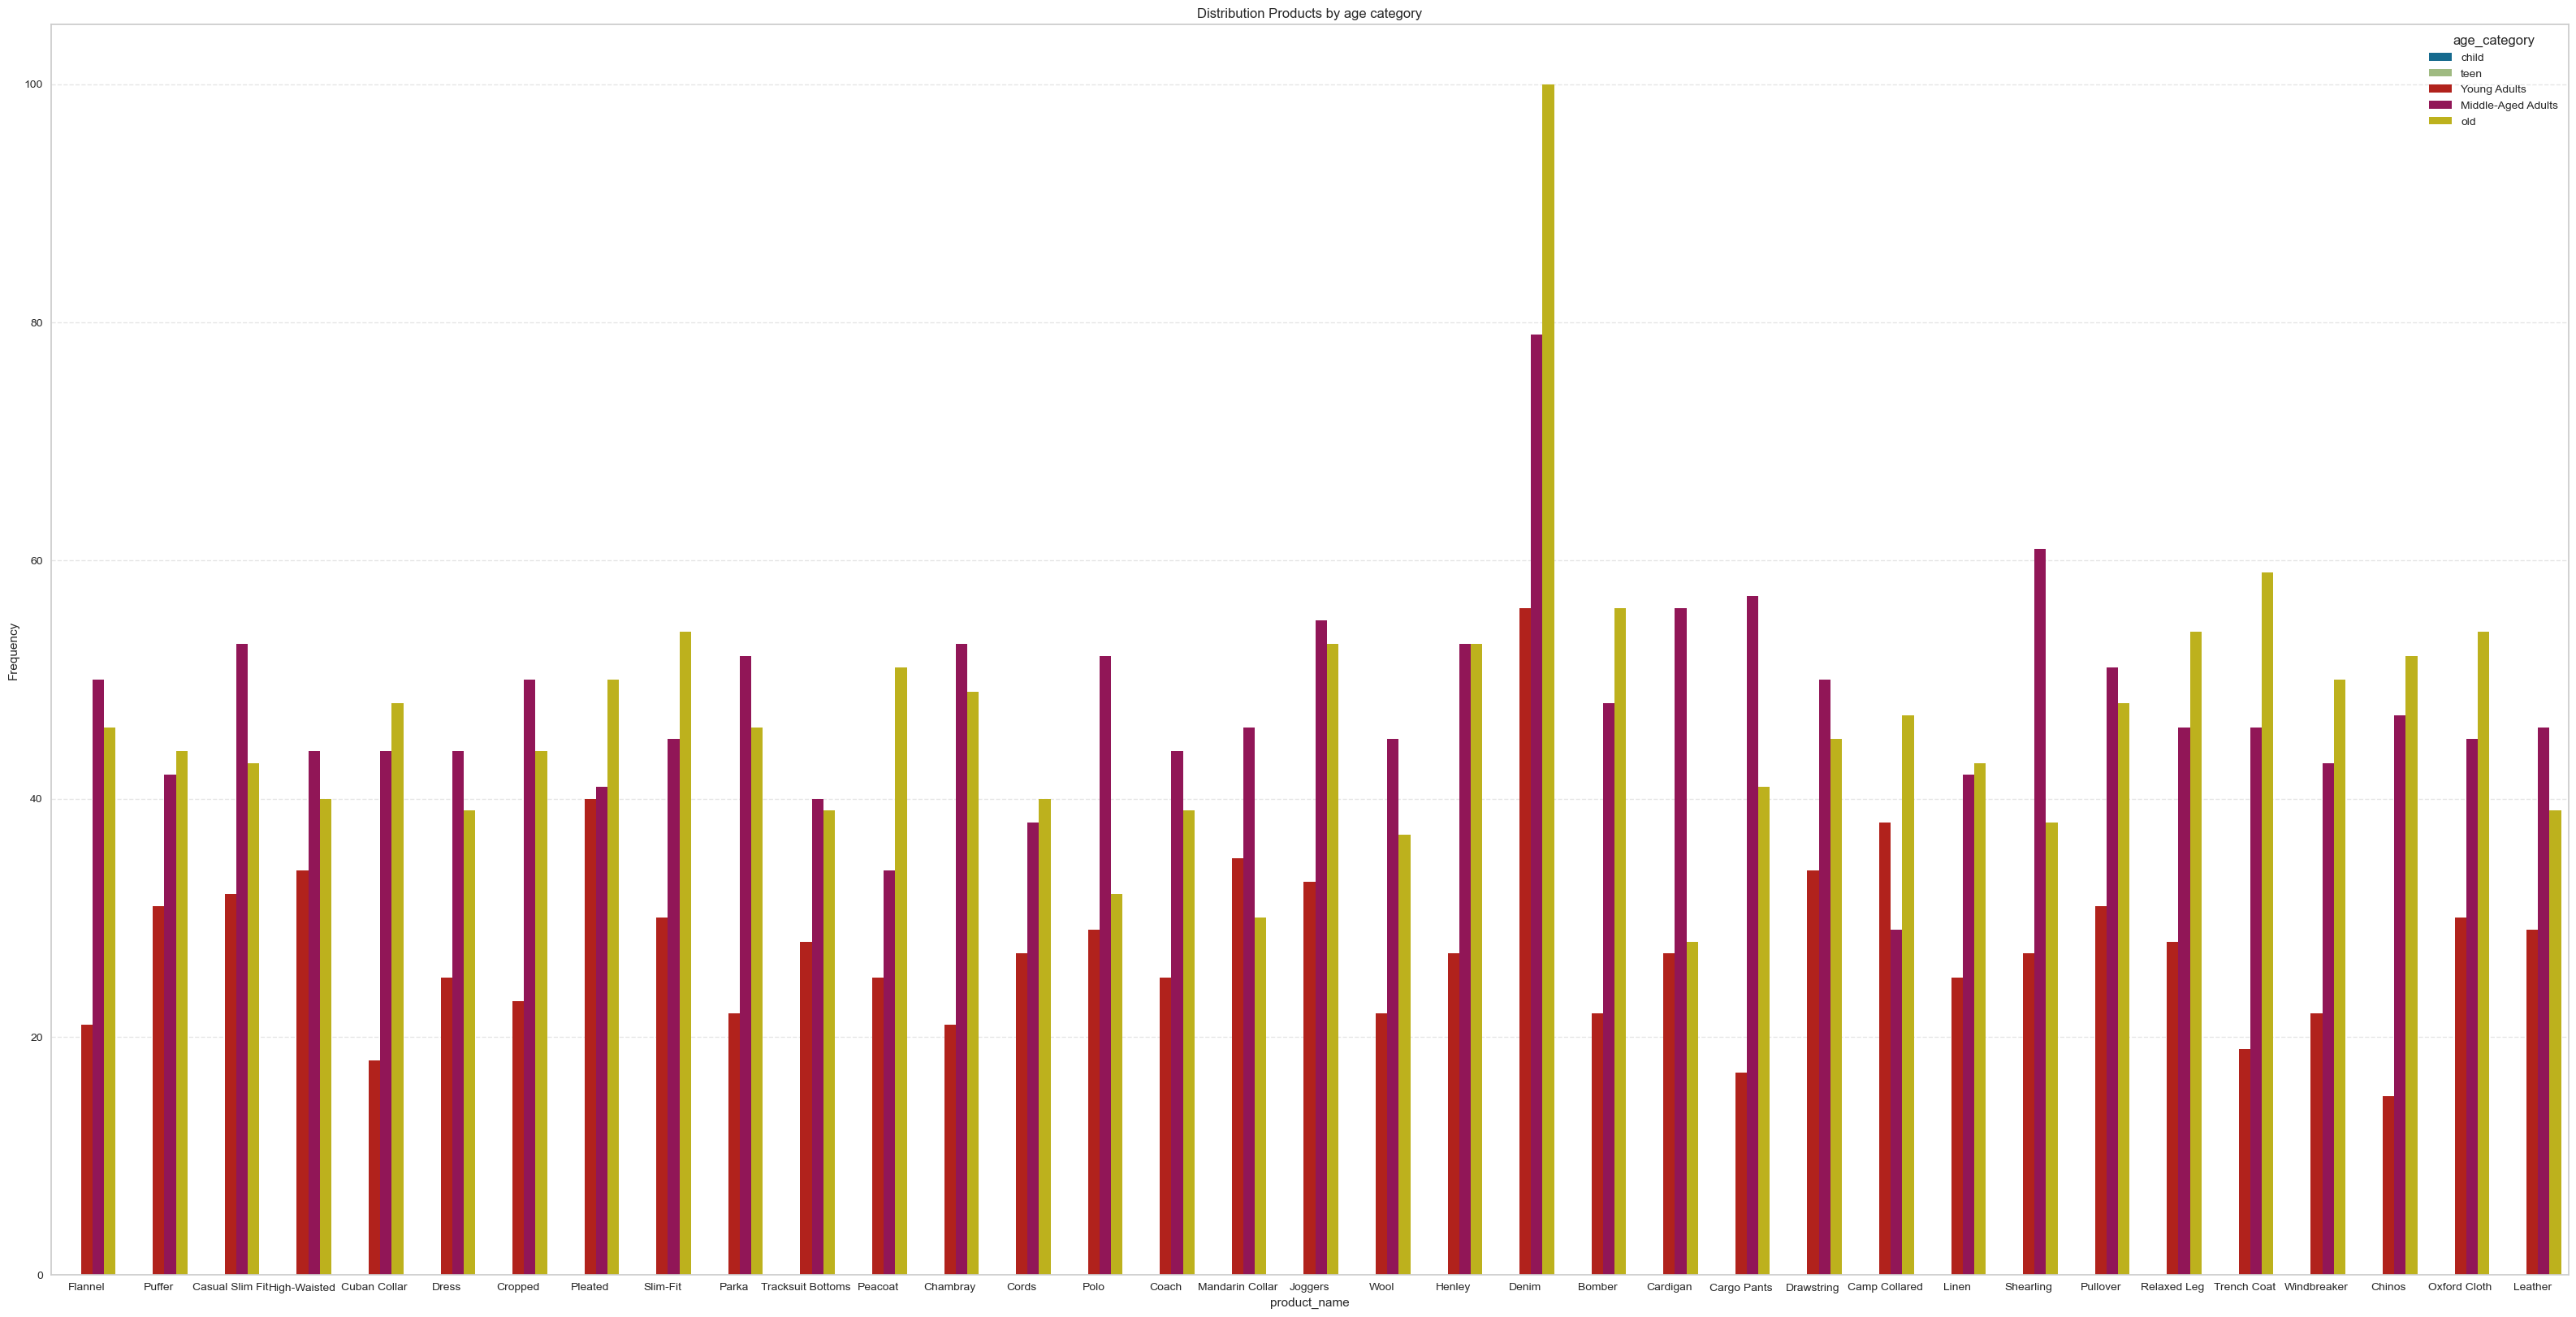

In [125]:
plt.figure(figsize=(40,20))
sns.countplot(data=df, x='product_name',hue='age_category')
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.xlabel('product_name')
plt.ylabel('Frequency')
plt.title('Distribution Products by age category')

**Are there any correlations between the size of the product and the purchase amount?**

In [126]:
df_group = df.groupby('size')['stock'].sum().reset_index()

In [127]:
fig  = px.bar(df_group , x = 'size' , y ='stock'  )
fig.show()

In [128]:
df['stock'].mean()

60.0834

**Are there any specific colors that are more popular among customers?**

In [129]:
df['colour'].value_counts().nlargest(5)

blue      762
violet    739
indigo    726
orange    697
green     694
Name: colour, dtype: int64

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='colour', ylabel='count'>

Text(0.5, 0, 'colour')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution Product Type by colour')

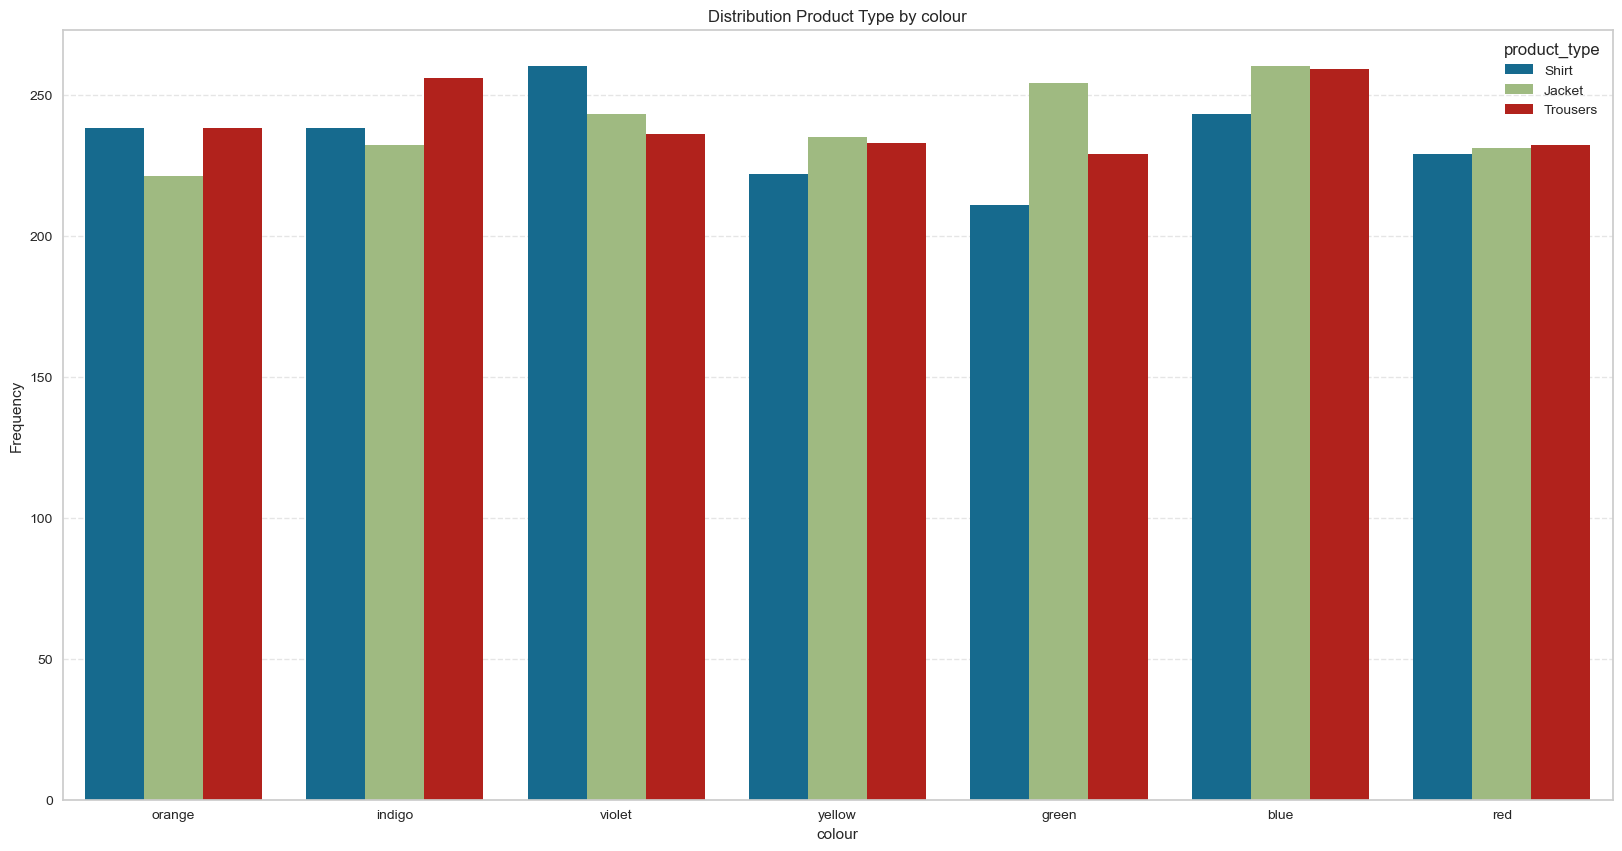

In [130]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='colour',hue='product_type')
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.xlabel('colour')
plt.ylabel('Frequency')
plt.title('Distribution Product Type by colour')

**Which age has the highest number of purchases?**

In [131]:
df_group = df.groupby('product_type')['age'].mean().reset_index()

In [132]:
fig = px.bar(df_group ,y = 'age' , x= 'product_type')
fig.show()

In [133]:
df_group = df.groupby('product_name')['age'].mean().reset_index()

In [134]:
fig = px.bar(df_group ,y = 'age' , x= 'product_name')
fig.show()

**Which age has the largest number of purchases based on size?**

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='size', ylabel='age'>

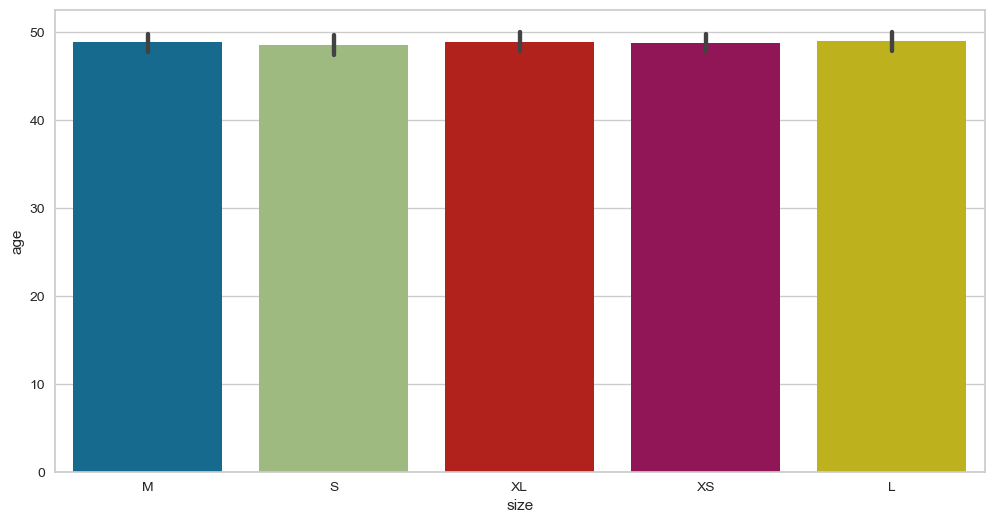

In [135]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='size', y='age')

**Best Selling Products**

<Figure size 1200x600 with 0 Axes>

<Axes: title={'center': 'Top 10 Products Most Buy'}>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Denim'),
  Text(1, 0, 'Joggers'),
  Text(2, 0, 'Casual Slim Fit'),
  Text(3, 0, 'Slim-Fit'),
  Text(4, 0, 'Shearling'),
  Text(5, 0, 'Bomber'),
  Text(6, 0, 'Pleated'),
  Text(7, 0, 'Drawstring'),
  Text(8, 0, 'Henley'),
  Text(9, 0, 'Oxford Cloth')])

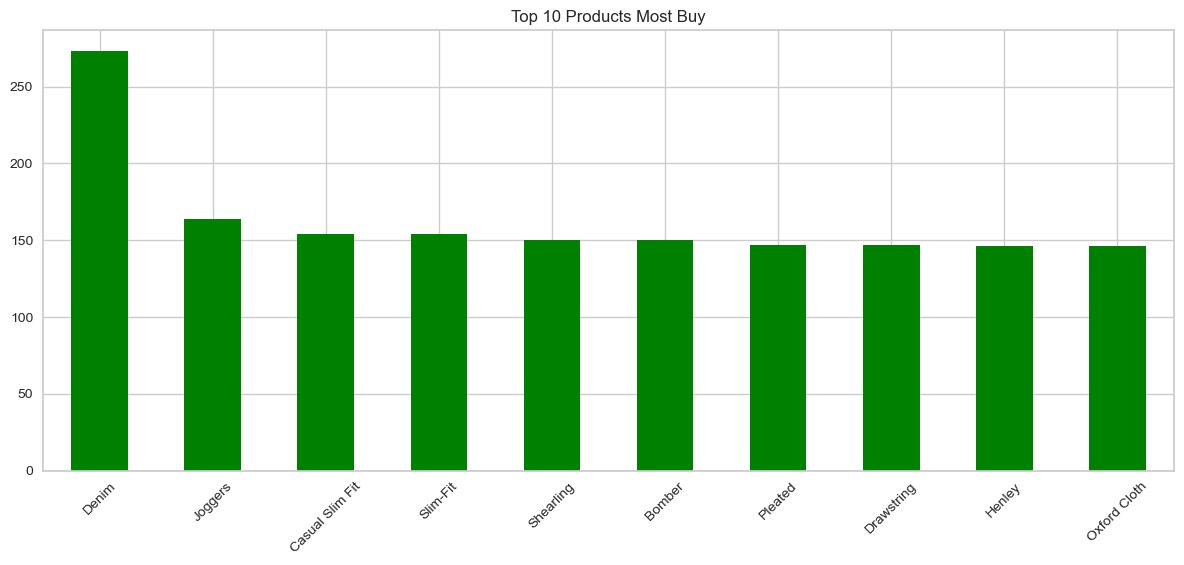

In [136]:
plt.figure(figsize=(12,6))
df['product_name'].value_counts().head(10).plot(kind='bar', title='Top 10 Products Most Buy', color='green')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# **Data Preparation 2**

<Axes: >

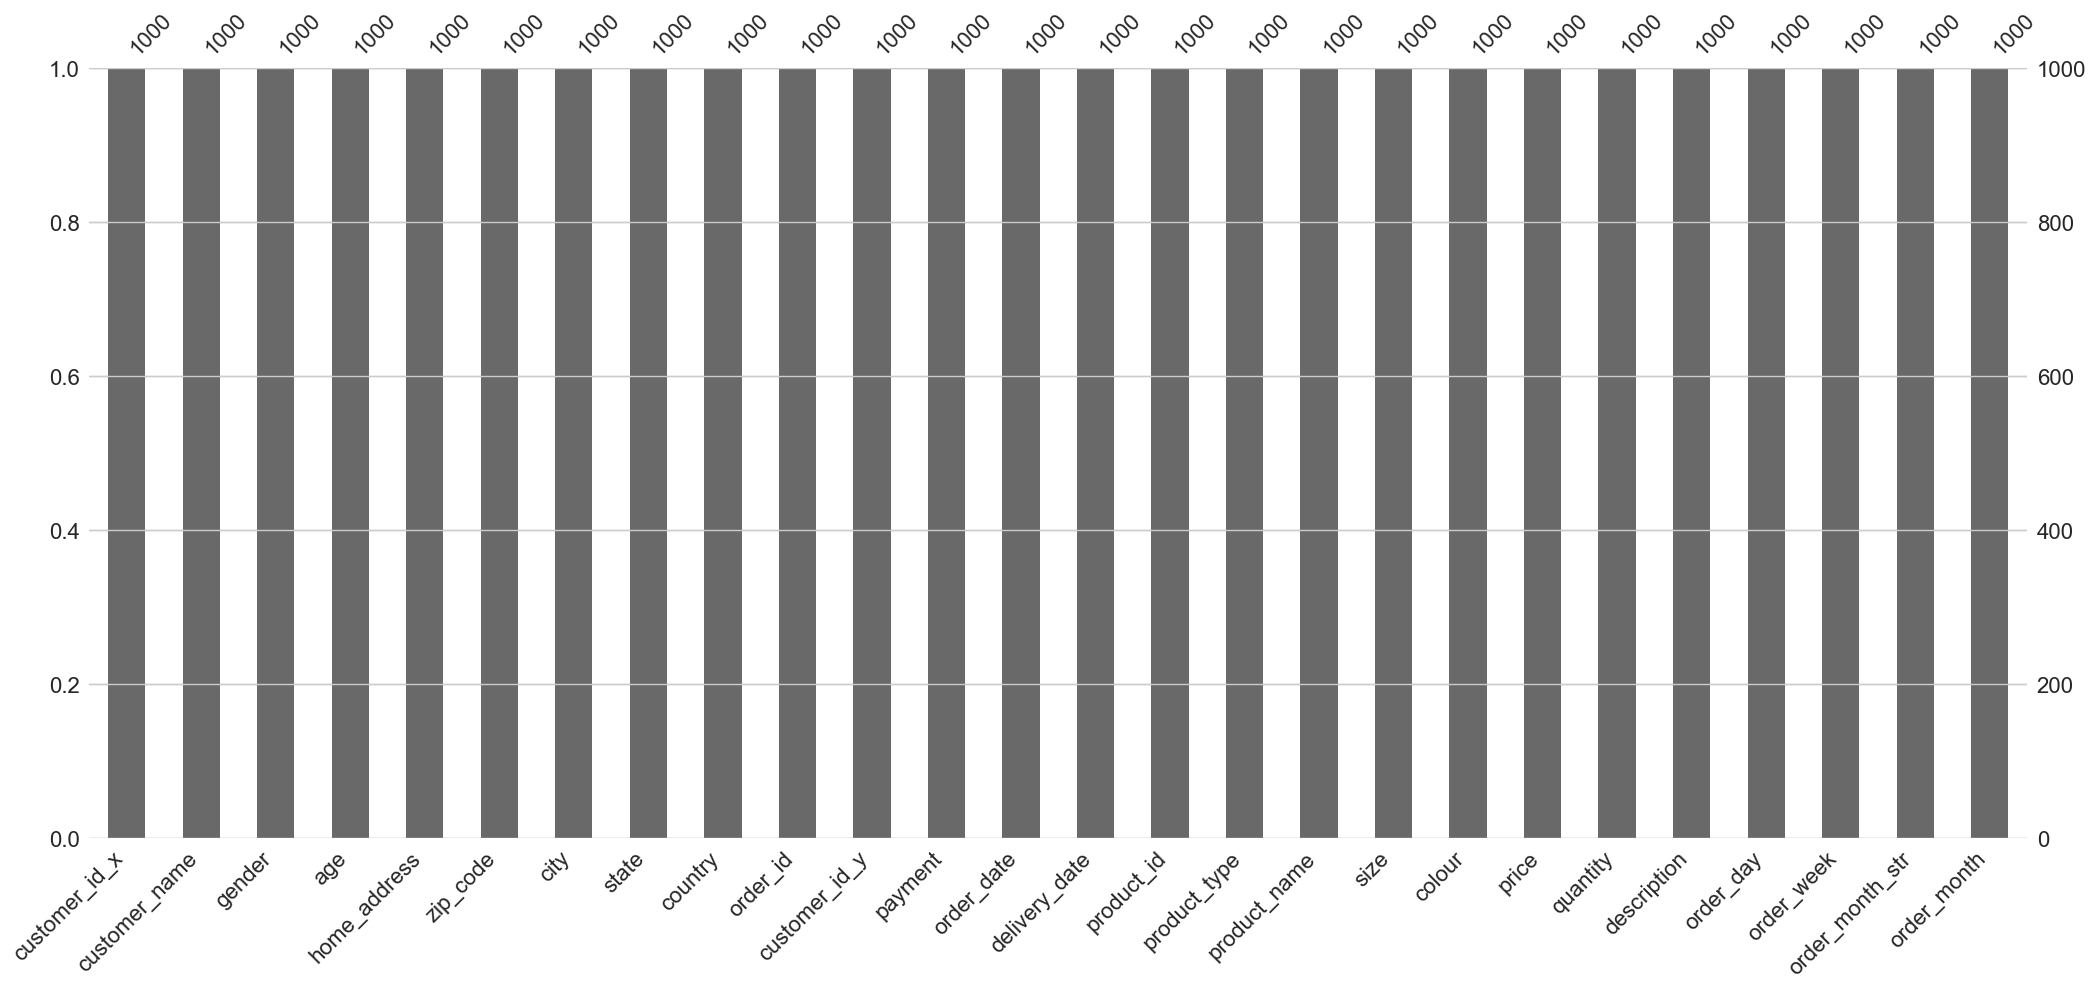

In [137]:
msno.bar(cop)

In [138]:
cop["sales"] = cop["price"] * cop["quantity"] # let's make a sales data
cop.head(2)

customer_id_x     customer_name      gender  age               home_address  zip_code  \
674            675  Elsi Strawbridge  Non-binary   20      56 Joel TrailApt. 139      2435   
28              29  Tyrus Pitkaithly        Male   20  52 Kayla CircuitSuite 332      5308   

                   city            state    country  order_id  customer_id_y  payment order_date  \
674          Port Jacob  South Australia  Australia       675            896    43080 2021-06-05   
28   North Matildamouth       Queensland  Australia        29            993    57645 2021-03-22   

    delivery_date  product_id product_type  product_name size  colour  price  quantity  \
674    2021-06-13         674       Jacket         Parka   XL  orange    119        68   
28     2021-03-28          28        Shirt  Oxford Cloth    L  indigo    114        70   

                                        description  order_day  order_week order_month_str  \
674       A orange coloured, XL sized, Parka Jacket          6          30         2021-07   
28   A indigo coloured, L sized, Oxford Cloth Shirt          2          15         2021-04   

    order_month  sales  
674     2021-07   8092  
28      2021-04   7980

In [139]:
# let's get the year data in order date column
cop['year_order'] = cop['order_date'].dt.year

# let's get the month data in order date column
cop['month_order'] = cop['order_date'].dt.month

# Let's get the day data in order date column
cop["day_order"] = cop["order_date"].dt.day

In [140]:
cop.head(2)

customer_id_x     customer_name      gender  age               home_address  zip_code  \
674            675  Elsi Strawbridge  Non-binary   20      56 Joel TrailApt. 139      2435   
28              29  Tyrus Pitkaithly        Male   20  52 Kayla CircuitSuite 332      5308   

                   city            state    country  order_id  customer_id_y  payment order_date  \
674          Port Jacob  South Australia  Australia       675            896    43080 2021-06-05   
28   North Matildamouth       Queensland  Australia        29            993    57645 2021-03-22   

    delivery_date  product_id product_type  product_name size  colour  price  quantity  \
674    2021-06-13         674       Jacket         Parka   XL  orange    119        68   
28     2021-03-28          28        Shirt  Oxford Cloth    L  indigo    114        70   

                                        description  order_day  order_week order_month_str  \
674       A orange coloured, XL sized, Parka Jacket          6          30         2021-07   
28   A indigo coloured, L sized, Oxford Cloth Shirt          2          15         2021-04   

    order_month  sales  year_order  month_order  day_order  
674     2021-07   8092        2021            6          5  
28      2021-04   7980        2021            3         22

In [141]:
# let's get the year data in delivery date column
cop['year_delivery'] = cop['delivery_date'].dt.year

# let's get the month data in delivery date column
cop['month_delivery'] = cop['delivery_date'].dt.month

# Let's get the day data in delivery date column
cop["day_delivery"] = cop["delivery_date"].dt.day

In [142]:
cop.head(2)

customer_id_x     customer_name      gender  age               home_address  zip_code  \
674            675  Elsi Strawbridge  Non-binary   20      56 Joel TrailApt. 139      2435   
28              29  Tyrus Pitkaithly        Male   20  52 Kayla CircuitSuite 332      5308   

                   city            state    country  order_id  customer_id_y  payment order_date  \
674          Port Jacob  South Australia  Australia       675            896    43080 2021-06-05   
28   North Matildamouth       Queensland  Australia        29            993    57645 2021-03-22   

    delivery_date  product_id product_type  product_name size  colour  price  quantity  \
674    2021-06-13         674       Jacket         Parka   XL  orange    119        68   
28     2021-03-28          28        Shirt  Oxford Cloth    L  indigo    114        70   

                                        description  order_day  order_week order_month_str  \
674       A orange coloured, XL sized, Parka Jacket          6          30         2021-07   
28   A indigo coloured, L sized, Oxford Cloth Shirt          2          15         2021-04   

    order_month  sales  year_order  month_order  day_order  year_delivery  month_delivery  \
674     2021-07   8092        2021            6          5           2021               6   
28      2021-04   7980        2021            3         22           2021               3   

     day_delivery  
674            13  
28             28

# **Data Analysis**

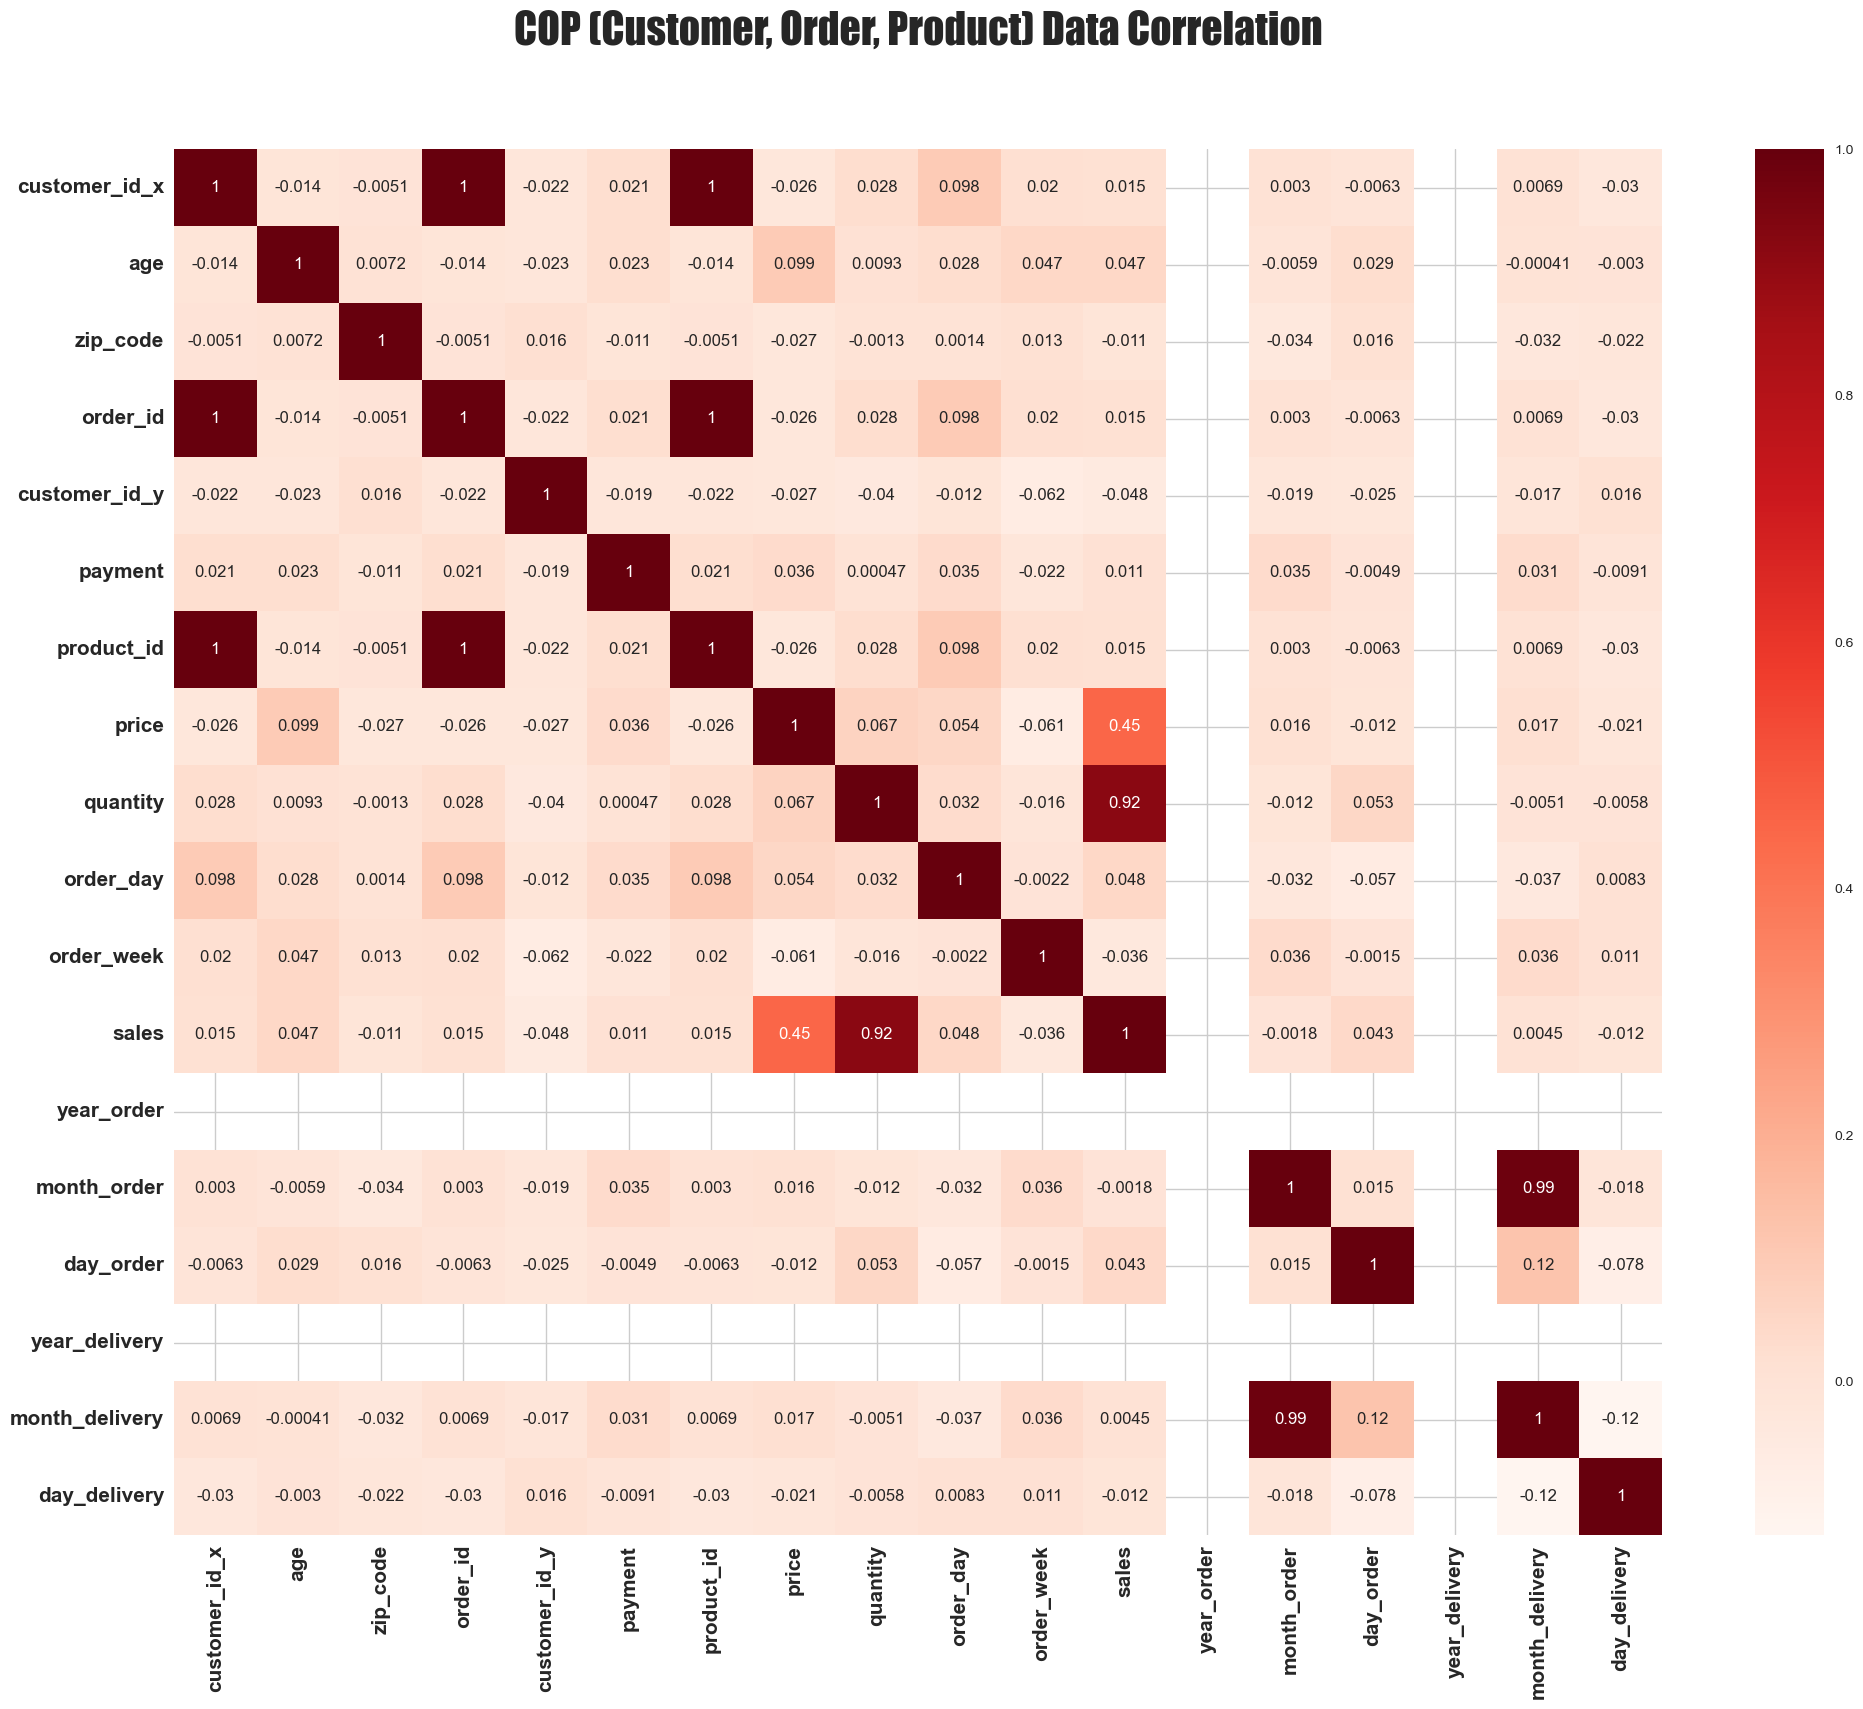

In [143]:
sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
fig = plt.figure(dpi=100, figsize=(24, 18)) # figure the size
sns.heatmap(cop.corr(), annot=True, cmap="Reds") # create a heatmap
plt.title("COP (Customer, Order, Product) Data Correlation", weight="bold", fontsize=30, fontname="fantasy", pad=75) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [144]:
# Let's see the correlation from `cop_data`
(cop.corr()["sales"] # transform it into data corr
         .sort_values(ascending=False) # sort values
         .to_frame() # change it into data frame
         .T) # transpose

sales  quantity  price  order_day   age  day_order  customer_id_x  order_id  product_id  \
sales  1.000     0.918  0.450      0.048 0.047      0.043          0.015     0.015       0.015   

       payment  month_delivery  month_order  zip_code  day_delivery  order_week  customer_id_y  \
sales    0.011           0.004       -0.002    -0.011        -0.012      -0.036         -0.048   

       year_order  year_delivery  
sales         NaN            NaN

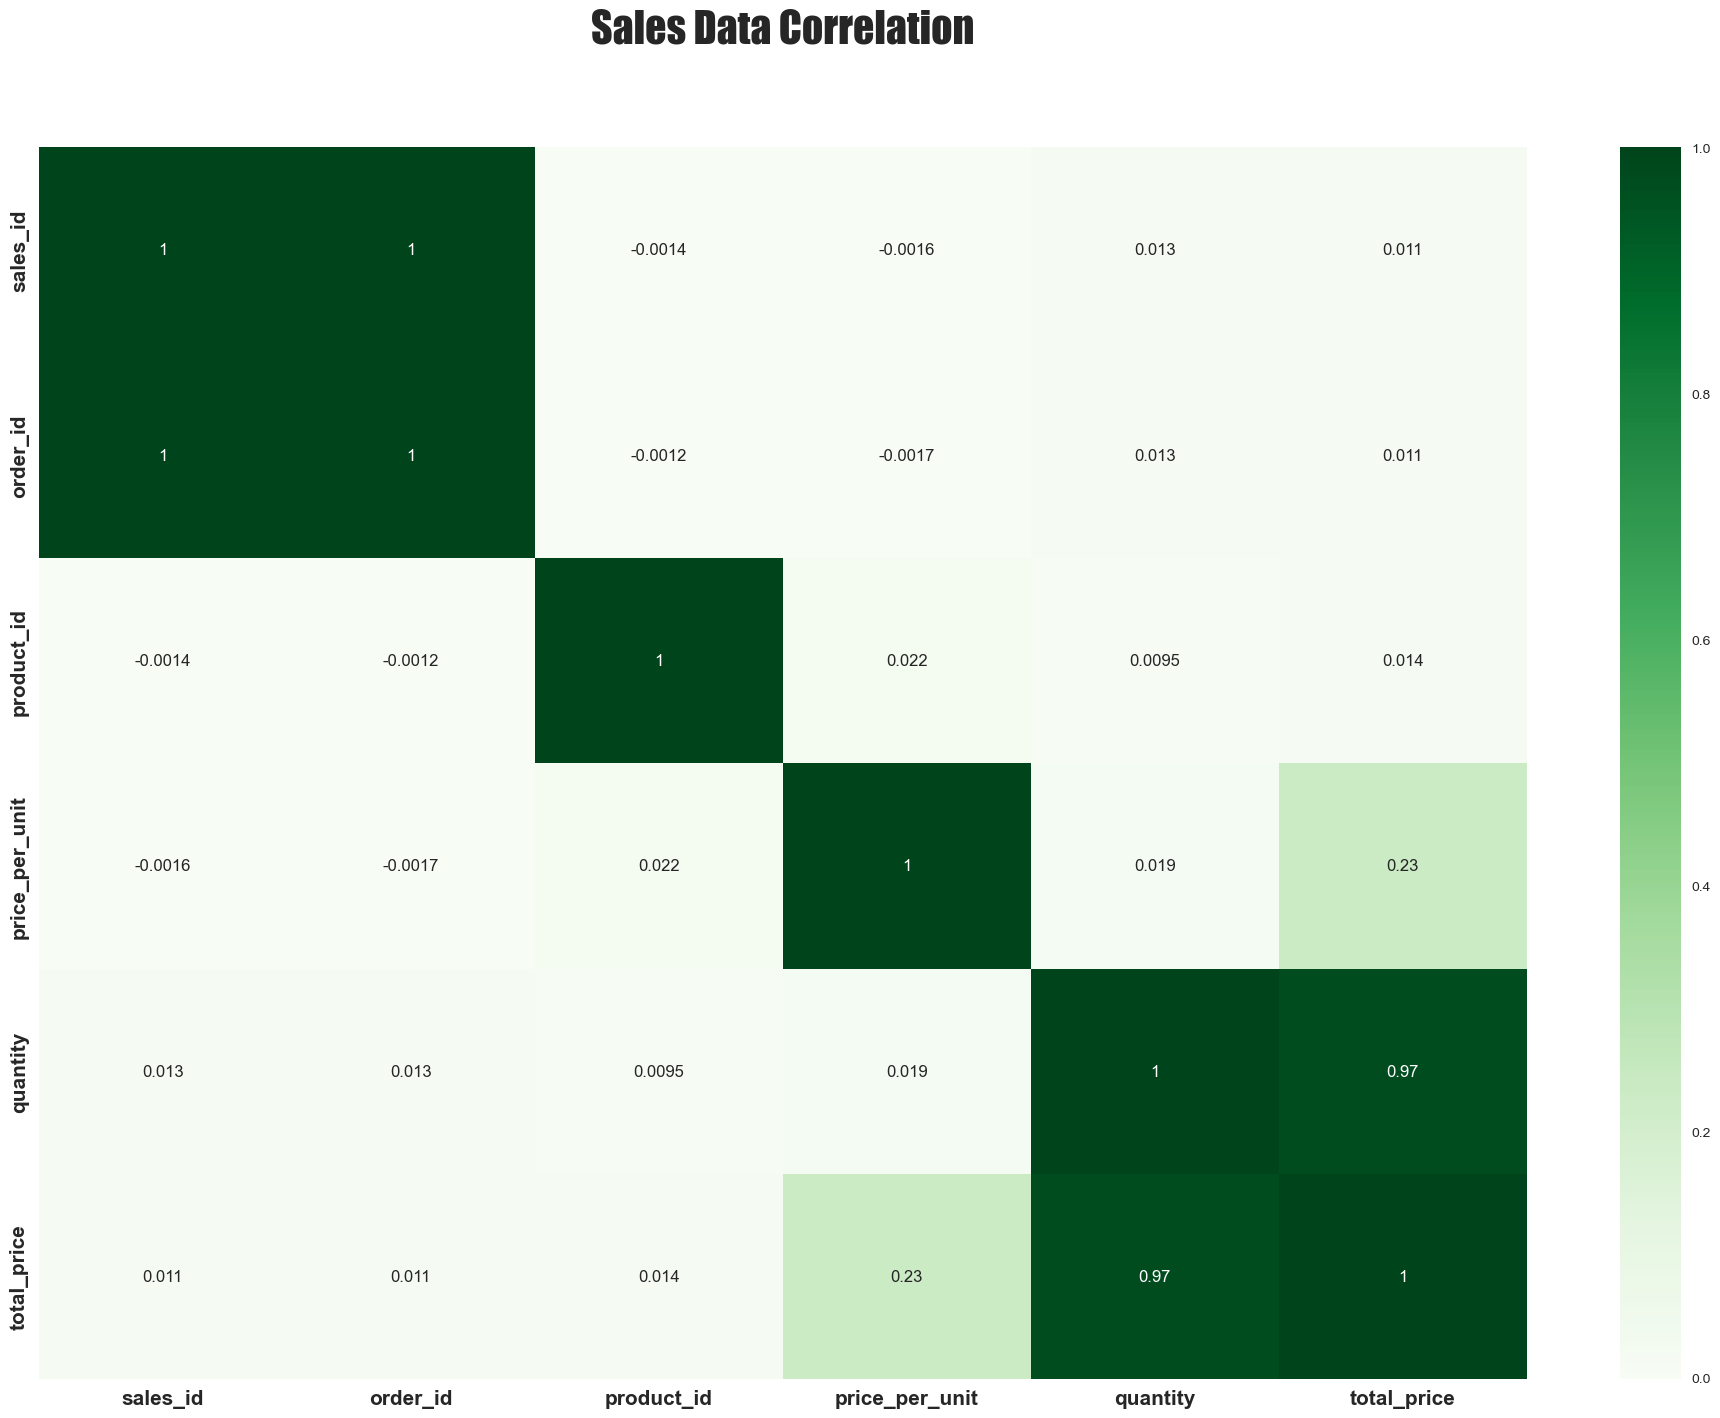

In [145]:
# let's make a correlation matrix for `sales`
fig = plt.figure(figsize=(24, 16)) # figure the size
sns.heatmap(sales_data.corr(), annot=True, cmap="Greens") # construct the heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=30, fontname="fantasy", pad=75) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [146]:
# Let's see the correlation
(sales_data.corr()["total_price"] # transform it into data corr
      .sort_values(ascending=False) # sort the values
      .to_frame() # change it into data frame
      .T) # transpose 

total_price  quantity  price_per_unit  product_id  order_id  sales_id
total_price        1.000     0.973           0.232       0.014     0.011     0.011

**Statistical Measure**

In [147]:
cop.describe(include=[np.number]) # Let's have a look to the discrete and continuous data first

customer_id_x      age  zip_code  order_id  customer_id_y   payment  product_id    price  \
count       1000.000 1000.000  1000.000  1000.000       1000.000  1000.000    1000.000 1000.000   
mean         500.500   49.860  5004.872   500.500        506.640 33972.936     499.500  108.095   
std          288.819   17.648  2884.497   288.819        277.116 14451.609     288.819    9.158   
min            1.000   20.000     2.000     1.000          1.000 10043.000       0.000   90.000   
25%          250.750   34.000  2401.750   250.750        275.250 21329.250     249.750  102.000   
50%          500.500   50.000  5083.000   500.500        515.000 33697.500     499.500  112.000   
75%          750.250   65.000  7460.250   750.250        737.250 46249.000     749.250  115.000   
max         1000.000   80.000  9998.000  1000.000       1000.000 59910.000     999.000  119.000   

       quantity  order_day  order_week    sales  year_order  month_order  day_order  \
count  1000.000   1000.000    1000.000 1000.000    1000.000     1000.000   1000.000   
mean     60.371      3.248      21.169 6532.937    2021.000        5.376     15.562   
std      11.607      2.038      12.237 1408.645       0.000        2.848      8.615   
min      40.000      0.000       0.000 3690.000    2021.000        1.000      1.000   
25%      50.000      2.000      11.000 5405.000    2021.000        3.000      8.000   
50%      61.000      3.000      21.000 6454.000    2021.000        5.000     16.000   
75%      70.000      5.000      31.000 7656.750    2021.000        8.000     23.000   
max      80.000      6.000      43.000 9520.000    2021.000       10.000     31.000   

       year_delivery  month_delivery  day_delivery  
count       1000.000        1000.000      1000.000  
mean        2021.000           5.841        15.508  
std            0.000           2.908         8.637  
min         2021.000           1.000         1.000  
25%         2021.000           3.000         8.000  
50%         2021.000           6.000        15.000  
75%         2021.000           8.000        23.000  
max         2021.000          11.000        31.000

In [148]:
df.describe(include=[np.number]) # Let's have a look to the discrete and continuous data first

customer_id      age  zip_code  order_id   payment  sales_id  product_id  price_per_unit  \
count     5000.000 5000.000  5000.000  5000.000  5000.000  5000.000    5000.000        5000.000   
mean       504.563   48.760  4912.356   503.038 33976.785  2499.500     634.053         103.502   
std        276.505   17.578  2907.368   285.964 14612.707  1443.520     363.256           9.195   
min          1.000   20.000    52.000     1.000 10043.000     0.000       1.000          90.000   
25%        276.000   34.000  2273.000   258.000 20627.000  1249.750     323.000          95.000   
50%        509.000   48.000  4750.000   504.500 34259.000  2499.500     635.000         102.000   
75%        733.000   63.000  7460.250   749.000 46608.000  3749.250     951.000         112.000   
max       1000.000   80.000  9998.000   999.000 59910.000  4999.000    1259.000         119.000   

       quantity  total_price    price    stock  order_day  order_week  
count  5000.000     5000.000 5000.000 5000.000   5000.000    5000.000  
mean      1.992      206.360  105.665   60.083      3.093      20.964  
std       0.808       86.357    9.736   11.683      2.029      12.394  
min       1.000       90.000   90.000   40.000      0.000       0.000  
25%       1.000      112.000   95.000   50.000      1.000      10.000  
50%       2.000      204.000  108.000   60.000      3.000      21.000  
75%       3.000      285.000  114.000   70.000      5.000      32.000  
max       3.000      357.000  119.000   80.000      6.000      43.000

In [149]:
cop.describe(exclude=[np.number]) # Let's have a look to categorical data

customer_name gender           home_address         city            state    country  \
count               1000   1000                   1000         1000             1000       1000   
unique              1000      8                   1000          961                8          1   
top     Elsi Strawbridge   Male  56 Joel TrailApt. 139  East Sophia  South Australia  Australia   
freq                   1    143                      1            3              139       1000   
first                NaN    NaN                    NaN          NaN              NaN        NaN   
last                 NaN    NaN                    NaN          NaN              NaN        NaN   

                 order_date        delivery_date product_type product_name  size  colour  \
count                  1000                 1000         1000         1000  1000    1000   
unique                  291                  305            3           28     5       7   
top     2021-06-20 00:00:00  2021-08-09 00:00:00       Jacket        Denim    XL  orange   
freq                     10                    9          420           70   200     145   
first   2021-01-01 00:00:00  2021-01-03 00:00:00          NaN          NaN   NaN     NaN   
last    2021-10-24 00:00:00  2021-11-20 00:00:00          NaN          NaN   NaN     NaN   

                                      description order_month_str order_month  
count                                        1000            1000        1000  
unique                                       1000              10          10  
top     A orange coloured, XL sized, Parka Jacket         2021-03     2021-03  
freq                                            1             132         132  
first                                         NaN             NaN         NaN  
last                                          NaN             NaN         NaN

In [150]:
df.describe(exclude=[np.number]) # Let's have a look to categorical data

customer_name  gender              home_address        city            state    country  \
count             5000    5000                      5000        5000             5000       5000   
unique             616       8                       616         604                8          1   
top     Kristofor Roos  Female  5567 Clarke MallApt. 756  Jordanside  South Australia  Australia   
freq                37     712                        37          37              718       5000   
first              NaN     NaN                       NaN         NaN              NaN        NaN   
last               NaN     NaN                       NaN         NaN              NaN        NaN   

                 order_date        delivery_date product_type product_name  size colour  \
count                  5000                 5000         5000         5000  5000   5000   
unique                  291                  304            3           35     5      7   
top     2021-06-21 00:00:00  2021-09-12 00:00:00     Trousers        Denim     M   blue   
freq                     51                   49         1683          273  1022    762   
first   2021-01-01 00:00:00  2021-01-03 00:00:00          NaN          NaN   NaN    NaN   
last    2021-10-24 00:00:00  2021-11-20 00:00:00          NaN          NaN   NaN    NaN   

                                      description order_month_str order_month   cohort  \
count                                        5000            5000        5000     5000   
unique                                       1233              10          10       10   
top     A orange coloured, L sized, Flannel Shirt         2021-03     2021-03  2021-01   
freq                                           13             635         635     1123   
first                                         NaN             NaN         NaN      NaN   
last                                          NaN             NaN         NaN      NaN   

              age_category  
count                 4270  
unique                   3  
top     Middle-Aged Adults  
freq                  1671  
first                  NaN  
last                   NaN

In [151]:
try:
    sales_data.describe(exclude=[np.number]) # Let's see on sales data
except ValueError as error:
    print(error)

No objects to concatenate


**Univariate Analysis**

SALES

In [152]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

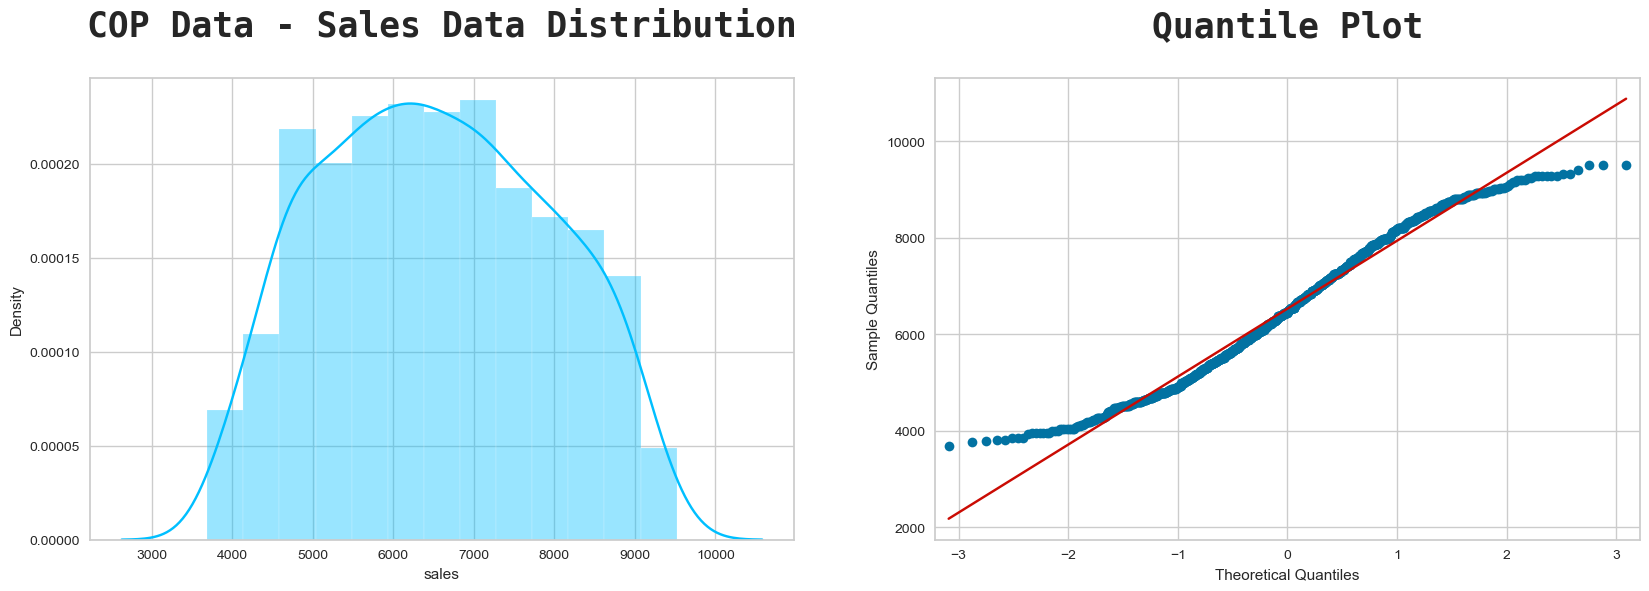

In [153]:
# Sales Data
univariate_analysis( # call the function
    data=cop['sales'], # put the data
    color='deepskyblue', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [154]:
round(cop.sales.mean())
round(np.std(cop.sales, ddof=1))

6533

1409

AGE

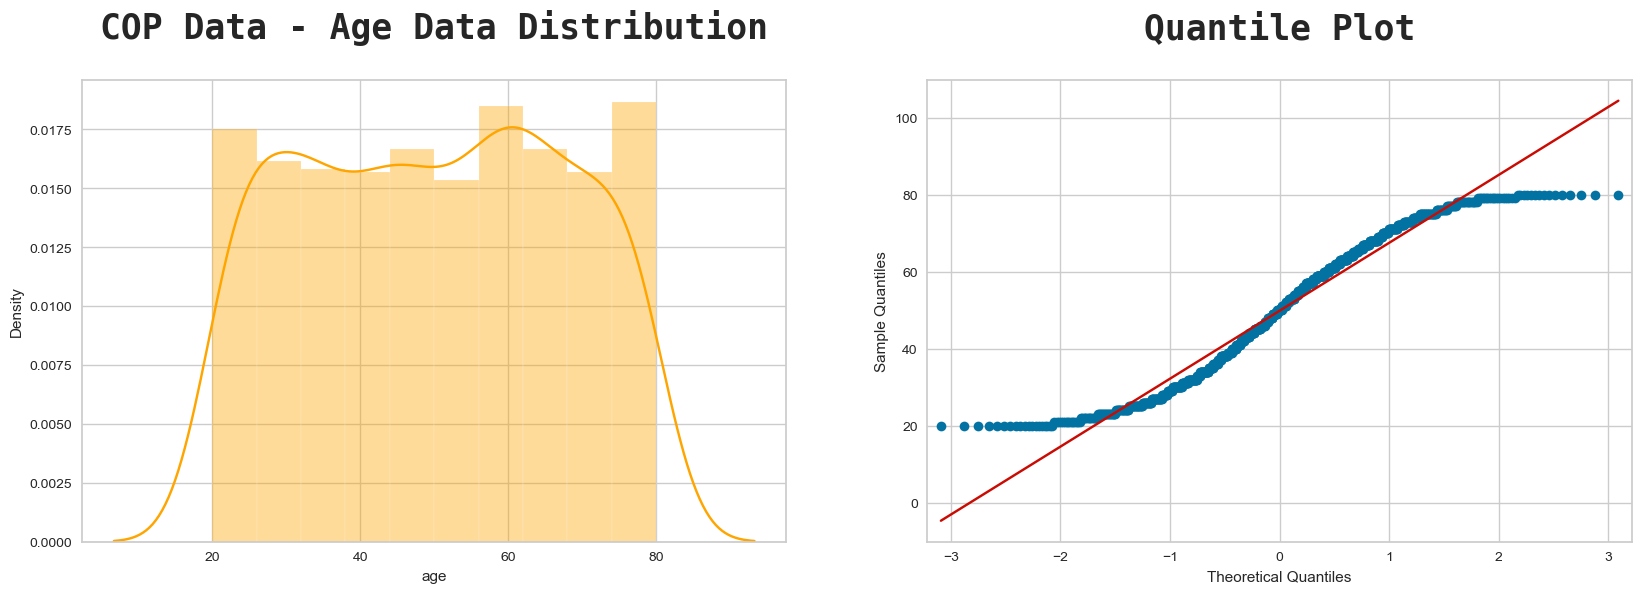

In [155]:
# Age Data
univariate_analysis( # call the function
    data=cop['age'], # put the data
    color='orange', # pick the color
    title1='COP Data - Age Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [156]:
round(cop.age.mean())
round(np.std(cop.age, ddof=1))

50

18

PRICE

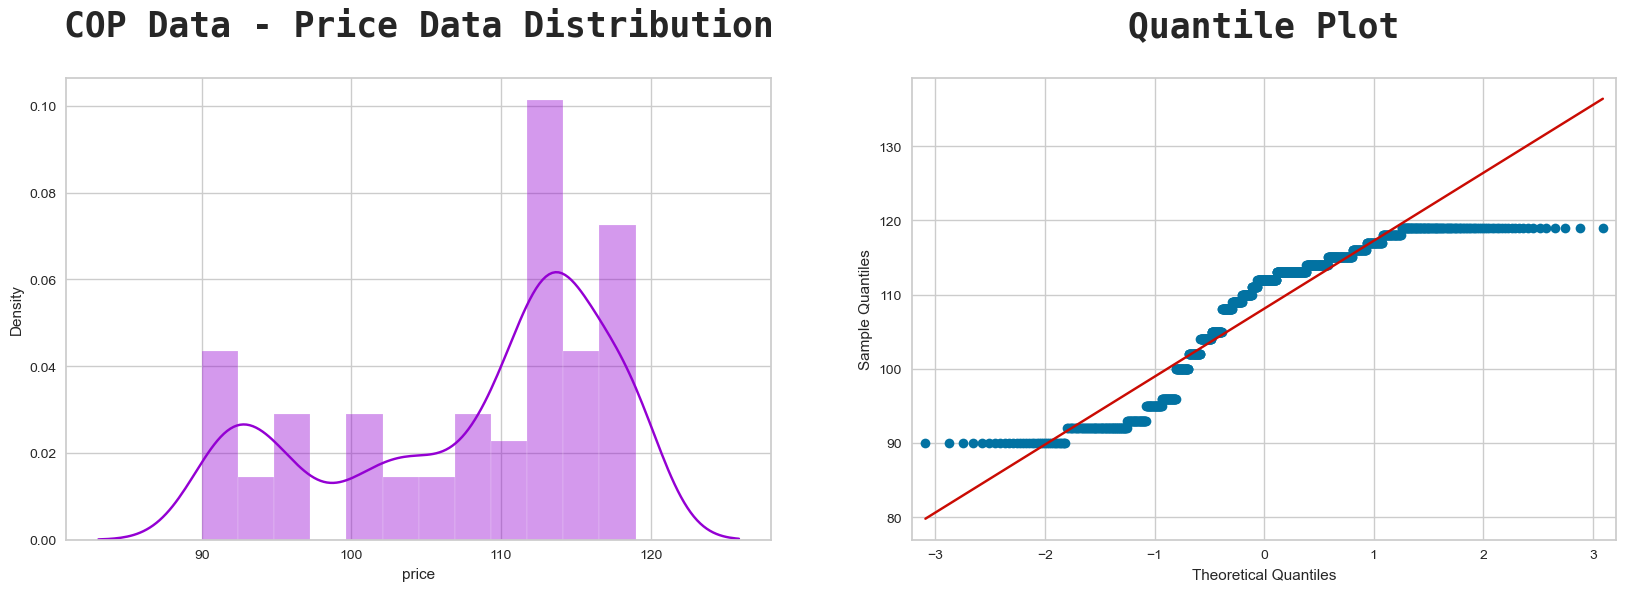

In [157]:
# Price Data
univariate_analysis( # call the function
    data=cop['price'], # put the data
    color='darkviolet', # pick the color
    title1='COP Data - Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [158]:
round(cop.price.mean())
round(np.std(cop.price, ddof=1))

108

9

QUANTITY

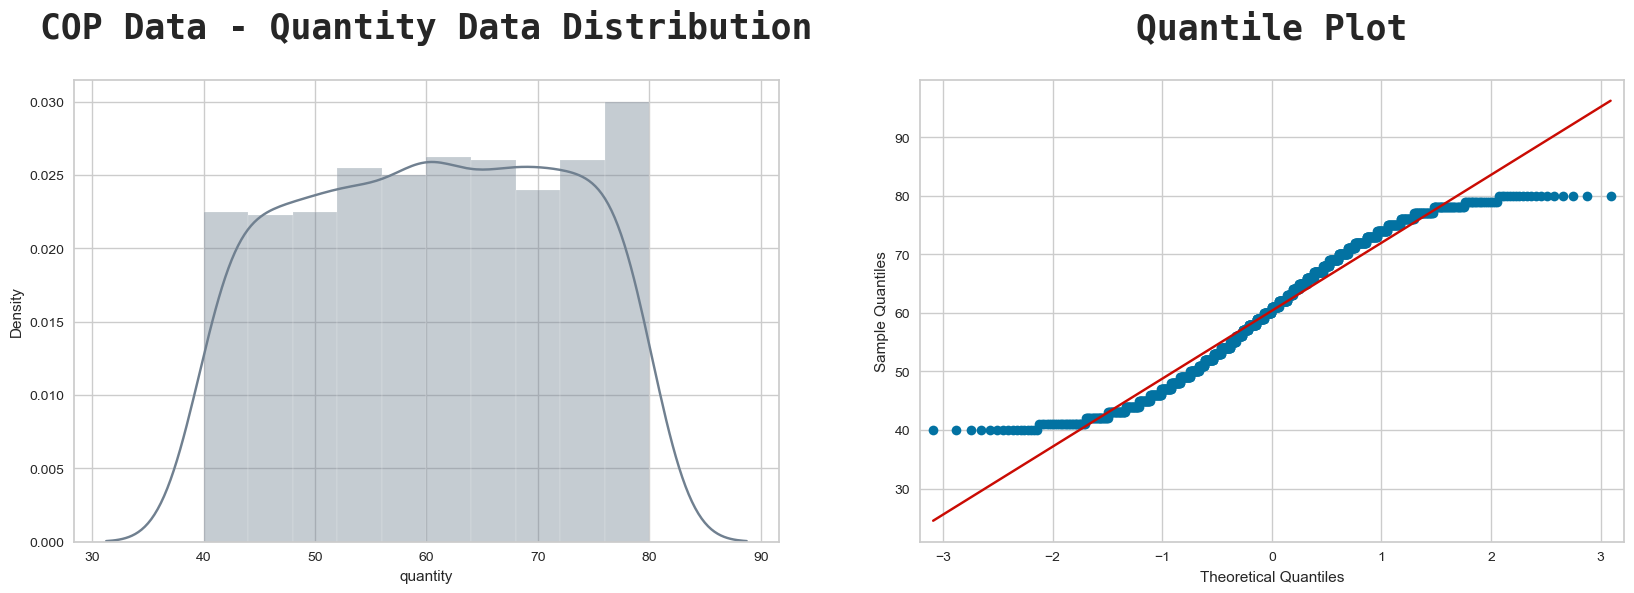

In [159]:
# Quantity Data
univariate_analysis( # call the function
    data=cop['quantity'], # put the data
    color='slategrey', # pick the color
    title1='COP Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [160]:
round(cop.quantity.mean())
round(np.std(cop.quantity, ddof=1))

60

12

**checking skewness value**

In [161]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = cop.skew().sort_values(ascending=False).to_frame().head()
skew_value

0
sales        0.085
order_week   0.075
day_delivery 0.060
payment      0.059
day_order    0.045

Total Price Data

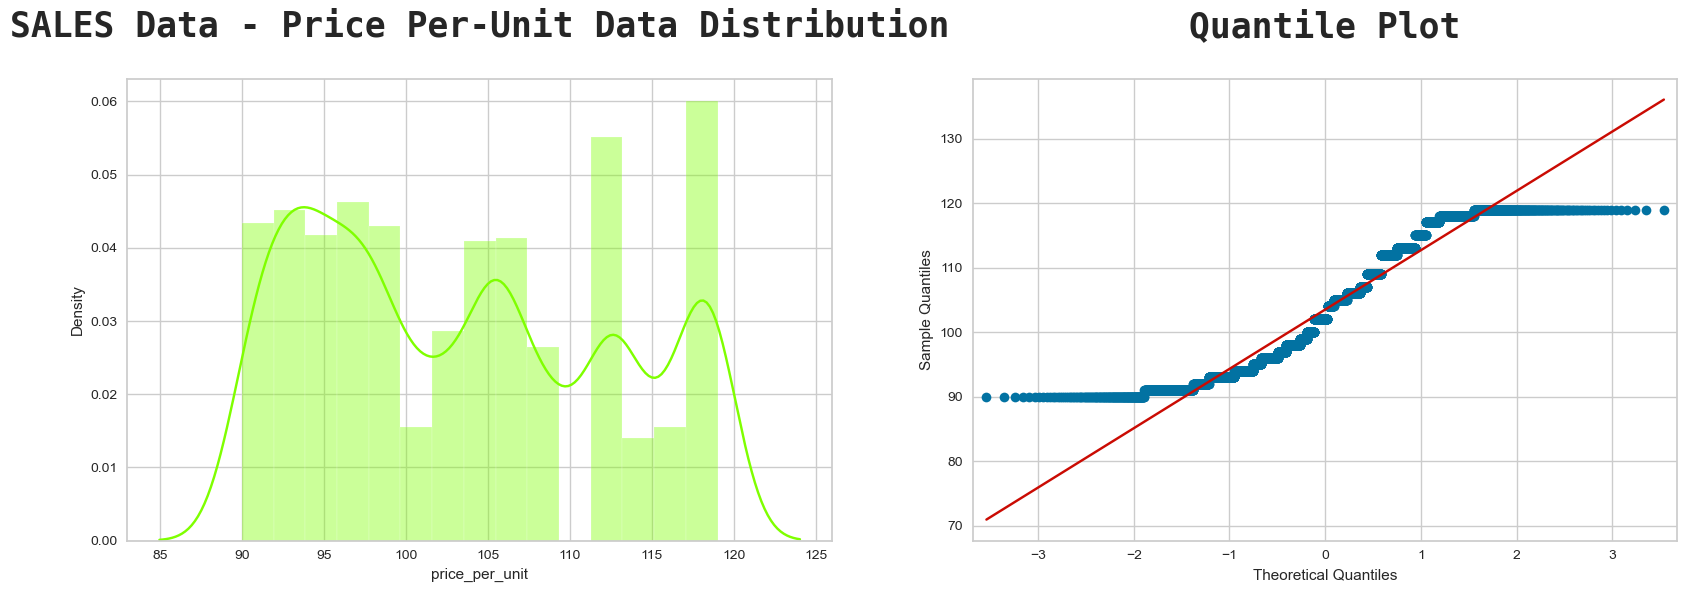

In [162]:
# Total Price Data
univariate_analysis( # call the function
    data=sales_data['price_per_unit'], # put the data
    color='chartreuse', # pick the color
    title1='SALES Data - Price Per-Unit Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [163]:
round(sales_data.price_per_unit.mean())
round(np.std(sales_data.price_per_unit, ddof=1))

104

9

PRICE

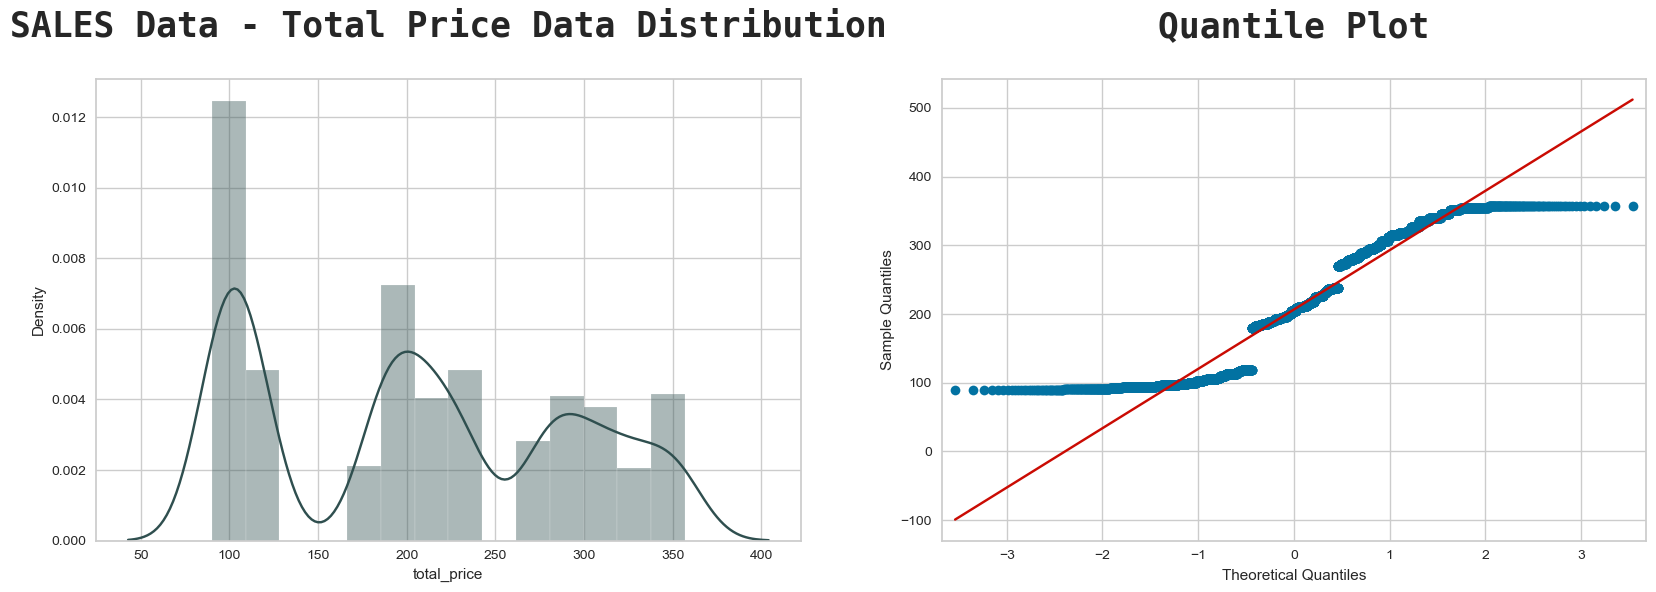

In [164]:
# Price Data
univariate_analysis( # call the function
    data=sales_data['total_price'], # put the data
    color='darkslategray', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [165]:
round(sales_data.total_price.mean())
round(np.std(sales_data.total_price, ddof=1))

206

86

Price per-unit

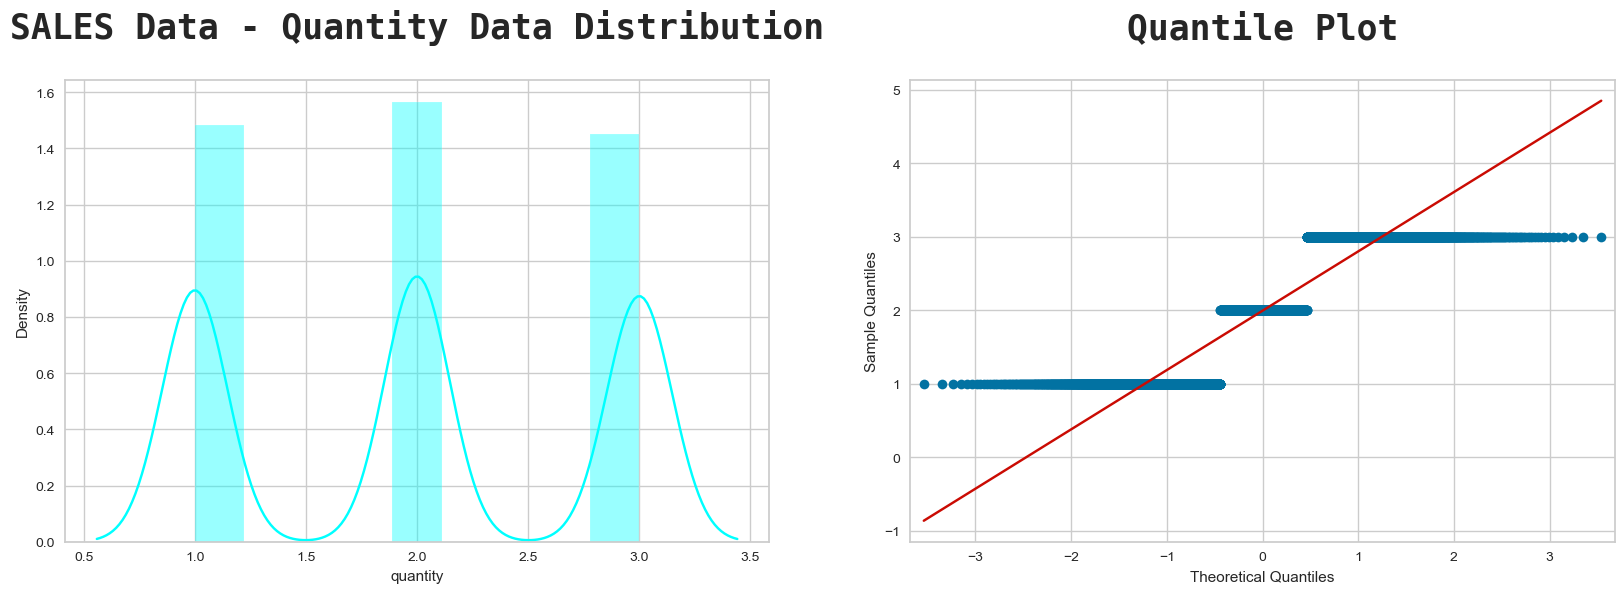

In [166]:
# Price per-unit Data
univariate_analysis( # call the function
    data=sales_data['quantity'], # put the data
    color='aqua', # pick the color
    title1='SALES Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [167]:
round(sales_data.quantity.mean())
round(np.std(sales_data.quantity, ddof=1))

2

1

**checking skewness value**

In [168]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales_data.skew().sort_values(ascending=False).to_frame().head()
skew_value

0
price_per_unit  0.256
total_price     0.137
quantity        0.014
sales_id        0.000
order_id       -0.004

# **Which products were sold the most in the last month?**

In [169]:
(cop.groupby(["month_order", "product_type", "product_name"])["sales"] # groupping
        .sum() # sum
        .astype("int") # change the type 
        .sort_values(ascending=False) # sort the values
        .to_frame() # change it into data frame
        .head(17) # look the first 17 rows
        .T) # Transpose

month_order       4        8      2        9         1       6      1       9       1      6  \
product_type  Shirt   Jacket  Shirt Trousers    Jacket   Shirt  Shirt  Jacket  Jacket  Shirt   
product_name  Denim Cardigan  Dress   Chinos Shearling Flannel   Polo Leather Leather  Linen   
sales         63480    54044  52241    50500     49495   49152  47970   47573   47121  46516   

month_order       3          7        1      6        7                        8  
product_type Jacket   Trousers Trousers Jacket    Shirt   Jacket           Shirt  
product_name  Parka Drawstring    Cords Puffer Chambray Pullover Mandarin Collar  
sales         45696      45136    45087  43670    42945    42750           42660

In [170]:
cop.groupby(["month_order"]).sum().astype("int")

customer_id_x   age  zip_code  order_id  customer_id_y  payment  product_id  price  \
month_order                                                                                       
1                    57468  5587    570404     57468          56820  3520014       57359  11854   
2                    44574  4753    442889     44574          45468  3190783       44480  10092   
3                    59867  5614    587578     59867          67827  4129045       59749  12578   
4                    49127  5316    558052     49127          49590  3233260       49026  10924   
5                    40030  4120    424249     40030          41130  3028007       39946   9163   
6                    49659  5020    502264     49659          47417  3351443       49556  11117   
7                    55797  5036    533725     55797          52531  3588328       55692  11526   
8                    54891  5402    532053     54891          52041  3822263       54784  11535   
9                    48217  4758    489817     48217          53321  3173182       48119  10484   
10                   40870  4254    363841     40870          40495  2936611       40789   8822   

             quantity  order_day  order_week   sales  year_order  day_order  year_delivery  \
month_order                                                                                  
1                6698        335        2049  727160      220289       1673         220289   
2                5680        309        1960  611133      189974       1255         189974   
3                7119        389        2491  759620      238478       1948         238478   
4                6030        363        2369  653023      204121       1591         204121   
5                5065        273        1887  552995      169764       1280         169764   
6                6089        349        2044  658699      208163       1765         208163   
7                6432        347        2217  706053      212205       1580         212205   
8                6387        361        2225  688716      216247       1753         216247   
9                6063        291        2153  651023      198058       1616         198058   
10               4808        231        1774  524515      163701       1101         163701   

             month_delivery  day_delivery  
month_order                                
1                       155          1792  
2                       230          1328  
3                       410          1925  
4                       453          1457  
5                       447          1532  
6                       675          1521  
7                       781          1645  
8                       913          1494  
9                       933          1503  
10                      844          1311

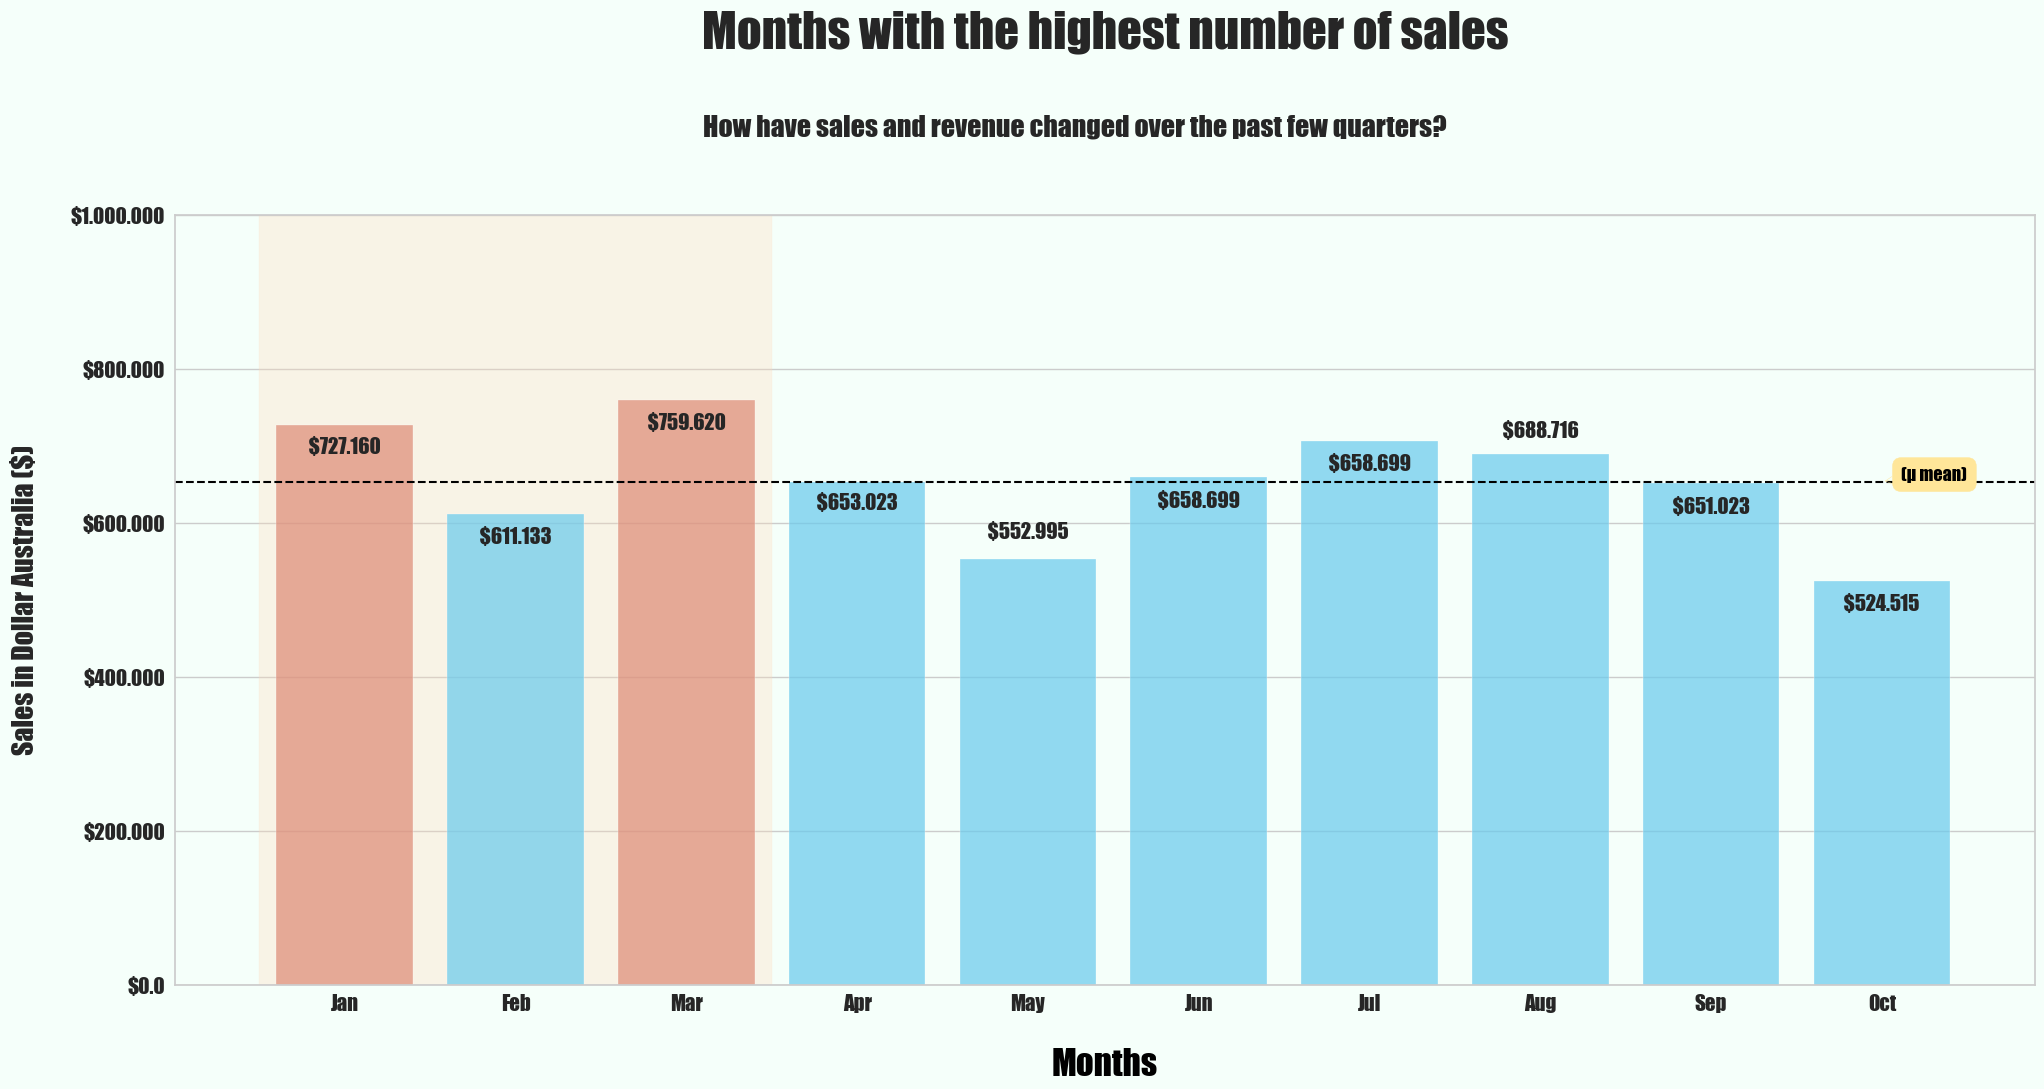

In [171]:
# set-up
color_map = ["#5FCDF5" for _ in range(20)]
color_map[0] = "#E3866F"
color_map[2] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [-0.5, 2.5]

# group the Month cols
sum_month_order = cop.groupby(["month_order"]).sum().astype("int")

# let's plot it
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 10), 
    facecolor="mintcream")

# makes bar plot 
sns.barplot(
    x=sum_month_order.index,
    y=sum_month_order["sales"], 
    data=sum_month_order,
    zorder=2,
    palette=color_map,
    saturation=.9,
    alpha=.7,
    ax=ax) 

# title 
ax.set_title(
    "Months with the highest number of sales", 
    fontname="fantasy", 
    weight="bold", 
    fontsize=35, 
    pad=120)

plt.suptitle(
    "How have sales and revenue changed over the past few quarters?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel( 
    "Months", 
    weight="bold", 
    color="black",
    family="fantasy",
    fontsize=25, 
    loc="center",
    labelpad=25)
ax.set_ylabel(
    "Sales in Dollar Australia ($)", 
    weight="bold", 
    family="fantasy",
    fontsize=20,
    labelpad=25)

# ticklabels
ax.set_xticklabels( 
    labels=["Jan", "Feb", "Mar", "Apr", "May", 
            "Jun", "Jul", "Aug", "Sep", "Oct"],
    weight="bold", 
    family="fantasy",
    fontsize=15)
ax.set_yticklabels( 
    labels=["$0.0", "$200.000", "$400.000", 
            "$600.000", "$800.000", "$1.000.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# y-limit
ax.set_ylim(0, 1000000)

# face-color
ax.set_facecolor("mintcream")

# text 
ax.text(0, 765000-66000, " $727.160 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(1, 648500-66000, " $611.133 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(2, 797200-66000, " $759.620 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(3, 693000-66000, " $653.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(4, 589000, " $552.995 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(5, 696000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(6, 743000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(7, 719900, " $688.716 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(8, 688000-66000, " $651.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(9, 562000-66000, " $524.515 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

# annotate
ax.annotate("(μ mean)", xy=(9, sum_month_order["sales"].mean()), 
             xytext=(9.5, sum_month_order["sales"].mean() + 9000),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(
    span_range[0], 
    span_range[1], 
    color="peachpuff", 
    alpha=0.3)

# axh-line
ax.axhline(
    y=sum_month_order["sales"].mean(), 
    color="black", 
    ls="--", 
    lw=1.5);

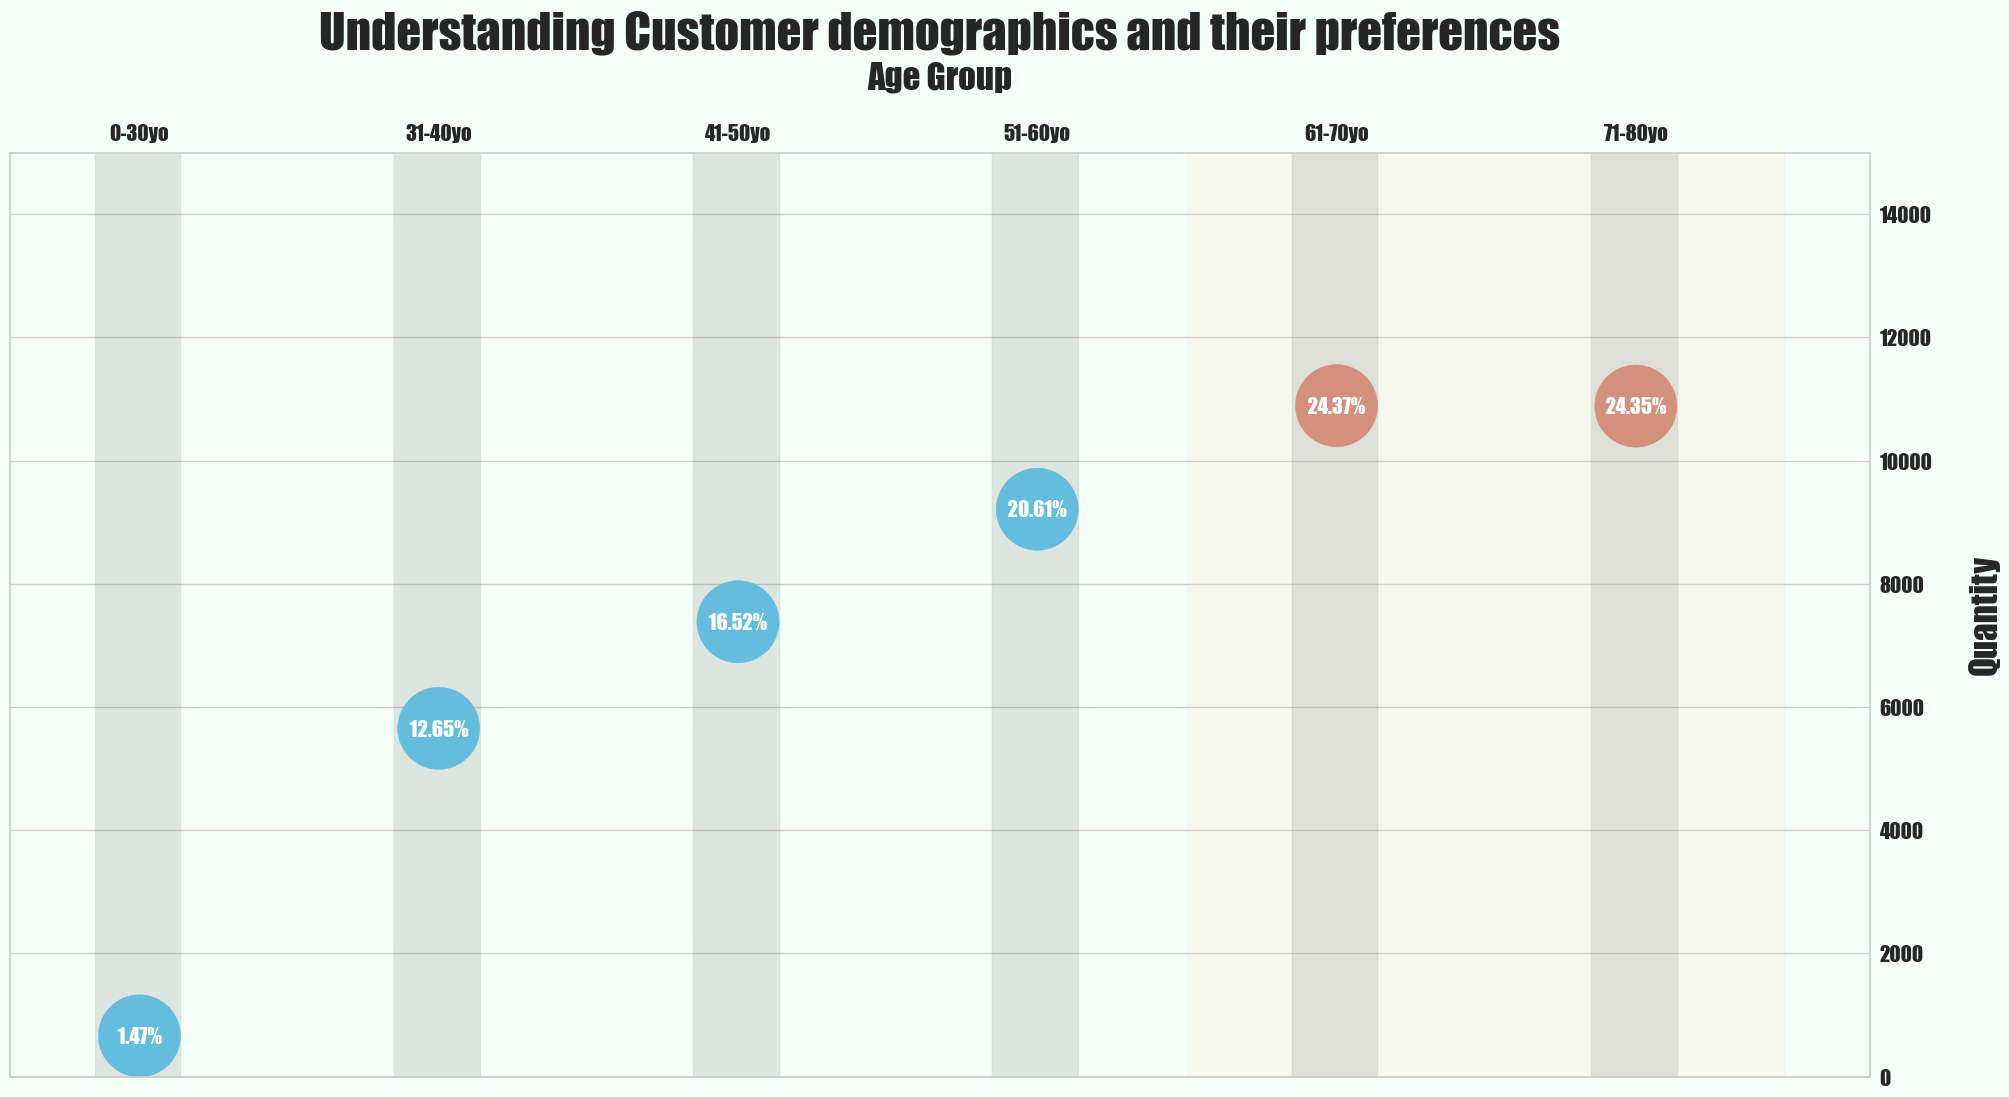

In [172]:
### set-up
labels = ["0-30yo", "31-40yo", "41-50yo", "51-60yo", "61-70yo", "71-80yo"]
bins= [30, 31, 41, 51, 61, 71, 80]
cop["age_group"] = pd.cut(cop["age"], bins=bins, labels=labels, right=False)
sum_total_age = [660,  5652,  7382,  9209, 10890, 10883]
sum_age_group = pd.DataFrame({"age": labels, "sum_total_age": sum_total_age})
color_map = ["#5FCDF5" for _ in range(6)]
color_map[5] = "#E3866F"
color_map[4] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [3.5, 5.5]
span_range2 = [[-0.15, 0.14], 
               [0.85, 1.14], 
               [1.85, 2.14], 
               [2.85, 3.14], 
               [3.85, 4.14], 
               [4.85, 5.14]]

# subplots
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 12), 
    facecolor=("mintcream"))

# countplot
ax.scatter(
    sum_age_group["age"], 
    sum_age_group["sum_total_age"], 
    color=color_map,
    s=3500,
    zorder=1)

# title
ax.set_title(
    "Understanding Customer demographics and their preferences", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=75)

# axv-span
ax.axvspan(span_range[0], span_range[1], color="peachpuff", alpha=0.2)
ax.axvspan(span_range2[0][0], span_range2[0][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[1][0], span_range2[1][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[2][0], span_range2[2][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[3][0], span_range2[3][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[4][0], span_range2[4][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[5][0], span_range2[5][1], color="gray", alpha=0.2)

# labels
ax.set_xlabel(
    "Age Group", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)
ax.set_ylabel(
    "Quantity", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=labels, 
    weight="bold", 
    fontsize=15,
    family="fantasy")
ax.set_yticklabels(
    labels=list(np.arange(0, 16000, 2000)), 
    weight="bold", 
    fontsize=15,
    family="fantasy")

# text
ax.text(0, 660, " 1.47% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(1, 5652, " 12.65% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(2, 7382, " 16.52% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(3, 9209, " 20.61% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(4, 10890, " 24.37% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(5, 10883, " 24.35% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

# adjust ticks
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# y-limit
ax.set_ylim(0, 15000)

ax.grid(False, which="major", axis="x")

# face-color
ax.set_facecolor("mintcream");

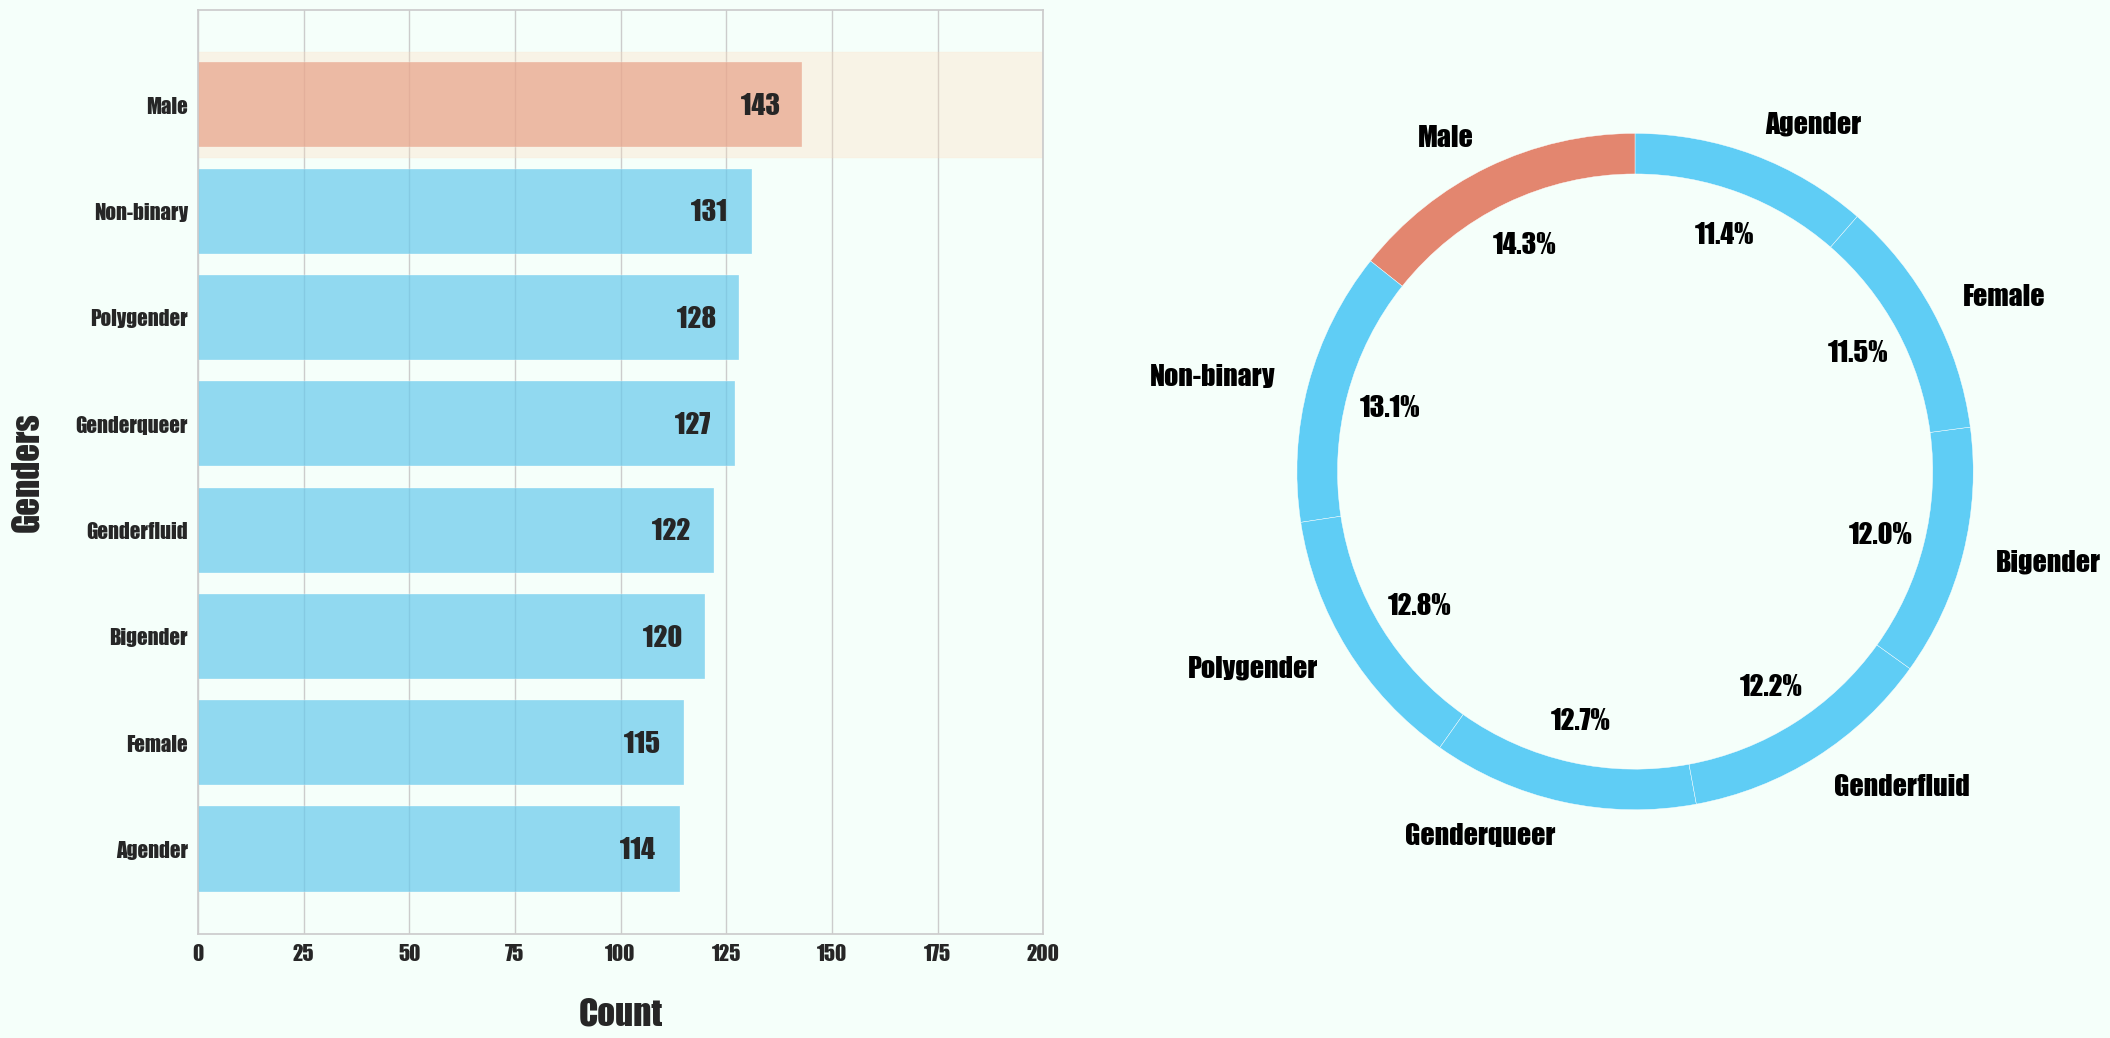

In [173]:
# set-up
color_map = ["#5FCDF5" for _ in range(20)]
color_map[0] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [-0.5, .5]

# Subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    nrows=1, 
    facecolor=("mintcream"),
    figsize=(24, 12) 
)

# barplot
sns.barplot( 
    x=cop["gender"].value_counts().values, 
    y=cop["gender"].value_counts().index,
    saturation=.9,
    alpha=.7,
    ax=ax1)

# prepare data for Pie Plots
cop_pie = {"gender": ["Male", "Non-binary", "Polygender", "Genderqueer", "Genderfluid", "Bigender", "Female", "Agender"], 
           "count": [143, 131, 128, 127, 122, 120, 115, 114]} 

# convert into dataframe
cop_pie = pd.DataFrame(cop_pie)

# make a pie plot
cop_pie.plot(  
    kind="pie", 
    y="count",
    labels=cop_pie["gender"], 
    autopct='%1.1f%%',
    startangle=90, 
    legend=False, 
    wedgeprops=dict(width=0.12),
    pctdistance=0.75,
    fontsize=20,
    textprops=dict(color="black", weight="bold", family="fantasy"), 
    ax=ax2)

# labels
ax1.set_xlabel("Count", 
               weight="bold", 
               family="fantasy", 
               fontsize=25, 
               labelpad=25)
ax1.set_ylabel("Genders", 
               weight="bold", 
               family="fantasy", 
               fontsize=25, 
               labelpad=25)

# ticks
ax1.set_xticklabels(labels=list(np.arange(0, 225, 25)), 
                    weight="bold", 
                    fontsize=15,
                    family="fantasy")
ax1.set_yticklabels(labels=cop["gender"].value_counts().index, 
                    weight="bold",
                    fontsize=15,
                    family="fantasy")

# text
ax1.text(153-20, 0, " 143 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(141-20, 1, " 131 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(138-20, 2, " 128 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(137-20, 3, " 127 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(132-20, 4, " 122 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(130-20, 5, " 120 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(125-20, 6, " 115 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

ax1.text(124-20, 7, " 114 ", va="center", ha="center", 
         fontsize=20, family="fantasy", weight="semibold")

# x-limit
ax1.set_xlim(0, 200)

# axh-span
ax1.axhspan(span_range[0], 
            span_range[1], 
            color="peachpuff", 
            alpha=0.3)

# face-color
ax1.set_facecolor("mintcream")

# ax2 y-label
ax2.set_ylabel(None);

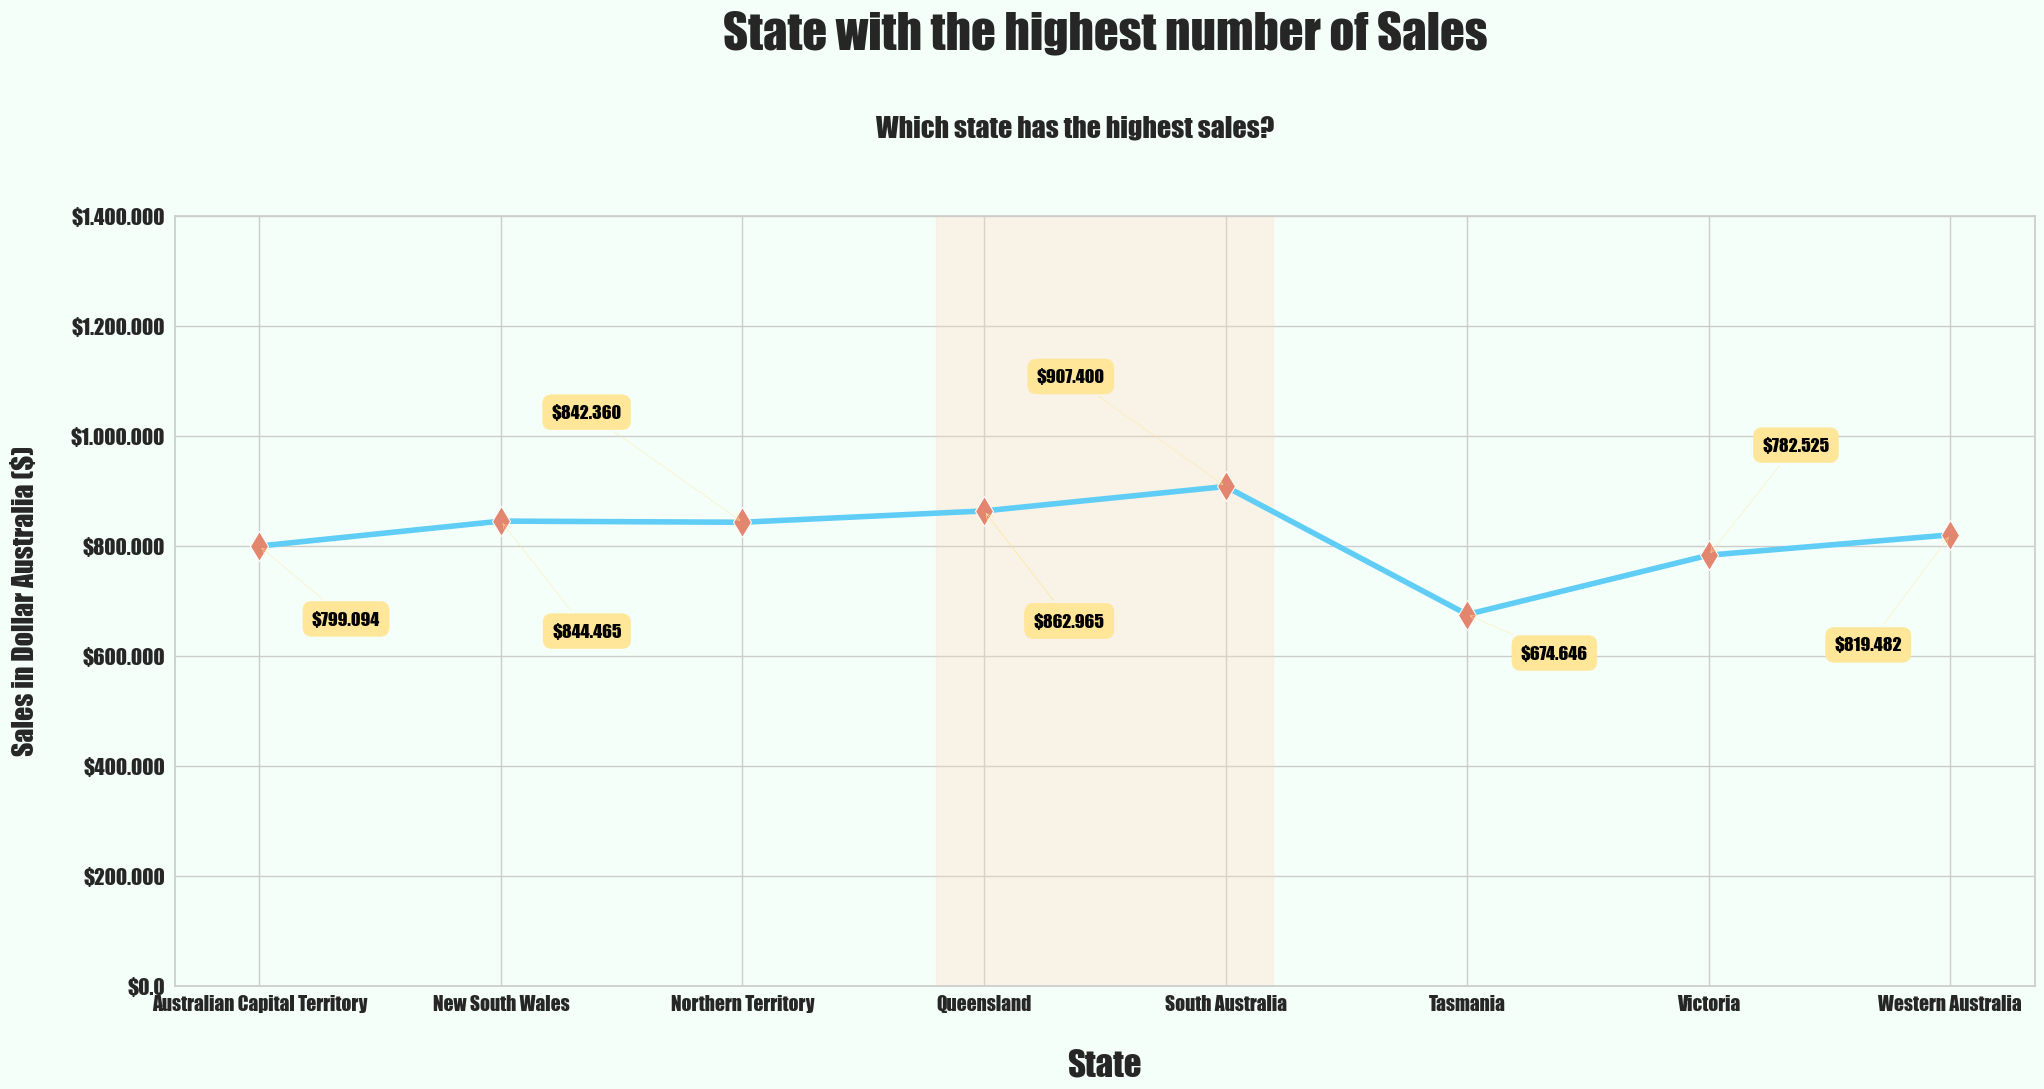

In [174]:
# set-up
color_map = ["#5FCDF5" for _ in range(8)]
color_map[4] = color_map[3] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
state = ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland',
         'South Australia', 'Tasmania', 'Victoria', 'Western Australia']
values = [799094, 844465, 842360, 862965, 907400, 674646, 782525, 819482]
state_sales = pd.DataFrame({"state": state, "values": values})
span_range = [2.8, 4.2]

# let's plot it
fig, ax = plt.subplots(
    1, 1,
    figsize=(24, 10),
    facecolor="mintcream")

# makes bar plot 
sns.lineplot(
    x=state_sales["state"],
    y=state_sales["values"],
    data=state_sales,
    marker="d",
    markersize=15,
    markerfacecolor="#E3866F",
    lw=4,
    color="#5FCDF5",
    ax=ax)

# title
ax.set_title( # title
    "State with the highest number of Sales", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=120)
plt.suptitle(
    "Which state has the highest sales?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel(
    "State", 
    family="fantasy",
    weight="bold",
    fontsize=25,
    loc="center",
    labelpad=25)
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    family="fantasy",
    weight="bold",
    fontsize=20, 
    loc="center",
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=state_sales["state"],
    weight="bold", 
    fontsize=14, 
    family="fantasy",
    rotation=0)
ax.set_yticklabels(
    labels=["$0.0",     "$200.000",
            "$400.000", "$600.000",
            "$800.000", "$1.000.000",
            "$1.200.000", "$1.400.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# annotate
ax.annotate("$799.094", xy=(0, 799094), xytext=(0.5, 666666),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$844.465", xy=(1, 844465), xytext=(1.5, 644465),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$842.360", xy=(2, 842360), xytext=(1.5, 1042360),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$907.400", xy=(4, 907400), xytext=(3.5, 1107400),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$674.646", xy=(5, 674646), xytext=(5.5, 604646),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$782.525", xy=(6, 782525), xytext=(6.5, 982525),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$819.482", xy=(7, 819482), xytext=(6.8, 619482),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(span_range[0], 
           span_range[1], 
           color="peachpuff", 
           alpha=0.3)

# facecolor
ax.set_facecolor("mintcream")

# y-limits
ax.set_ylim(0, 1400000);

<Axes: xlabel='city_list', ylabel='sales'>

Text(0.5, 1.0, 'Cities with the highest number of Sales')

Text(0.5, 0.98, 'Which city has the highest sales?')

Text(0.5, 0, 'Cities')

Text(0, 0.5, 'Sales in Dollar Australia ($)')

[Text(0, 0, 'East Aidan'),
 Text(1, 0, 'East Sophia'),
 Text(2, 0, 'West Sebastianfort'),
 Text(3, 0, 'East Max'),
 Text(4, 0, 'Port Hunter'),
 Text(5, 0, 'South Georgia')]

[Text(0, 15000.0, '$0.0'),
 Text(0, 16000.0, '$5.000'),
 Text(0, 17000.0, '$10.000'),
 Text(0, 18000.0, '$15.000'),
 Text(0, 19000.0, '$20.000'),
 Text(0, 20000.0, '$25.000'),
 Text(0, 21000.0, '$30.000')]

Text(0, 22000, ' $20.247 ')

Text(1, 21000, ' $19.628 ')

Text(2, 20000, ' $18.240 ')

Text(3, 19500, ' $18.127 ')

Text(4, 17500, ' $16.128 ')

Text(5, 17000, ' $15.945 ')

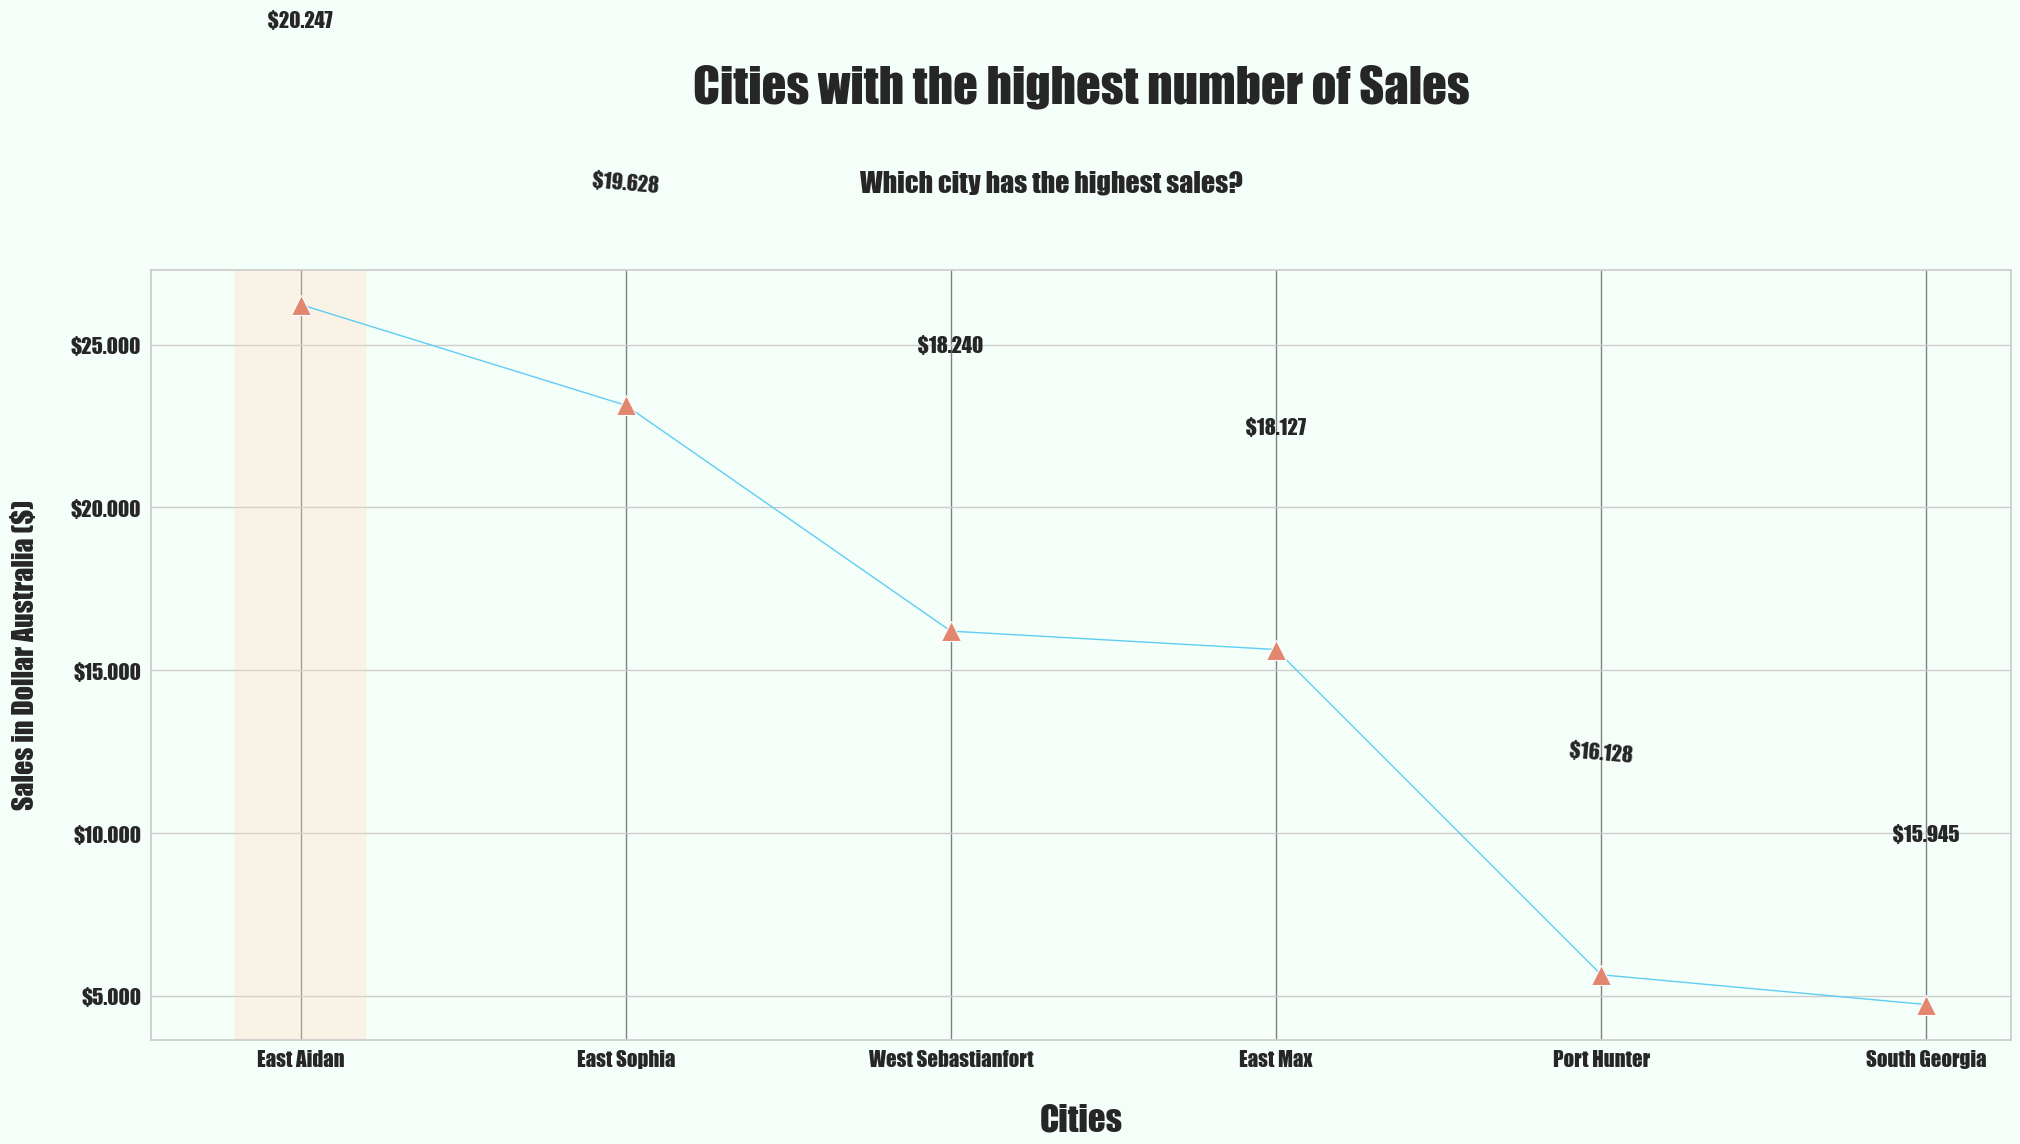

In [175]:
# set-up
color_map = ["#5FCDF5" for _ in range(6)]
color_map[0] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
city_list = ['East Aidan', 'East Sophia', 'West Sebastianfort', 
             'East Max', 'Port Hunter', 'South Georgia']
sales = [20247, 19628, 18240, 18127, 16128, 15945]
top_6_city = pd.DataFrame({"city_list": city_list, "sales": sales})
span_range = [-0.2, 0.2]

# let's plot it
fig, ax = plt.subplots(
    1, 1,
    figsize=(24, 10),
    facecolor="mintcream")

# line-plot 
sns.lineplot(
    x=top_6_city["city_list"],
    y=top_6_city["sales"],
    data=state_sales,
    marker="^",
    markersize=15,
    markerfacecolor="#E3866F",
    lw=1,
    color="#5FCDF5",
    ax=ax)

# title
ax.set_title(
    "Cities with the highest number of Sales", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=120)
plt.suptitle(
    "Which city has the highest sales?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel(
    "Cities", 
    weight="bold",
    family="fantasy",
    fontsize=25,
    loc="center",
    labelpad=25)
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    weight="bold",
    family="fantasy",
    fontsize=20, 
    loc="center",
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=top_6_city["city_list"],
    weight="bold", 
    fontsize=15, 
    family="fantasy",
    rotation=0)
ax.set_yticklabels(
    labels=["$0.0",     "$5.000",
            "$10.000", "$15.000",
            "$20.000", "$25.000",
            "$30.000", "$35.000",
            "$40.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# texts
ax.text(0, 22000, " $20.247 ", va="center", ha="center",
         fontsize=15, family="fantasy", weight="semibold")

ax.text(1, 21000, " $19.628 ", va="center", ha="center", rotation=-5,
         fontsize=15, family="fantasy", weight="semibold")

ax.text(2, 20000, " $18.240 ", va="center", ha="center",
         fontsize=15, family="fantasy", weight="semibold")

ax.text(3, 19500, " $18.127 ", va="center", ha="center",
         fontsize=15, family="fantasy", weight="semibold")

ax.text(4, 17500, " $16.128 ", va="center", ha="center", rotation=-5,
         fontsize=15, family="fantasy", weight="semibold")

ax.text(5, 17000, " $15.945 ", va="center", ha="center",
         fontsize=15, family="fantasy", weight="semibold")

# axv-span
ax.axvspan(span_range[0], 
           span_range[1], 
           color="peachpuff", 
           alpha=0.3)

# grid
ax.grid(which="major", 
        axis="x", 
        color="gray")

# facecolor
ax.set_facecolor("mintcream")

# y-limits

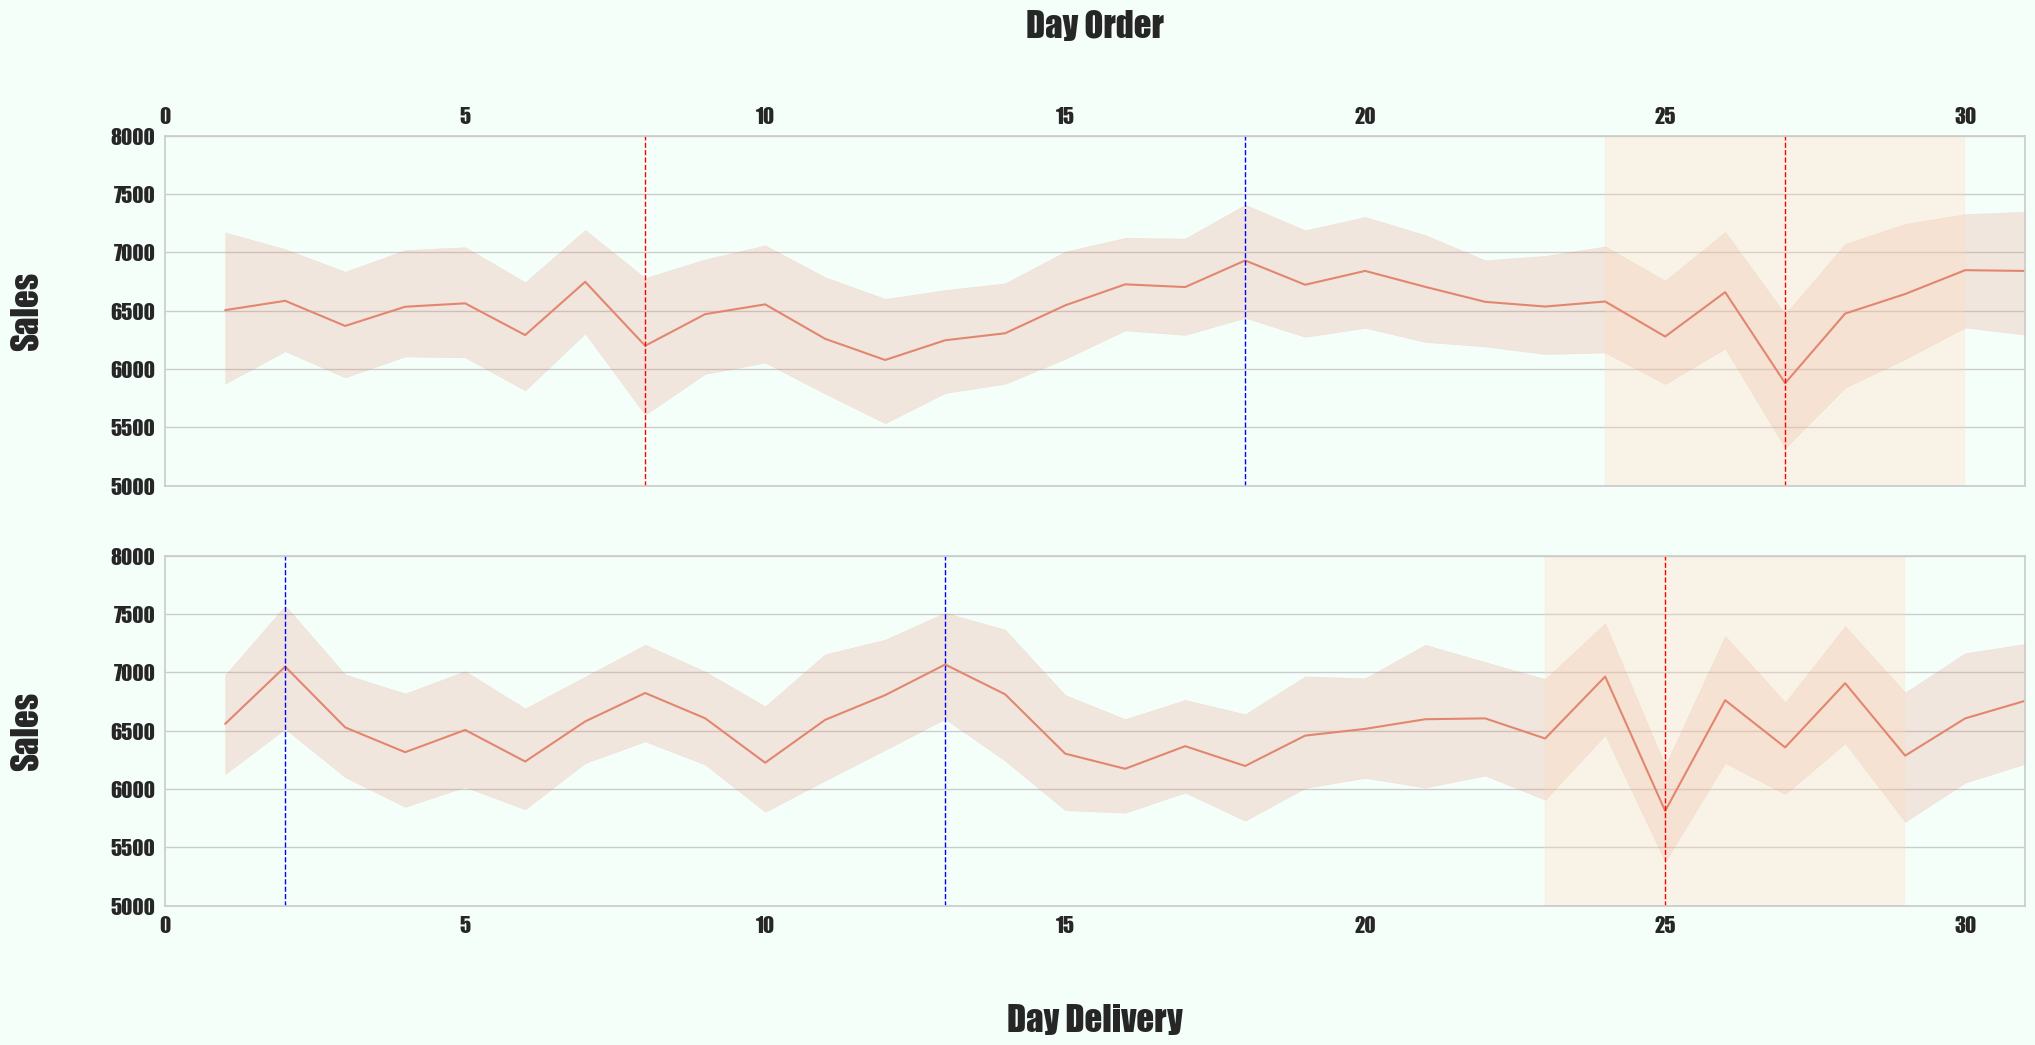

In [176]:
# set-up
span_range = [[24, 30], [23, 29]]

# let's plot it
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1,
    figsize=(24, 10),
    facecolor="mintcream")

sns.lineplot(
    x="day_order", 
    y="sales", 
    data=cop, 
    lw=1.5,
    color="#E3866F",
    ax=ax1)

sns.lineplot(
    x="day_delivery", 
    y="sales", 
    data=cop,
    lw=1.5,
    color="#E3866F",
    ax=ax2)

# labels
ax1.set_xlabel("Day Order", 
               weight="bold", 
               family="fantasy", 
               fontsize=25, 
               labelpad=50)
ax1.set_ylabel("Sales", 
               weight="bold", 
               family="fantasy", 
               fontsize=25, 
               labelpad=50)
ax2.set_xlabel("Day Delivery", 
               weight="bold", 
               family="fantasy", 
               fontsize=25, 
               labelpad=50)
ax2.set_ylabel("Sales", 
               weight="bold", 
               family="fantasy", 
               fontsize=25, 
               labelpad=50)

# axis
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position("top")

# ticklabels
ax1.set_xticklabels(labels=list(np.arange(0, 35, 5)),
                    weight="bold",
                    family="fantasy",
                    fontsize=15)
ax2.set_xticklabels(labels=list(np.arange(0, 35, 5)),
                    weight="bold",
                    family="fantasy",
                    fontsize=15)
ax1.set_yticklabels(labels=list(np.arange(5000, 8500, 500)),
                    weight="bold",
                    family="fantasy",
                    fontsize=15)
ax2.set_yticklabels(labels=list(np.arange(5000, 8500, 500)),
                    weight="bold",
                    family="fantasy",
                    fontsize=15)

# limits
ax1.set_xlim(0, 31)
ax2.set_xlim(0, 31)
ax1.set_ylim(5000, 8000)
ax2.set_ylim(5000, 8000)

# axv-line
ax1.axvline(x=8, color="red", ls="--", lw=1)
ax1.axvline(x=27, color="red", ls="--", lw=1)
ax1.axvline(x=18, color="blue", ls="--", lw=1)
ax2.axvline(x=25, color="red", ls="--", lw=1)
ax2.axvline(x=2, color="blue", ls="--", lw=1)
ax2.axvline(x=13, color="blue", ls="--", lw=1)

# axv-span
ax1.axvspan(span_range[0][0], 
            span_range[0][1], 
            color="peachpuff", 
            alpha=0.3)
ax2.axvspan(span_range[1][0], 
            span_range[1][1], 
            color="peachpuff", 
            alpha=0.3)

# grids
ax1.grid(which="major", axis="x")
ax2.grid(which="major", axis="x")

# face-color
ax1.set_facecolor("mintcream")
ax2.set_facecolor("mintcream");